In [ ]:
!pip install utils

# Imports

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import Image, display
from torch.utils.data.sampler import SubsetRandomSampler

In [4]:
CUDA_LAUNCH_BLOCKING=1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
training_batch_size = 128

# Data Loading

In [ ]:
# Load Training Data
dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
num_train = len(dataset)
indices = list(range(num_train))
train_idx = indices[:10000]
train_sampler = SubsetRandomSampler(train_idx)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=training_batch_size, sampler=train_sampler)

In [6]:
#test loader
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
num_test = len(test_dataset)
indices = list(range(num_test))
test_idx = indices[:200]
test_sampler = SubsetRandomSampler(test_idx)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, sampler=test_sampler)

# Utilities

In [3]:
# Flatten 2D image tensor to 1D array before feeding to neural network
def convert2DTensorto1DTensor(img):
    x = img.view(img.size(0), -1)
    if torch.cuda.is_available():
      x = Variable(x.cuda())
    return x

# Regularization parameter
alpha = -0.2

# Loss function - Combination of reconstruction error(BCELoss) and the KL diverzence for the distribution of latent variable at 
# end of encoder
def loss_fn(x_bar, x, mu, logvar):
    BCE = F.binary_cross_entropy(x_bar, x, size_average=False)
    KLD = alpha * torch.sum(1 + logvar - mu**2 -  logvar.exp())
    return (BCE + KLD)

# Network Implementation

In [7]:
# Network implementation of VAE with 3 encoder layers & 3 decoder layers
class VAE(nn.Module):
    def __init__(self, image_size=784, latent_dim=40):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(image_size, 400),
            nn.LeakyReLU(0.2),
            nn.Linear(400, 200),
            nn.LeakyReLU(0.2),
            nn.Linear(200, latent_dim*2)
        ) 
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 200),
            nn.ReLU(),
            nn.Linear(200, 400),
            nn.ReLU(),
            nn.Linear(400, image_size),
            nn.Sigmoid()
        )
    # Reparameterize for backpropagation and resample from the reparametrized distribution
    def reparameterize(self, mean, log_variance):
        std = log_variance.mul(0.5).exp_()
        random = torch.randn(*mean.size())
        if torch.cuda.is_available():
          random = random.cuda()
        esp = Variable(random)
        z = mean + std * esp
        return z
    # Implemtation of forward
    def forward(self, x):
        code = self.encoder(x)
        mean, log_variance = torch.chunk(code, 2, dim=1)
        sample = self.reparameterize(mean, log_variance)
        return self.decoder(sample), mean, log_variance

In [8]:
model= VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


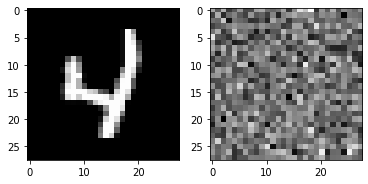

Epoch 1 Loss: 235.22


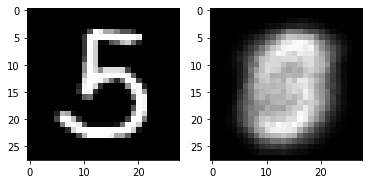

Epoch 2 Loss: 186.31


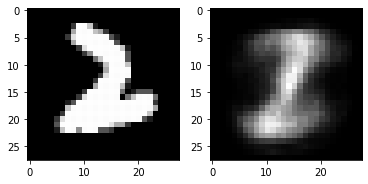

Epoch 3 Loss: 162.74


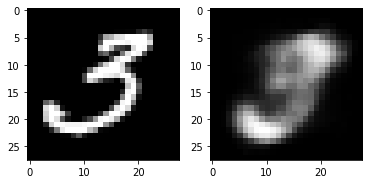

Epoch 4 Loss: 144.62


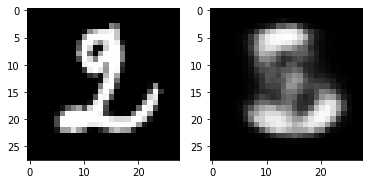

Epoch 5 Loss: 135.13


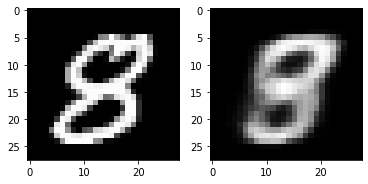

Epoch 6 Loss: 127.37


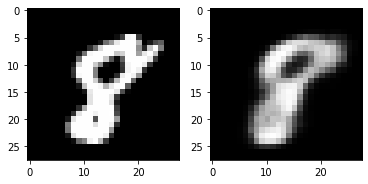

Epoch 7 Loss: 121.29


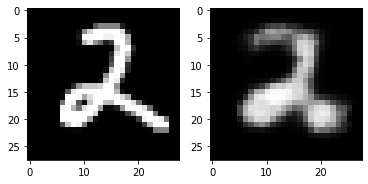

Epoch 8 Loss: 116.39


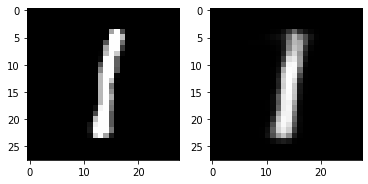

Epoch 9 Loss: 112.31


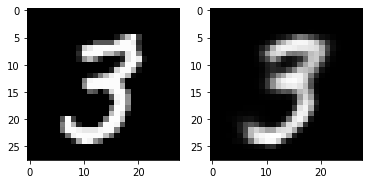

Epoch 10 Loss: 109.00


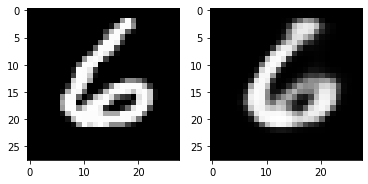

Epoch 11 Loss: 106.35


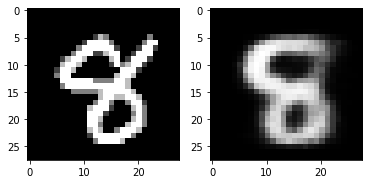

Epoch 12 Loss: 104.15


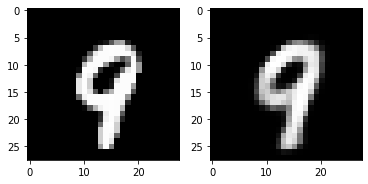

Epoch 13 Loss: 102.11


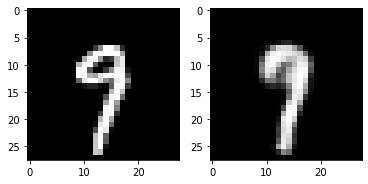

Epoch 14 Loss: 100.44


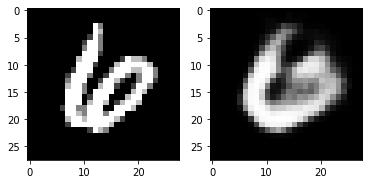

Epoch 15 Loss: 98.89


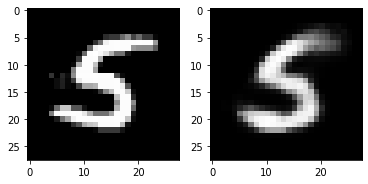

Epoch 16 Loss: 97.40


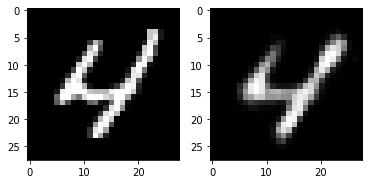

Epoch 17 Loss: 96.26


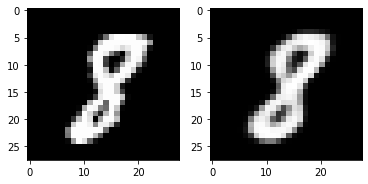

Epoch 18 Loss: 95.15


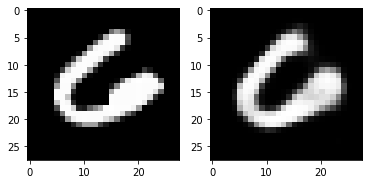

Epoch 19 Loss: 94.17


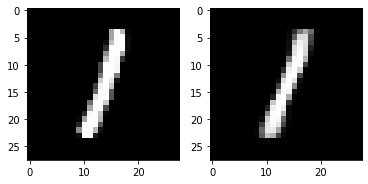

Epoch 20 Loss: 93.16


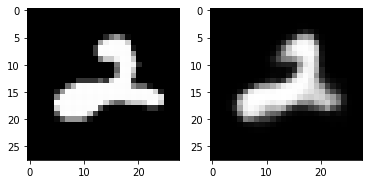

Epoch 21 Loss: 92.39


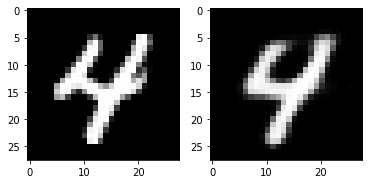

Epoch 22 Loss: 91.63


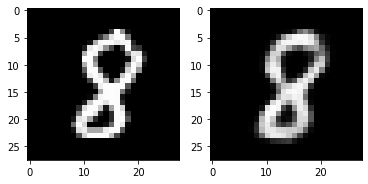

Epoch 23 Loss: 91.02


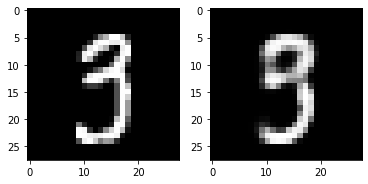

Epoch 24 Loss: 90.45


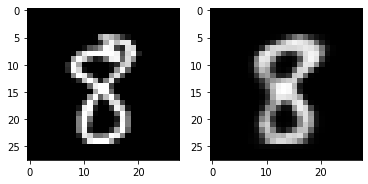

Epoch 25 Loss: 89.84


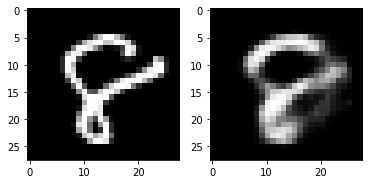

Epoch 26 Loss: 89.36


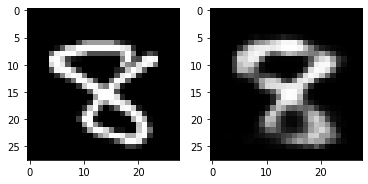

Epoch 27 Loss: 88.95


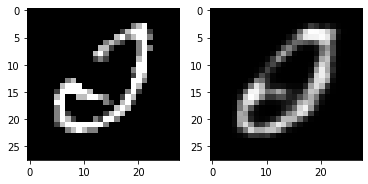

Epoch 28 Loss: 88.44


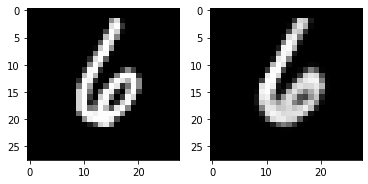

Epoch 29 Loss: 87.86


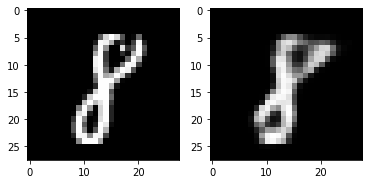

Epoch 30 Loss: 87.50


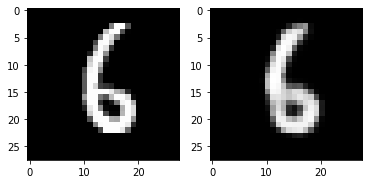

Epoch 31 Loss: 87.26


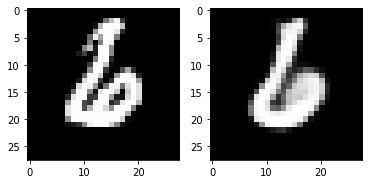

Epoch 32 Loss: 86.82


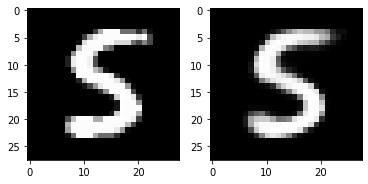

Epoch 33 Loss: 86.45


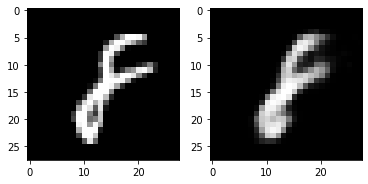

Epoch 34 Loss: 86.18


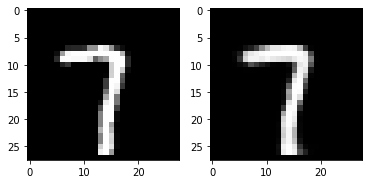

Epoch 35 Loss: 85.90


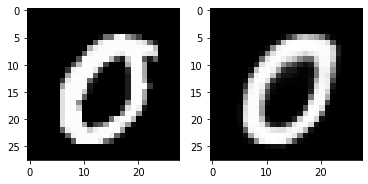

Epoch 36 Loss: 85.61


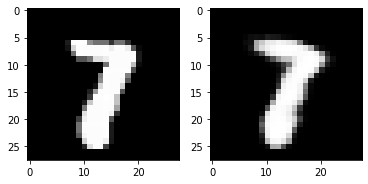

Epoch 37 Loss: 85.32


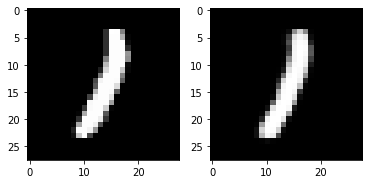

Epoch 38 Loss: 85.10


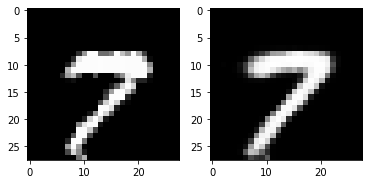

Epoch 39 Loss: 84.87


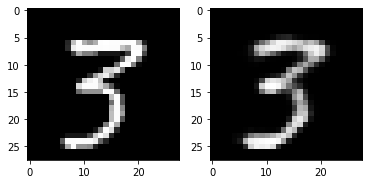

Epoch 40 Loss: 84.68


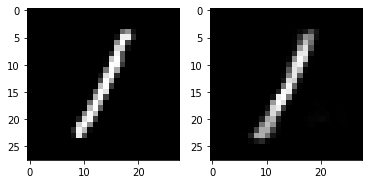

Epoch 41 Loss: 84.44


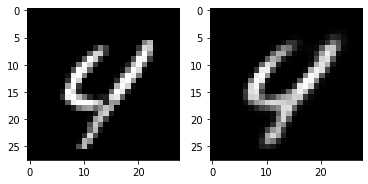

Epoch 42 Loss: 84.35


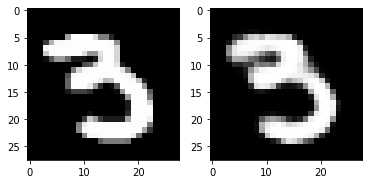

Epoch 43 Loss: 84.02


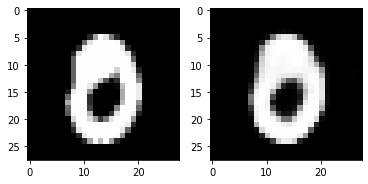

Epoch 44 Loss: 83.87


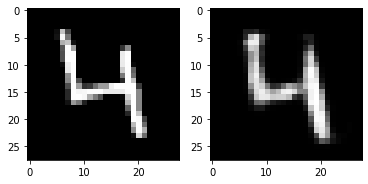

Epoch 45 Loss: 83.79


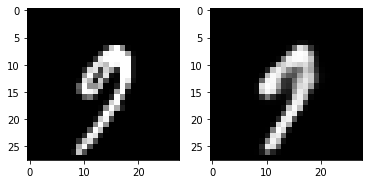

Epoch 46 Loss: 83.57


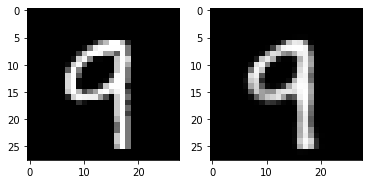

Epoch 47 Loss: 83.37


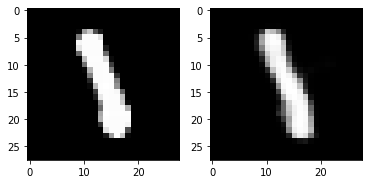

Epoch 48 Loss: 83.25


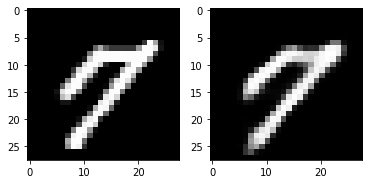

Epoch 49 Loss: 83.06


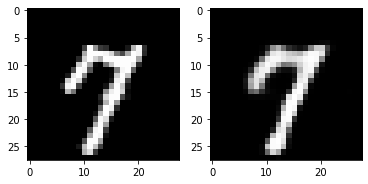

Epoch 50 Loss: 82.93


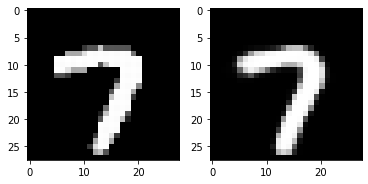

Epoch 51 Loss: 82.78


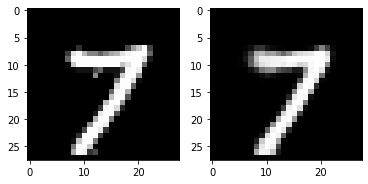

Epoch 52 Loss: 82.73


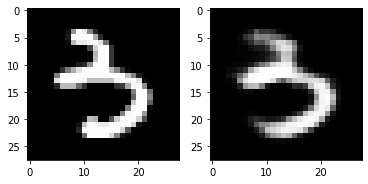

Epoch 53 Loss: 82.47


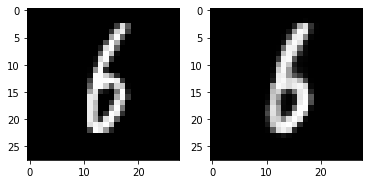

Epoch 54 Loss: 82.38


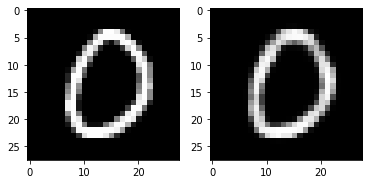

Epoch 55 Loss: 82.34


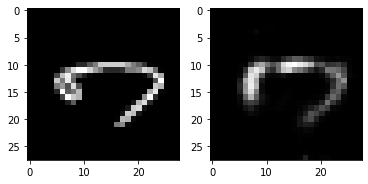

Epoch 56 Loss: 82.22


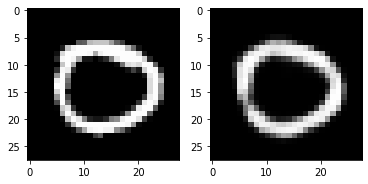

Epoch 57 Loss: 82.08


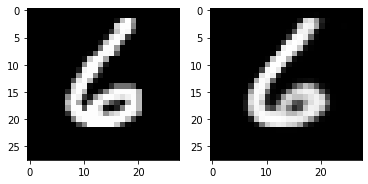

Epoch 58 Loss: 81.88


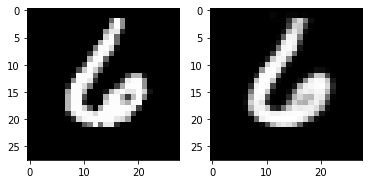

Epoch 59 Loss: 81.75


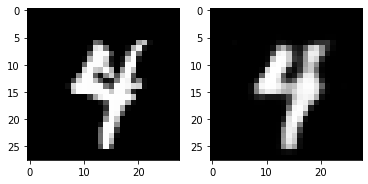

Epoch 60 Loss: 81.69


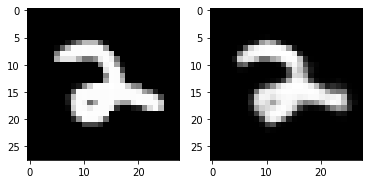

Epoch 61 Loss: 81.58


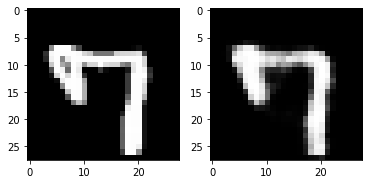

Epoch 62 Loss: 81.56


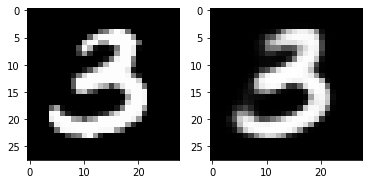

Epoch 63 Loss: 81.43


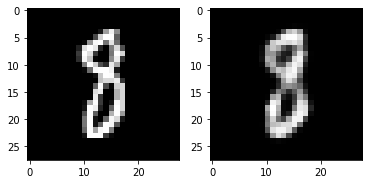

Epoch 64 Loss: 81.36


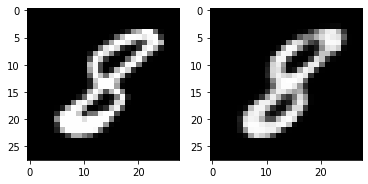

Epoch 65 Loss: 81.26


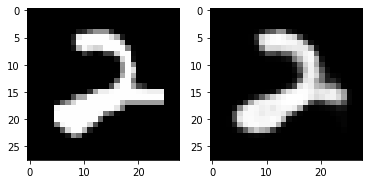

Epoch 66 Loss: 81.14


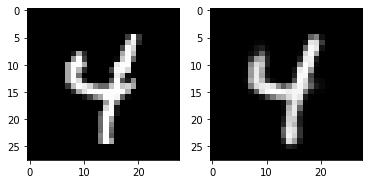

Epoch 67 Loss: 81.05


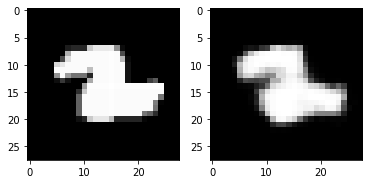

Epoch 68 Loss: 80.95


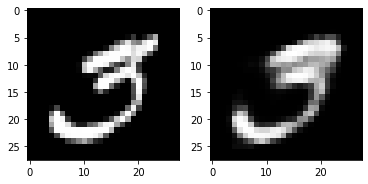

Epoch 69 Loss: 80.90


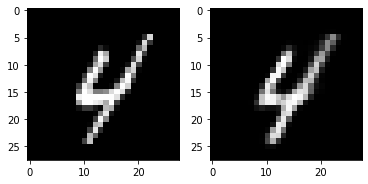

Epoch 70 Loss: 80.67


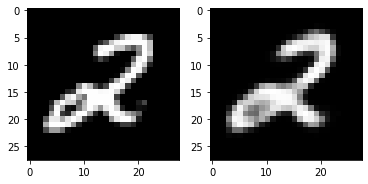

Epoch 71 Loss: 80.79


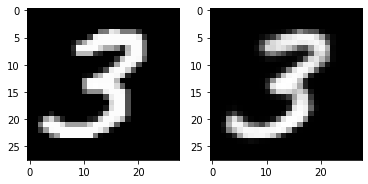

Epoch 72 Loss: 80.64


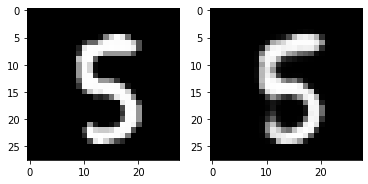

Epoch 73 Loss: 80.58


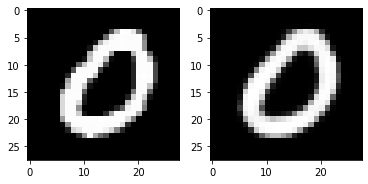

Epoch 74 Loss: 80.47


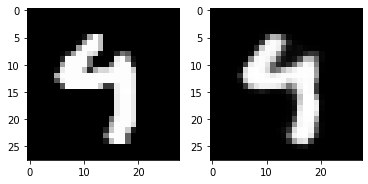

Epoch 75 Loss: 80.33


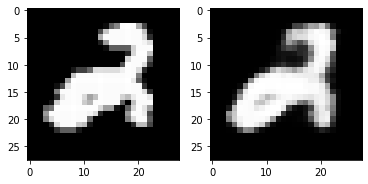

Epoch 76 Loss: 80.30


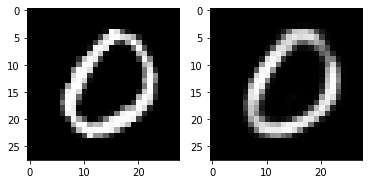

Epoch 77 Loss: 80.24


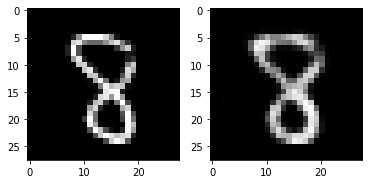

Epoch 78 Loss: 80.21


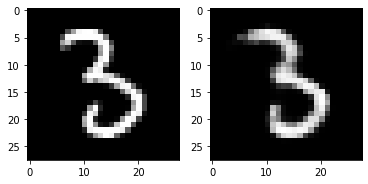

Epoch 79 Loss: 80.12


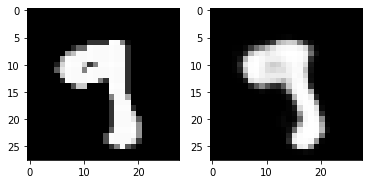

Epoch 80 Loss: 80.07


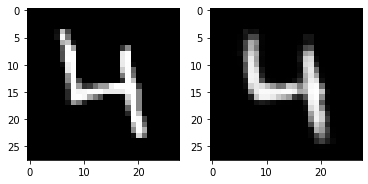

Epoch 81 Loss: 80.08


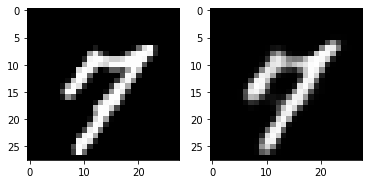

Epoch 82 Loss: 79.98


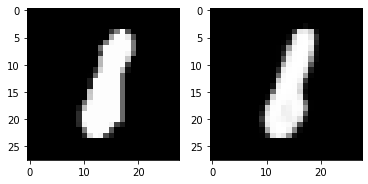

Epoch 83 Loss: 79.92


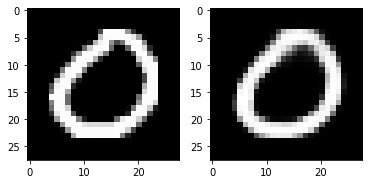

Epoch 84 Loss: 79.87


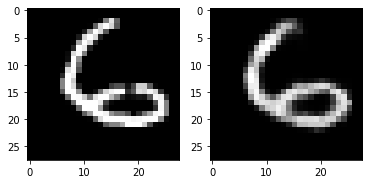

Epoch 85 Loss: 79.73


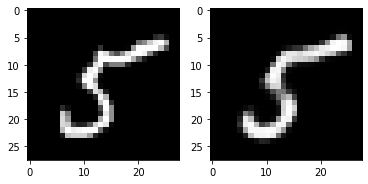

Epoch 86 Loss: 79.72


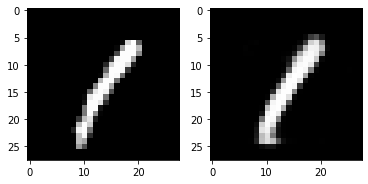

Epoch 87 Loss: 79.55


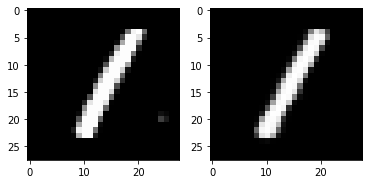

Epoch 88 Loss: 79.53


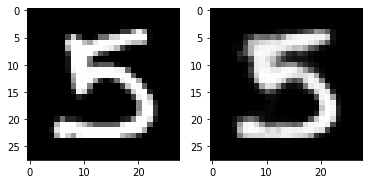

Epoch 89 Loss: 79.47


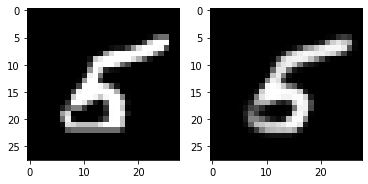

Epoch 90 Loss: 79.42


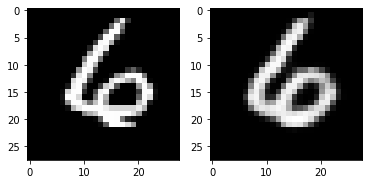

Epoch 91 Loss: 79.42


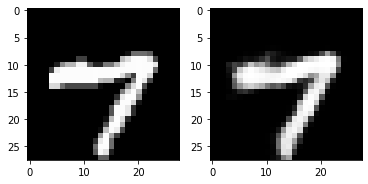

Epoch 92 Loss: 79.34


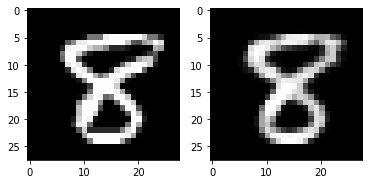

Epoch 93 Loss: 79.23


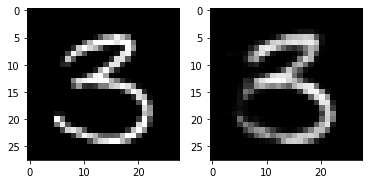

Epoch 94 Loss: 79.22


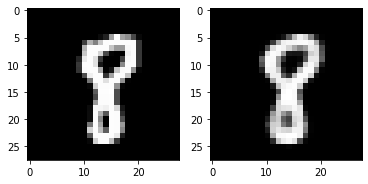

Epoch 95 Loss: 79.28


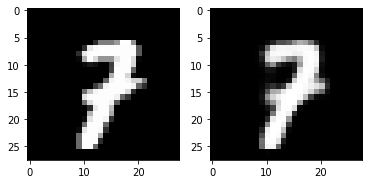

Epoch 96 Loss: 79.04


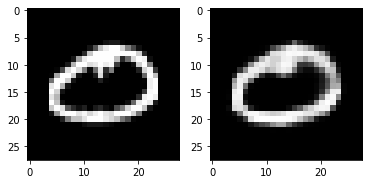

Epoch 97 Loss: 79.12


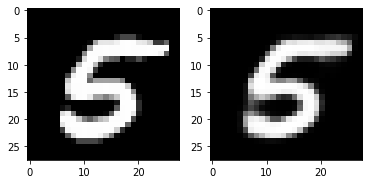

Epoch 98 Loss: 78.98


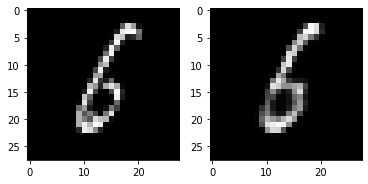

Epoch 99 Loss: 79.09


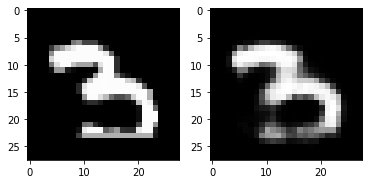

Epoch 100 Loss: 78.95


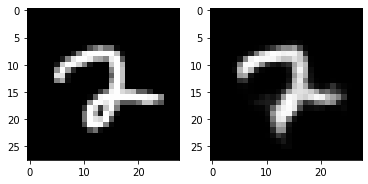

Epoch 101 Loss: 78.92


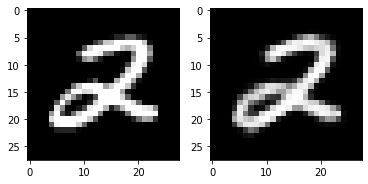

Epoch 102 Loss: 78.78


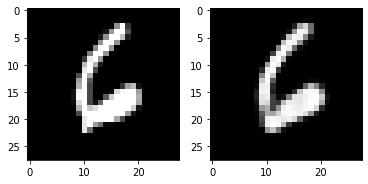

Epoch 103 Loss: 78.76


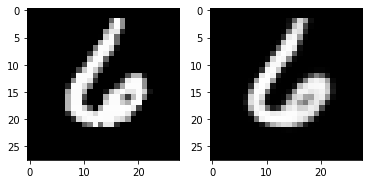

Epoch 104 Loss: 78.81


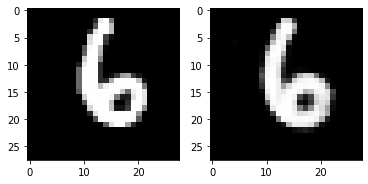

Epoch 105 Loss: 78.72


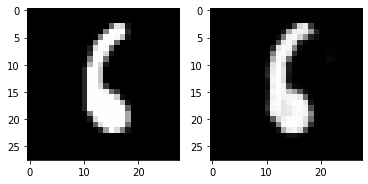

Epoch 106 Loss: 78.68


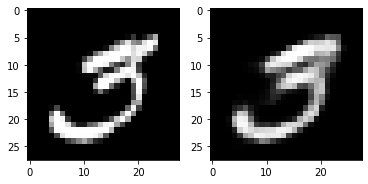

Epoch 107 Loss: 78.63


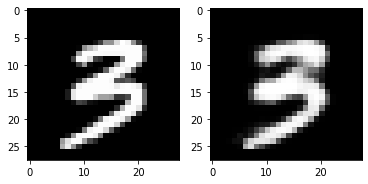

Epoch 108 Loss: 78.59


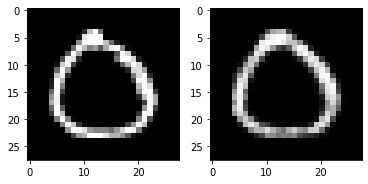

Epoch 109 Loss: 78.53


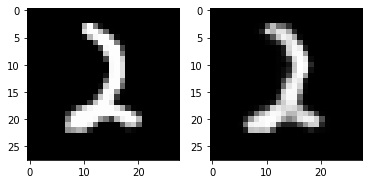

Epoch 110 Loss: 78.55


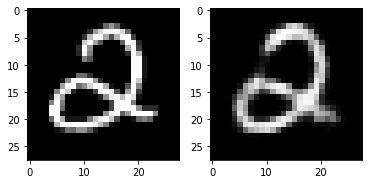

Epoch 111 Loss: 78.52


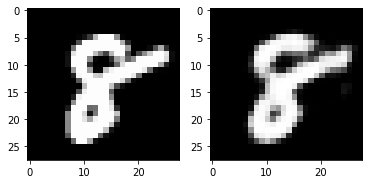

Epoch 112 Loss: 78.52


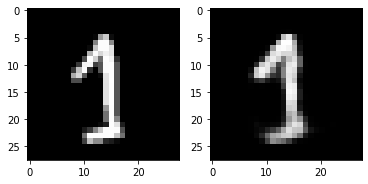

Epoch 113 Loss: 78.45


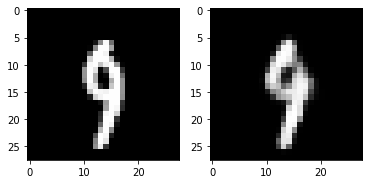

Epoch 114 Loss: 78.36


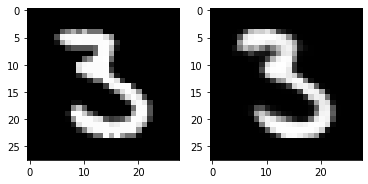

Epoch 115 Loss: 78.26


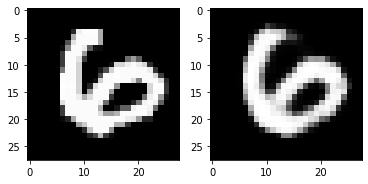

Epoch 116 Loss: 78.33


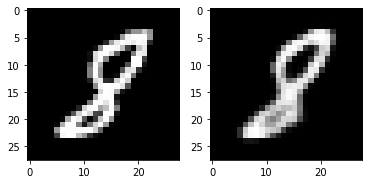

Epoch 117 Loss: 78.14


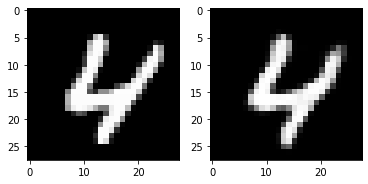

Epoch 118 Loss: 78.18


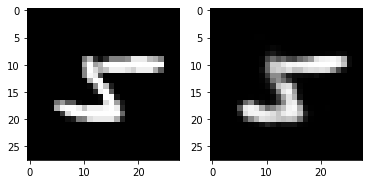

Epoch 119 Loss: 78.27


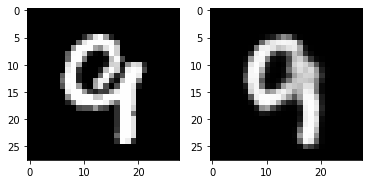

Epoch 120 Loss: 78.18


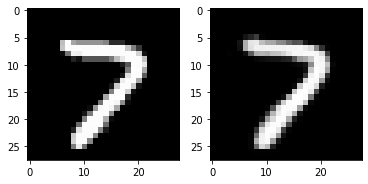

Epoch 121 Loss: 78.20


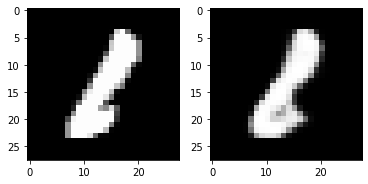

Epoch 122 Loss: 78.10


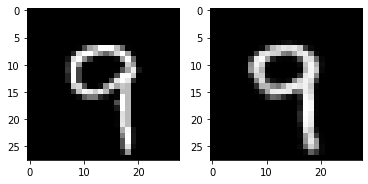

Epoch 123 Loss: 78.00


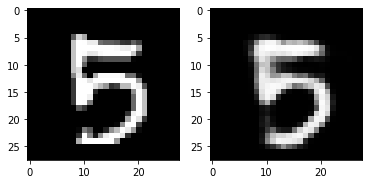

Epoch 124 Loss: 78.01


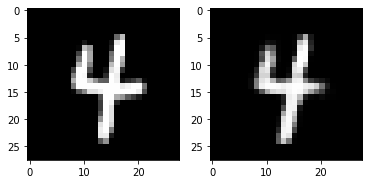

Epoch 125 Loss: 77.93


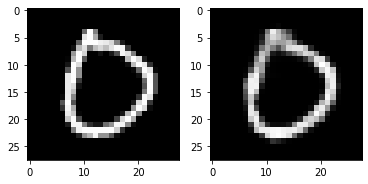

Epoch 126 Loss: 78.05


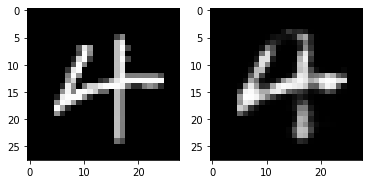

Epoch 127 Loss: 77.92


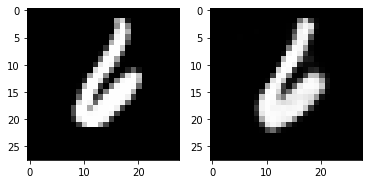

Epoch 128 Loss: 77.89


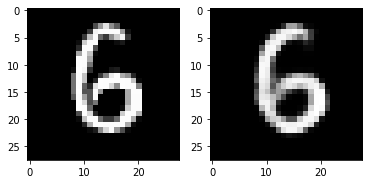

Epoch 129 Loss: 77.86


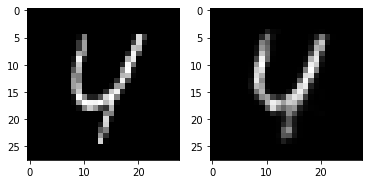

Epoch 130 Loss: 77.82


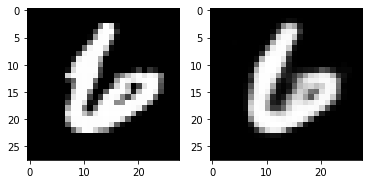

Epoch 131 Loss: 77.83


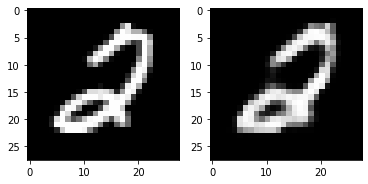

Epoch 132 Loss: 77.71


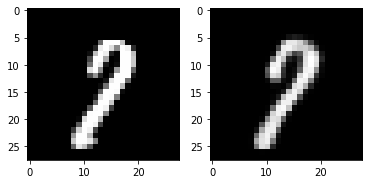

Epoch 133 Loss: 77.68


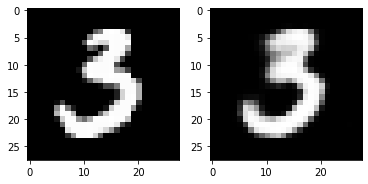

Epoch 134 Loss: 77.74


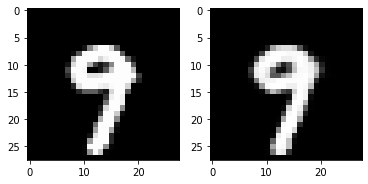

Epoch 135 Loss: 77.69


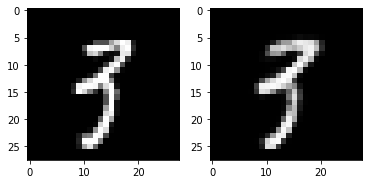

Epoch 136 Loss: 77.59


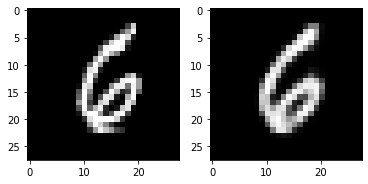

Epoch 137 Loss: 77.66


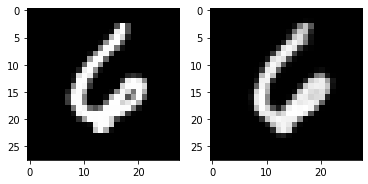

Epoch 138 Loss: 77.57


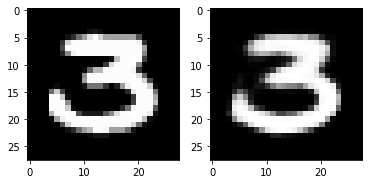

Epoch 139 Loss: 77.51


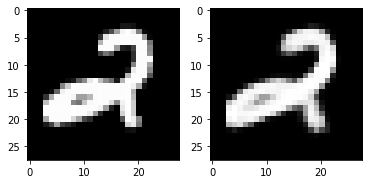

Epoch 140 Loss: 77.54


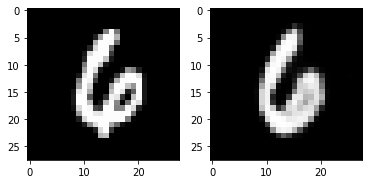

Epoch 141 Loss: 77.54


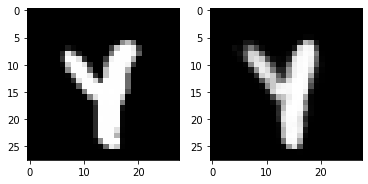

Epoch 142 Loss: 77.45


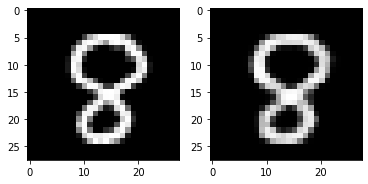

Epoch 143 Loss: 77.46


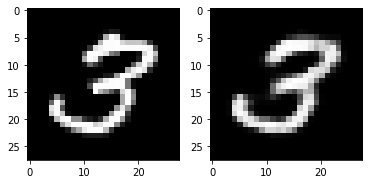

Epoch 144 Loss: 77.47


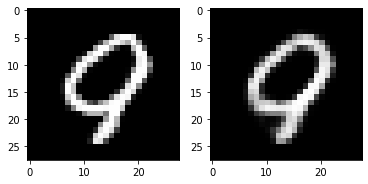

Epoch 145 Loss: 77.38


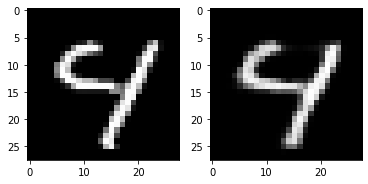

Epoch 146 Loss: 77.35


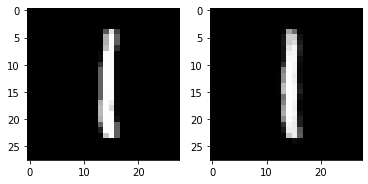

Epoch 147 Loss: 77.28


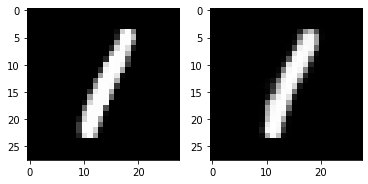

Epoch 148 Loss: 77.38


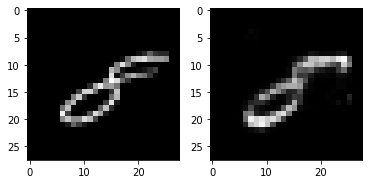

Epoch 149 Loss: 77.37


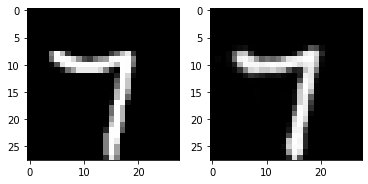

Epoch 150 Loss: 77.31


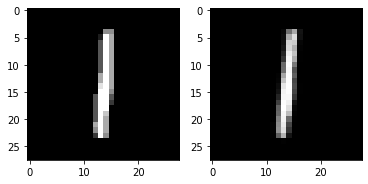

Epoch 151 Loss: 77.29


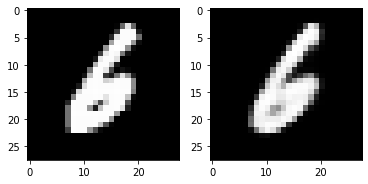

Epoch 152 Loss: 77.20


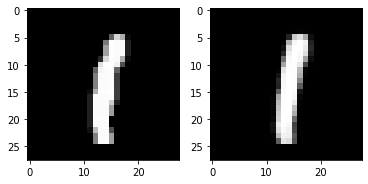

Epoch 153 Loss: 77.20


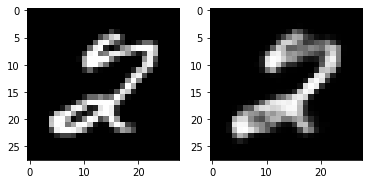

Epoch 154 Loss: 77.18


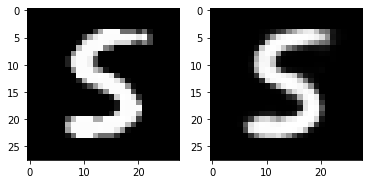

Epoch 155 Loss: 77.18


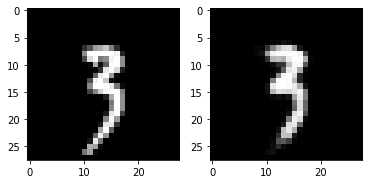

Epoch 156 Loss: 77.17


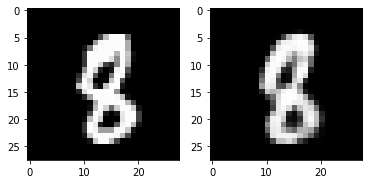

Epoch 157 Loss: 77.14


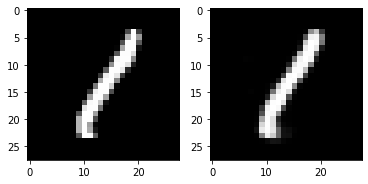

Epoch 158 Loss: 77.04


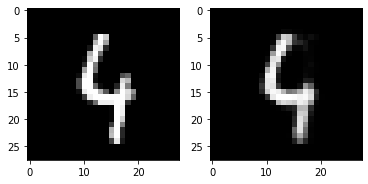

Epoch 159 Loss: 77.07


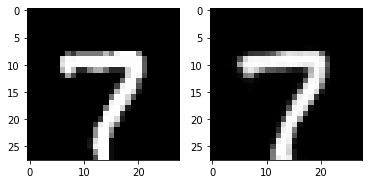

Epoch 160 Loss: 77.00


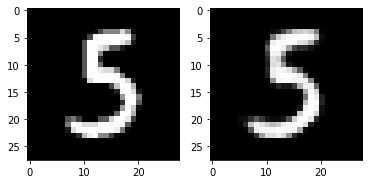

Epoch 161 Loss: 77.05


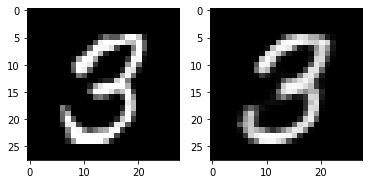

Epoch 162 Loss: 76.96


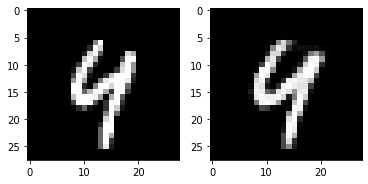

Epoch 163 Loss: 76.97


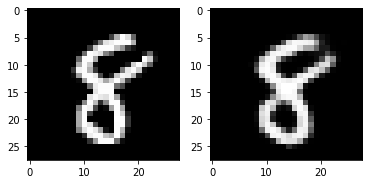

Epoch 164 Loss: 76.96


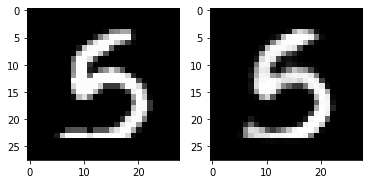

Epoch 165 Loss: 76.97


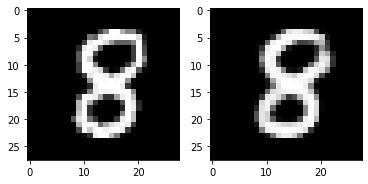

Epoch 166 Loss: 76.86


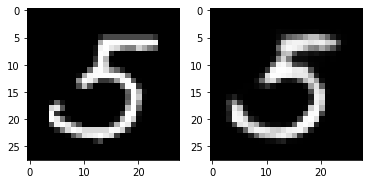

Epoch 167 Loss: 76.87


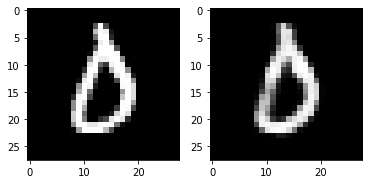

Epoch 168 Loss: 76.94


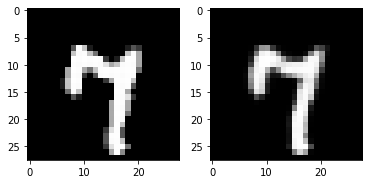

Epoch 169 Loss: 76.86


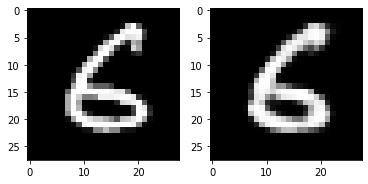

Epoch 170 Loss: 76.80


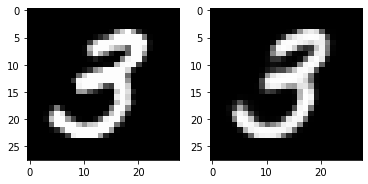

Epoch 171 Loss: 76.81


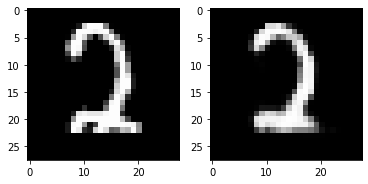

Epoch 172 Loss: 76.80


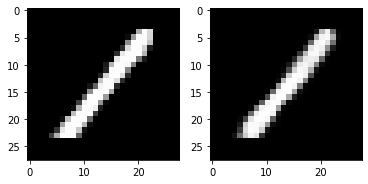

Epoch 173 Loss: 76.84


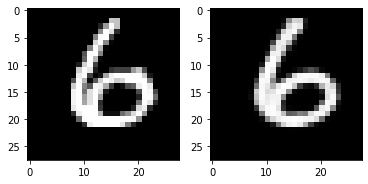

Epoch 174 Loss: 76.82


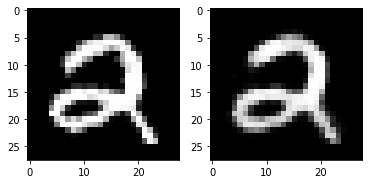

Epoch 175 Loss: 76.65


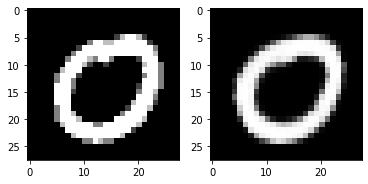

Epoch 176 Loss: 76.67


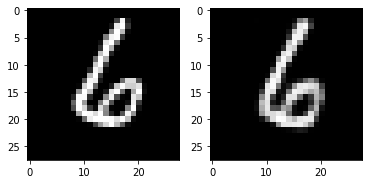

Epoch 177 Loss: 76.63


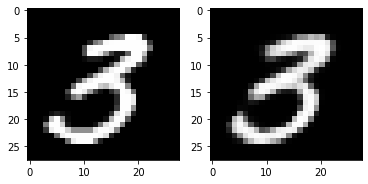

Epoch 178 Loss: 76.66


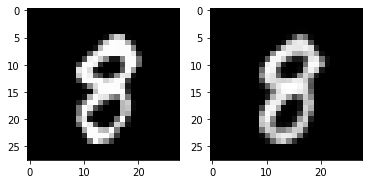

Epoch 179 Loss: 76.60


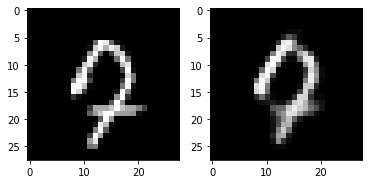

Epoch 180 Loss: 76.68


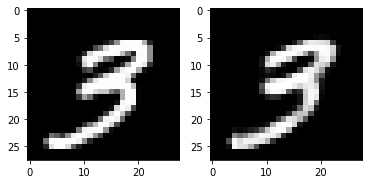

Epoch 181 Loss: 76.74


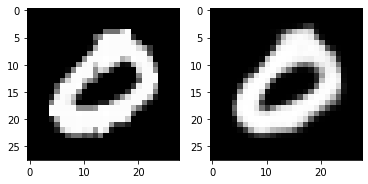

Epoch 182 Loss: 76.68


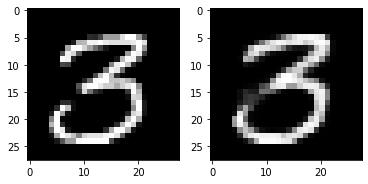

Epoch 183 Loss: 76.69


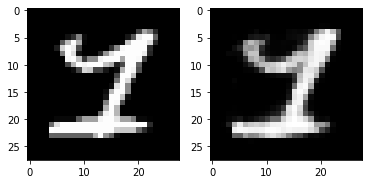

Epoch 184 Loss: 76.63


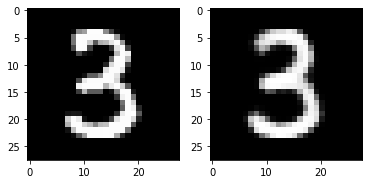

Epoch 185 Loss: 76.55


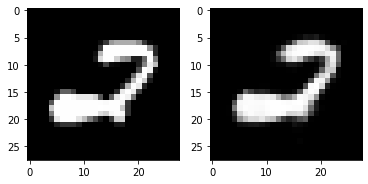

Epoch 186 Loss: 76.45


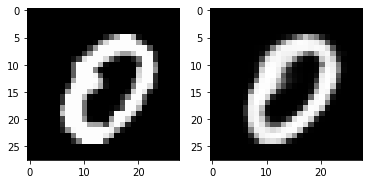

Epoch 187 Loss: 76.57


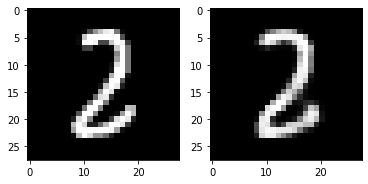

Epoch 188 Loss: 76.51


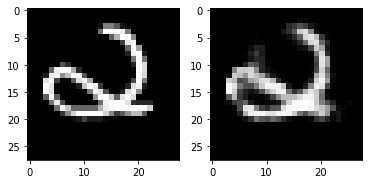

Epoch 189 Loss: 76.50


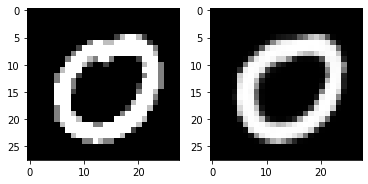

Epoch 190 Loss: 76.47


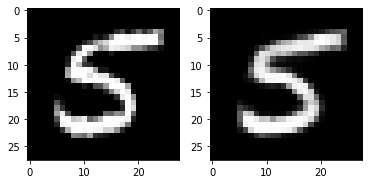

Epoch 191 Loss: 76.50


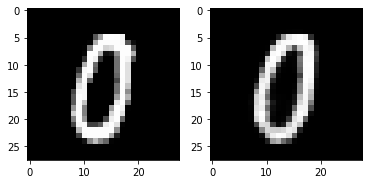

Epoch 192 Loss: 76.42


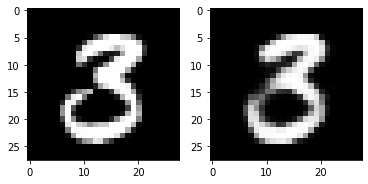

Epoch 193 Loss: 76.50


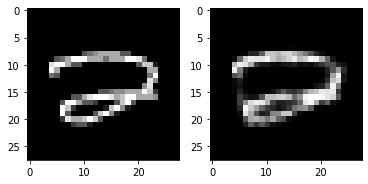

Epoch 194 Loss: 76.45


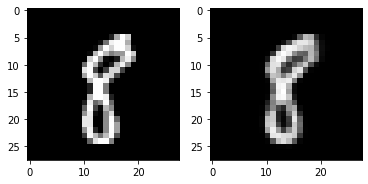

Epoch 195 Loss: 76.37


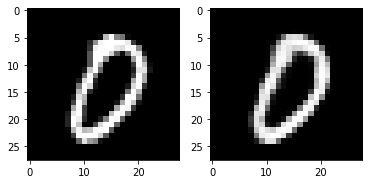

Epoch 196 Loss: 76.39


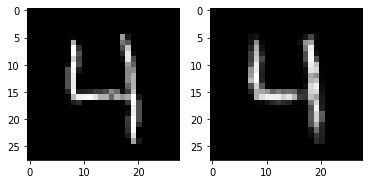

Epoch 197 Loss: 76.32


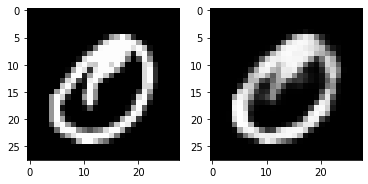

Epoch 198 Loss: 76.35


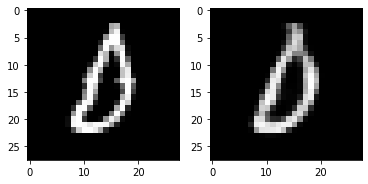

Epoch 199 Loss: 76.35


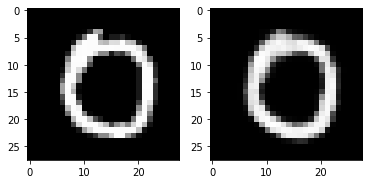

Epoch 200 Loss: 76.45


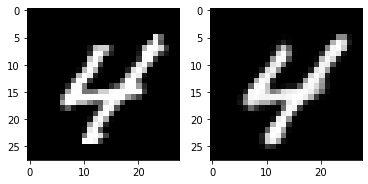

Epoch 201 Loss: 76.28


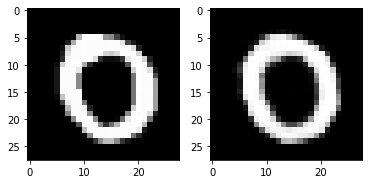

Epoch 202 Loss: 76.26


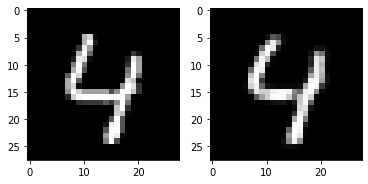

Epoch 203 Loss: 76.32


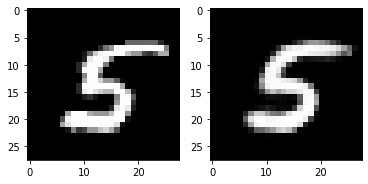

Epoch 204 Loss: 76.21


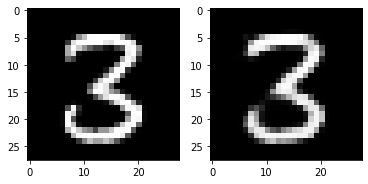

Epoch 205 Loss: 76.40


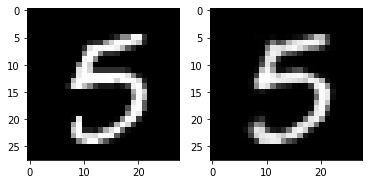

Epoch 206 Loss: 76.15


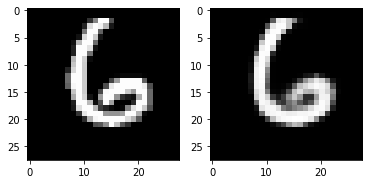

Epoch 207 Loss: 76.14


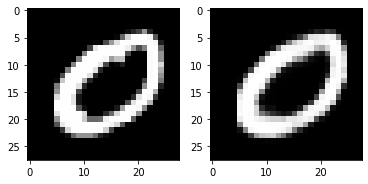

Epoch 208 Loss: 76.22


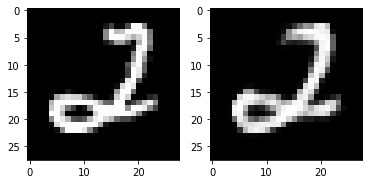

Epoch 209 Loss: 76.25


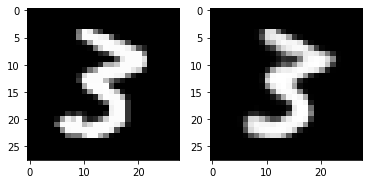

Epoch 210 Loss: 76.27


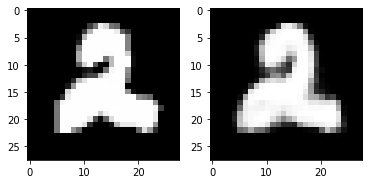

Epoch 211 Loss: 76.24


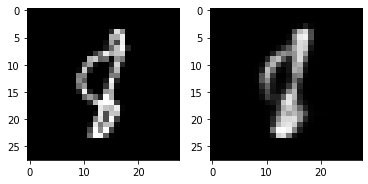

Epoch 212 Loss: 76.13


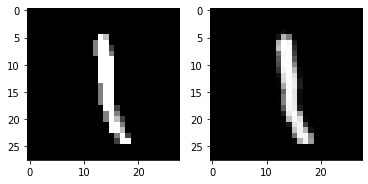

Epoch 213 Loss: 76.08


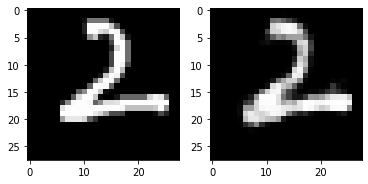

Epoch 214 Loss: 76.09


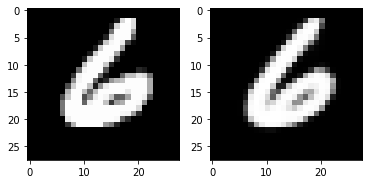

Epoch 215 Loss: 76.14


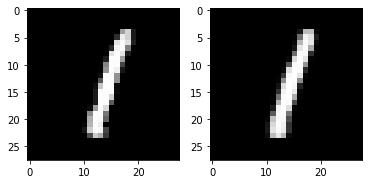

Epoch 216 Loss: 76.04


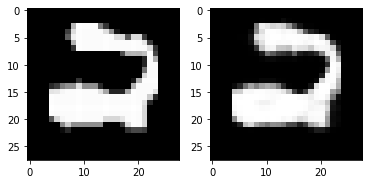

Epoch 217 Loss: 76.03


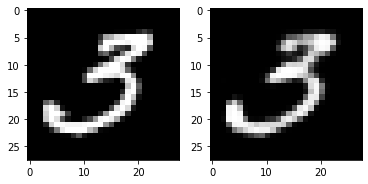

Epoch 218 Loss: 76.04


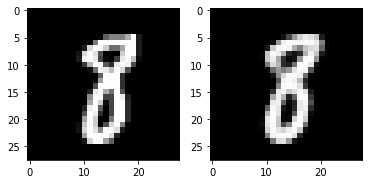

Epoch 219 Loss: 76.07


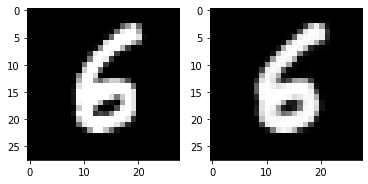

Epoch 220 Loss: 76.07


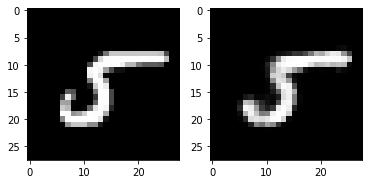

Epoch 221 Loss: 76.01


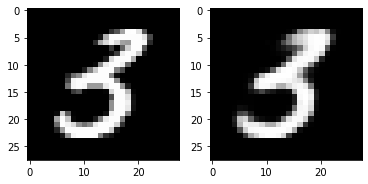

Epoch 222 Loss: 76.01


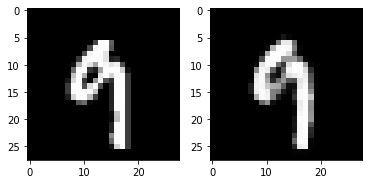

Epoch 223 Loss: 76.02


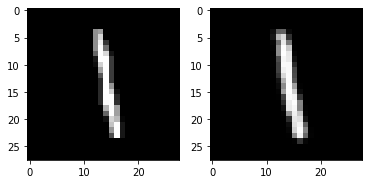

Epoch 224 Loss: 76.11


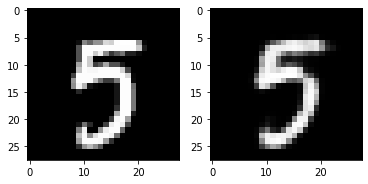

Epoch 225 Loss: 75.97


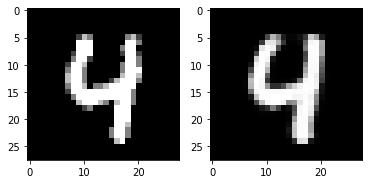

Epoch 226 Loss: 76.04


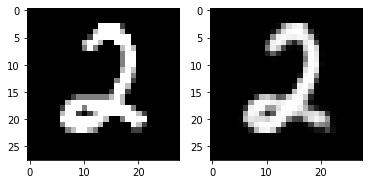

Epoch 227 Loss: 75.90


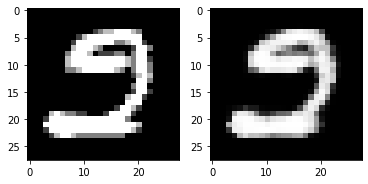

Epoch 228 Loss: 75.89


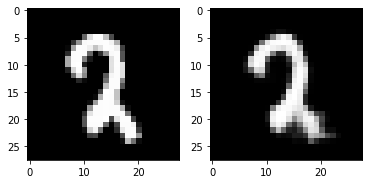

Epoch 229 Loss: 75.91


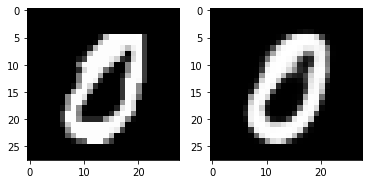

Epoch 230 Loss: 75.88


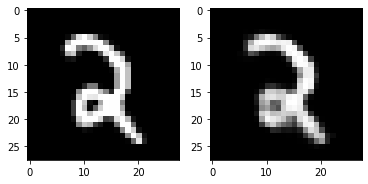

Epoch 231 Loss: 76.00


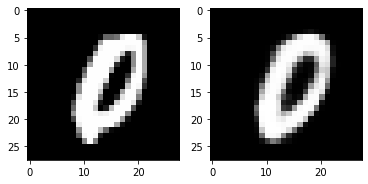

Epoch 232 Loss: 75.96


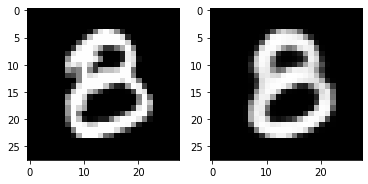

Epoch 233 Loss: 75.88


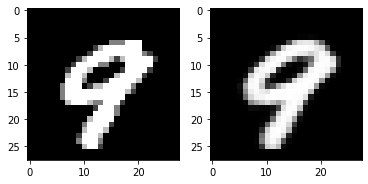

Epoch 234 Loss: 75.92


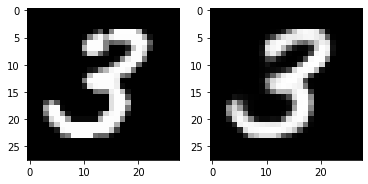

Epoch 235 Loss: 75.88


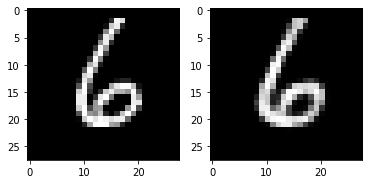

Epoch 236 Loss: 75.79


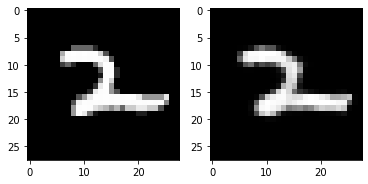

Epoch 237 Loss: 75.85


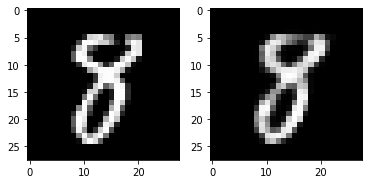

Epoch 238 Loss: 75.81


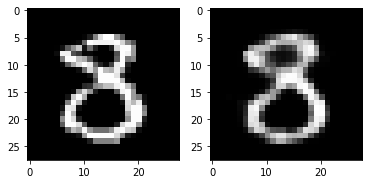

Epoch 239 Loss: 75.74


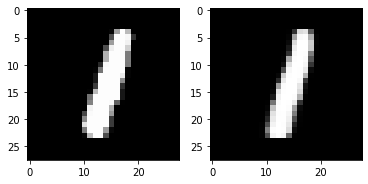

Epoch 240 Loss: 75.81


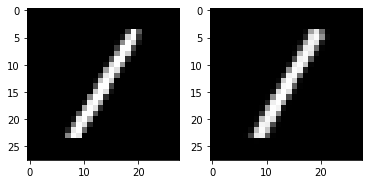

Epoch 241 Loss: 75.81


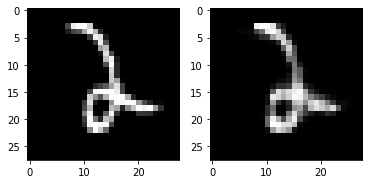

Epoch 242 Loss: 75.76


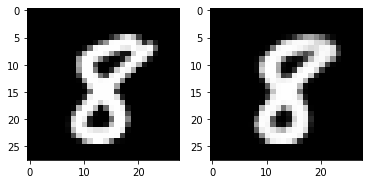

Epoch 243 Loss: 75.74


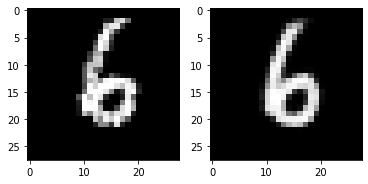

Epoch 244 Loss: 75.76


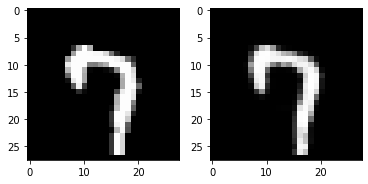

Epoch 245 Loss: 75.75


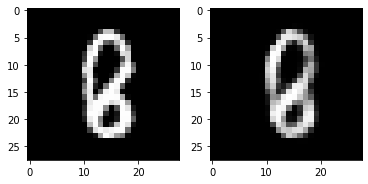

Epoch 246 Loss: 75.77


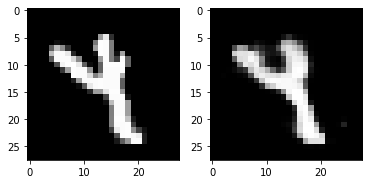

Epoch 247 Loss: 75.69


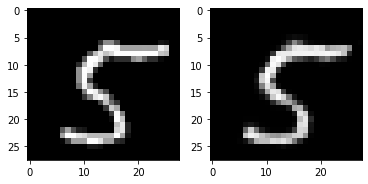

Epoch 248 Loss: 75.68


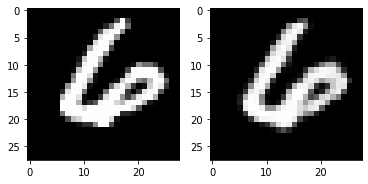

Epoch 249 Loss: 75.76


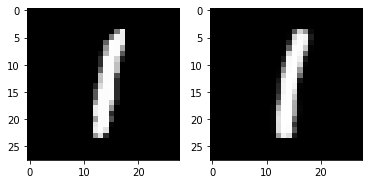

Epoch 250 Loss: 75.68


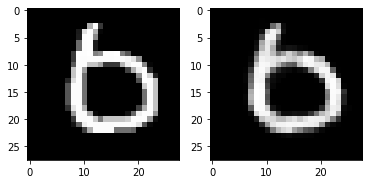

Epoch 251 Loss: 75.67


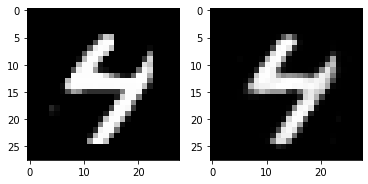

Epoch 252 Loss: 75.66


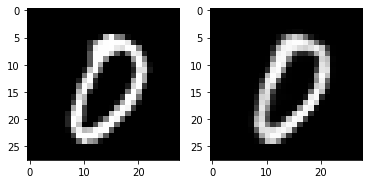

Epoch 253 Loss: 75.70


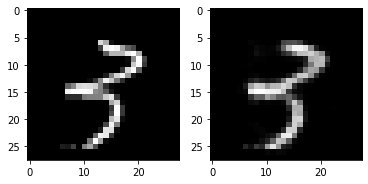

Epoch 254 Loss: 75.67


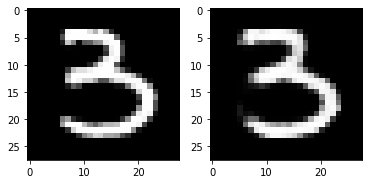

Epoch 255 Loss: 75.62


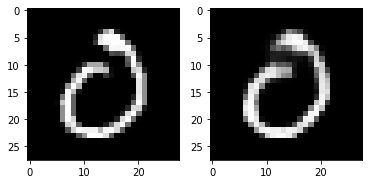

Epoch 256 Loss: 75.55


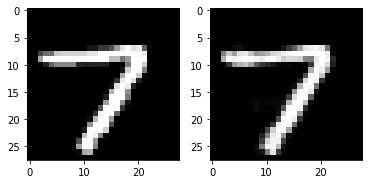

Epoch 257 Loss: 75.63


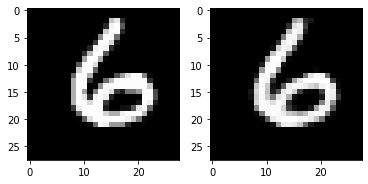

Epoch 258 Loss: 75.63


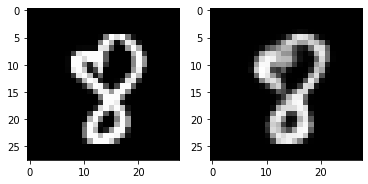

Epoch 259 Loss: 75.72


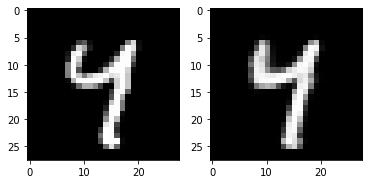

Epoch 260 Loss: 75.54


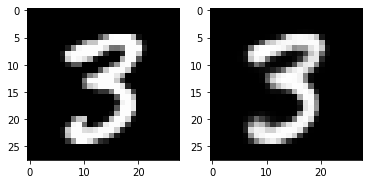

Epoch 261 Loss: 75.55


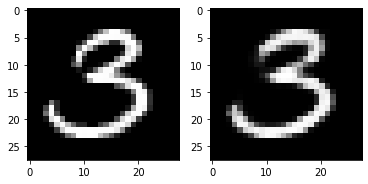

Epoch 262 Loss: 75.64


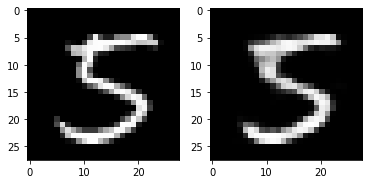

Epoch 263 Loss: 75.59


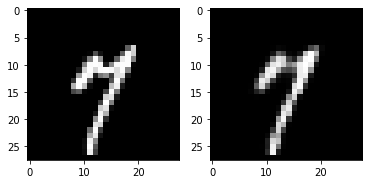

Epoch 264 Loss: 75.57


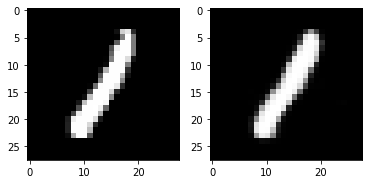

Epoch 265 Loss: 75.48


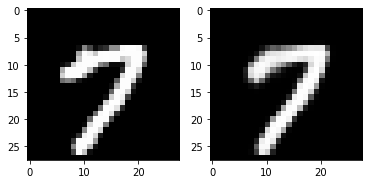

Epoch 266 Loss: 75.54


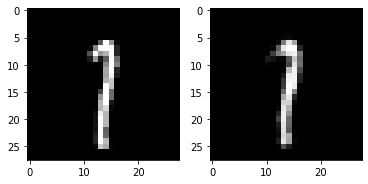

Epoch 267 Loss: 75.53


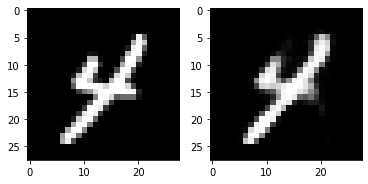

Epoch 268 Loss: 75.47


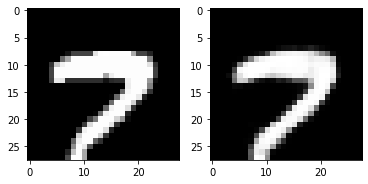

Epoch 269 Loss: 75.52


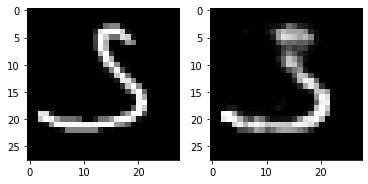

Epoch 270 Loss: 75.54


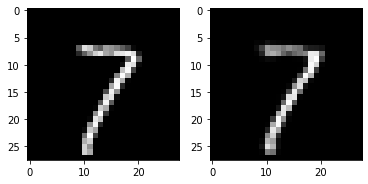

Epoch 271 Loss: 75.51


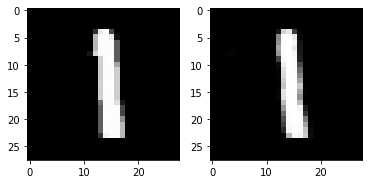

Epoch 272 Loss: 75.53


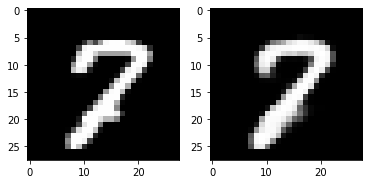

Epoch 273 Loss: 75.46


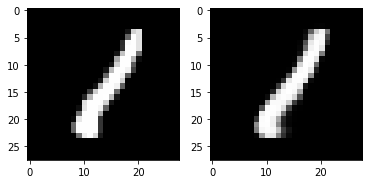

Epoch 274 Loss: 75.48


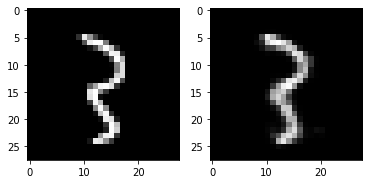

Epoch 275 Loss: 75.51


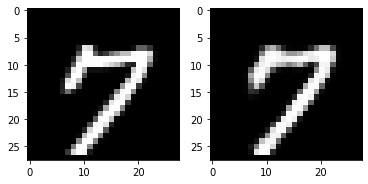

Epoch 276 Loss: 75.39


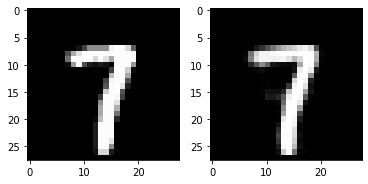

Epoch 277 Loss: 75.39


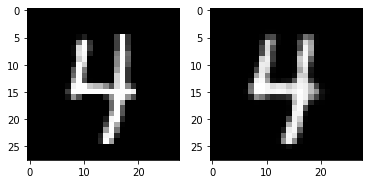

Epoch 278 Loss: 75.35


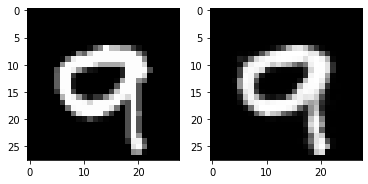

Epoch 279 Loss: 75.49


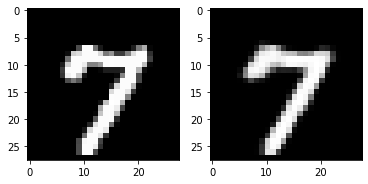

Epoch 280 Loss: 75.38


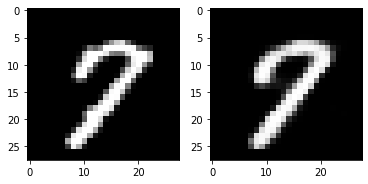

Epoch 281 Loss: 75.45


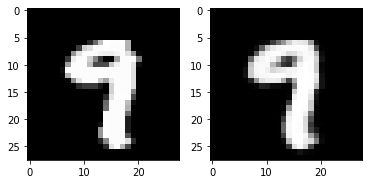

Epoch 282 Loss: 75.36


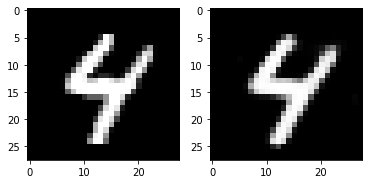

Epoch 283 Loss: 75.38


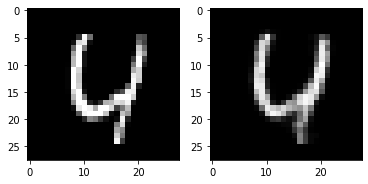

Epoch 284 Loss: 75.40


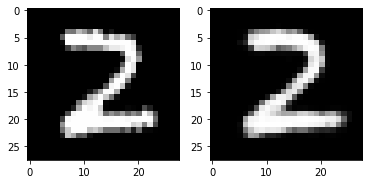

Epoch 285 Loss: 75.35


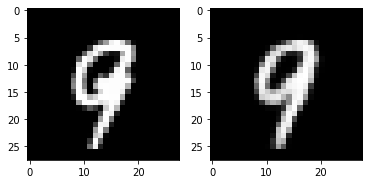

Epoch 286 Loss: 75.39


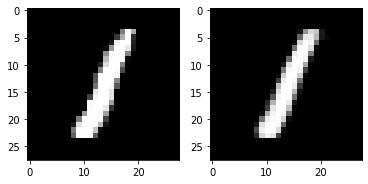

Epoch 287 Loss: 75.28


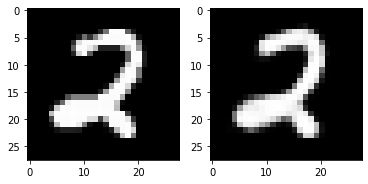

Epoch 288 Loss: 75.36


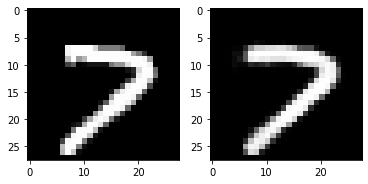

Epoch 289 Loss: 75.30


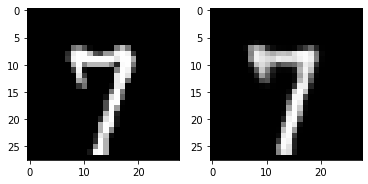

Epoch 290 Loss: 75.29


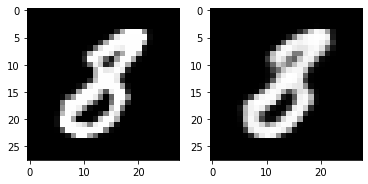

Epoch 291 Loss: 75.43


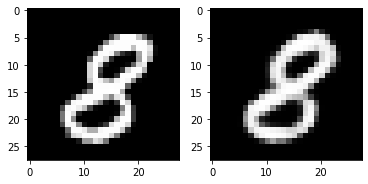

Epoch 292 Loss: 75.29


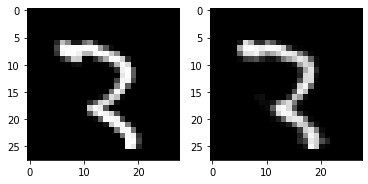

Epoch 293 Loss: 75.36


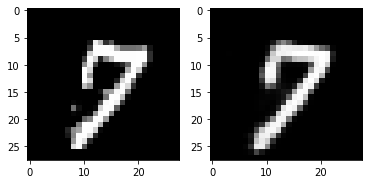

Epoch 294 Loss: 75.29


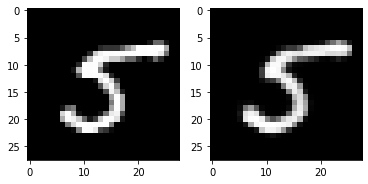

Epoch 295 Loss: 75.26


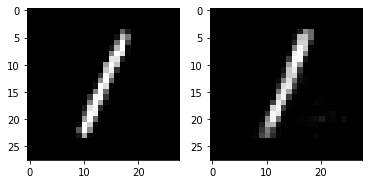

Epoch 296 Loss: 75.21


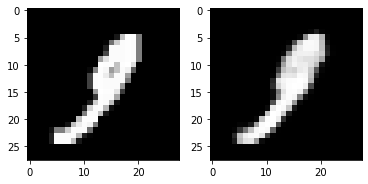

Epoch 297 Loss: 75.15


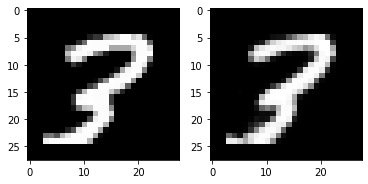

Epoch 298 Loss: 75.22


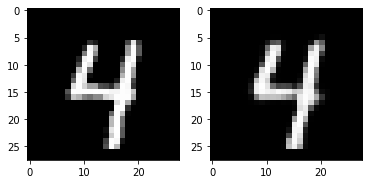

Epoch 299 Loss: 75.31


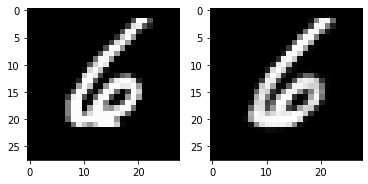

Epoch 300 Loss: 75.31


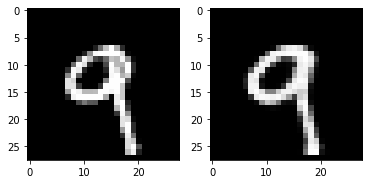

Epoch 301 Loss: 75.20


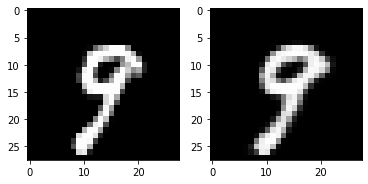

Epoch 302 Loss: 75.26


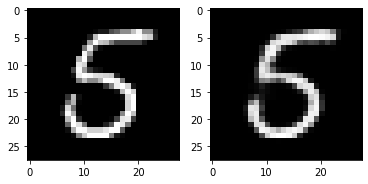

Epoch 303 Loss: 75.22


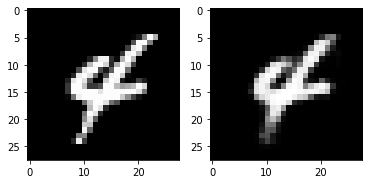

Epoch 304 Loss: 75.19


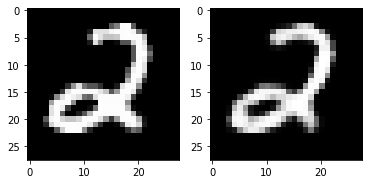

Epoch 305 Loss: 75.23


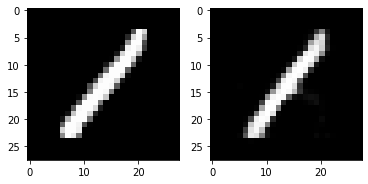

Epoch 306 Loss: 75.19


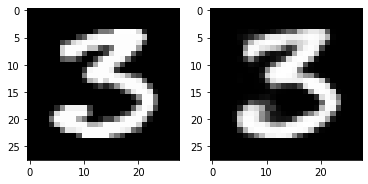

Epoch 307 Loss: 75.14


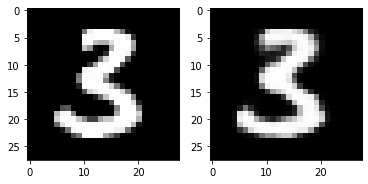

Epoch 308 Loss: 75.16


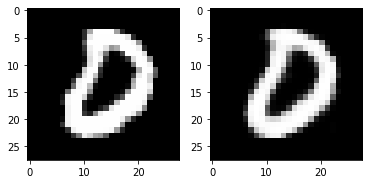

Epoch 309 Loss: 75.20


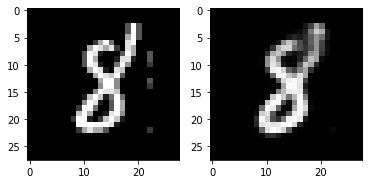

Epoch 310 Loss: 75.11


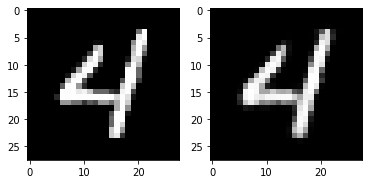

Epoch 311 Loss: 75.26


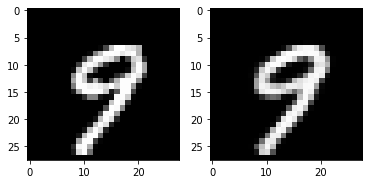

Epoch 312 Loss: 75.16


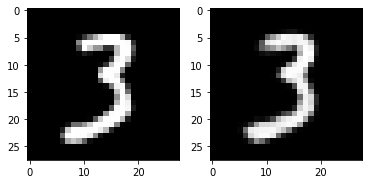

Epoch 313 Loss: 75.16


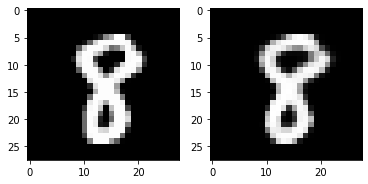

Epoch 314 Loss: 75.19


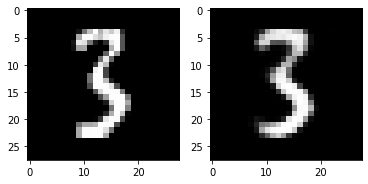

Epoch 315 Loss: 75.04


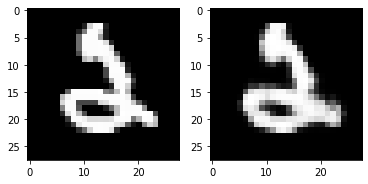

Epoch 316 Loss: 75.12


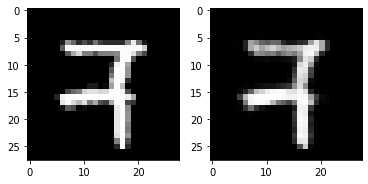

Epoch 317 Loss: 75.07


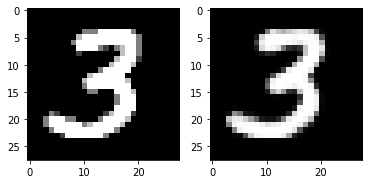

Epoch 318 Loss: 75.11


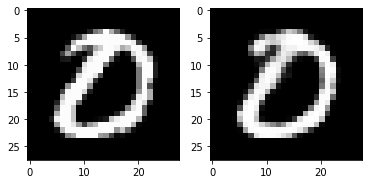

Epoch 319 Loss: 75.15


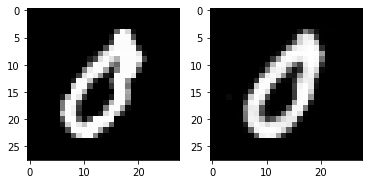

Epoch 320 Loss: 75.12


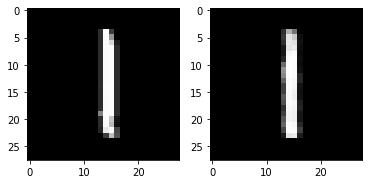

Epoch 321 Loss: 75.08


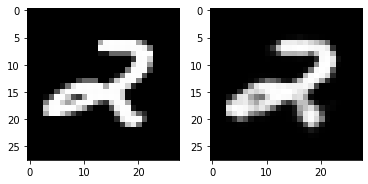

Epoch 322 Loss: 75.07


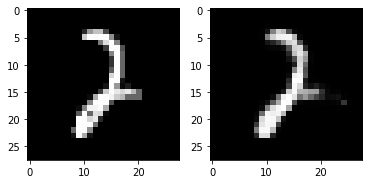

Epoch 323 Loss: 75.10


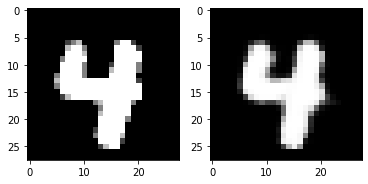

Epoch 324 Loss: 75.01


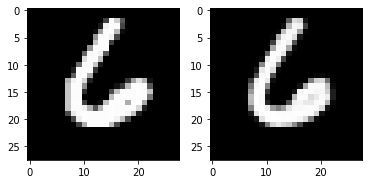

Epoch 325 Loss: 75.05


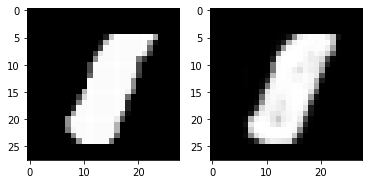

Epoch 326 Loss: 75.07


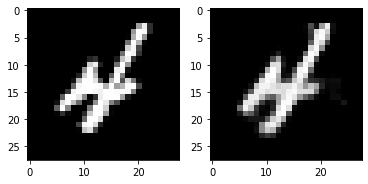

Epoch 327 Loss: 74.99


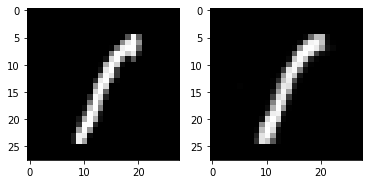

Epoch 328 Loss: 75.03


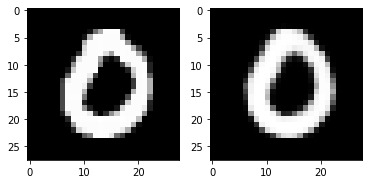

Epoch 329 Loss: 75.04


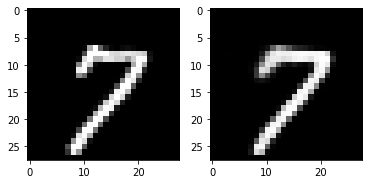

Epoch 330 Loss: 74.95


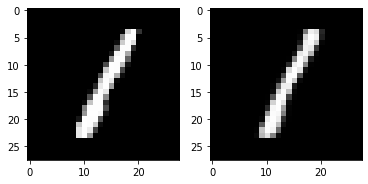

Epoch 331 Loss: 74.97


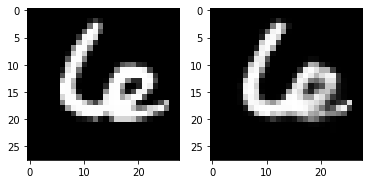

Epoch 332 Loss: 75.00


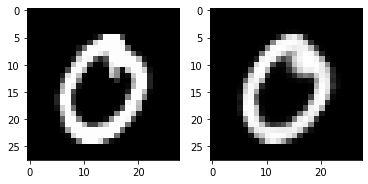

Epoch 333 Loss: 75.05


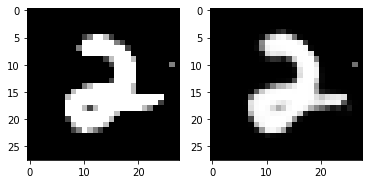

Epoch 334 Loss: 75.04


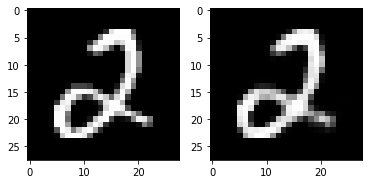

Epoch 335 Loss: 74.98


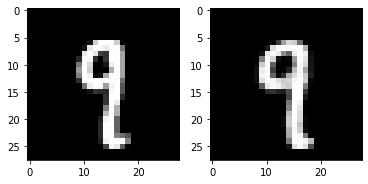

Epoch 336 Loss: 75.01


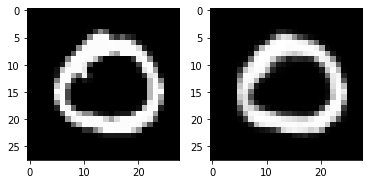

Epoch 337 Loss: 75.01


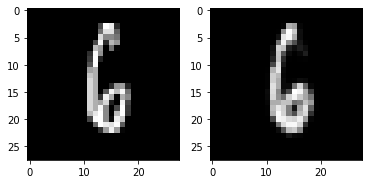

Epoch 338 Loss: 74.95


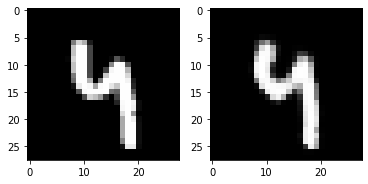

Epoch 339 Loss: 74.94


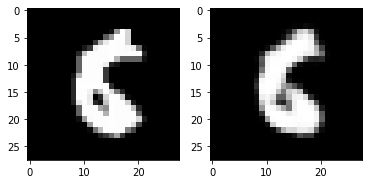

Epoch 340 Loss: 74.96


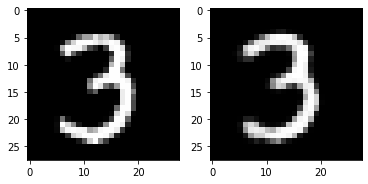

Epoch 341 Loss: 74.95


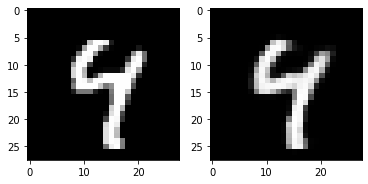

Epoch 342 Loss: 74.92


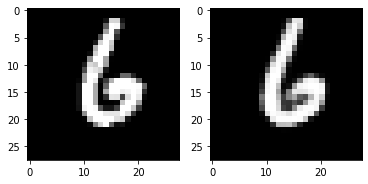

Epoch 343 Loss: 74.91


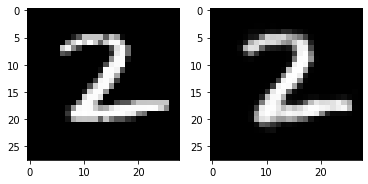

Epoch 344 Loss: 74.89


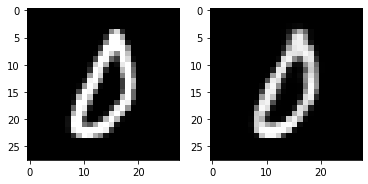

Epoch 345 Loss: 74.92


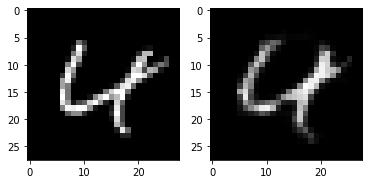

Epoch 346 Loss: 75.01


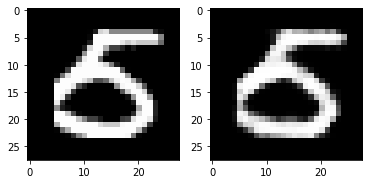

Epoch 347 Loss: 74.92


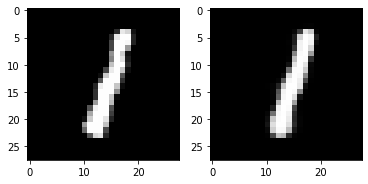

Epoch 348 Loss: 74.93


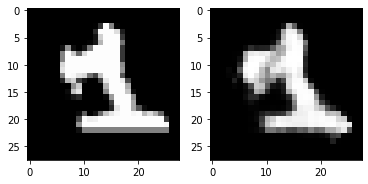

Epoch 349 Loss: 74.98


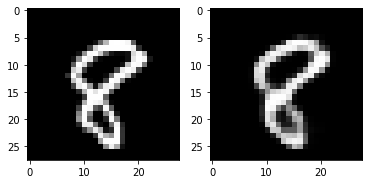

Epoch 350 Loss: 74.85


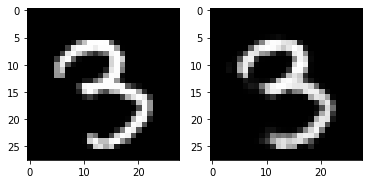

Epoch 351 Loss: 74.88


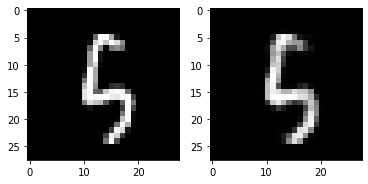

Epoch 352 Loss: 74.94


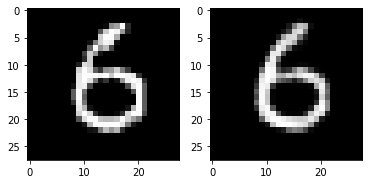

Epoch 353 Loss: 74.88


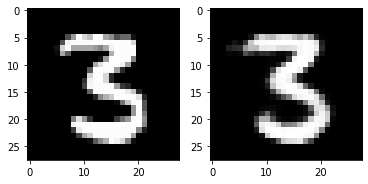

Epoch 354 Loss: 74.87


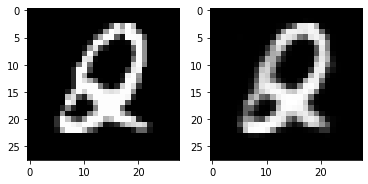

Epoch 355 Loss: 74.83


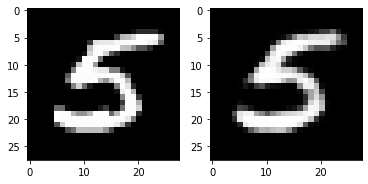

Epoch 356 Loss: 74.90


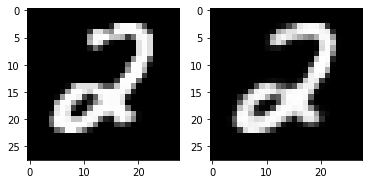

Epoch 357 Loss: 74.87


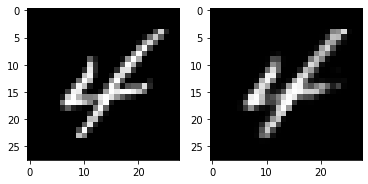

Epoch 358 Loss: 74.89


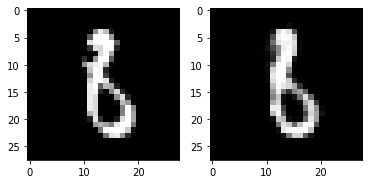

Epoch 359 Loss: 74.79


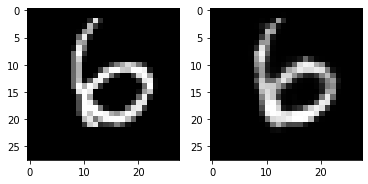

Epoch 360 Loss: 74.94


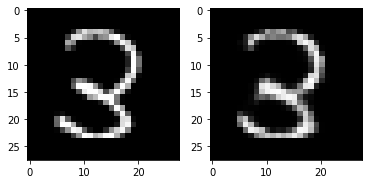

Epoch 361 Loss: 74.82


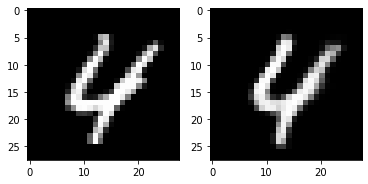

Epoch 362 Loss: 74.79


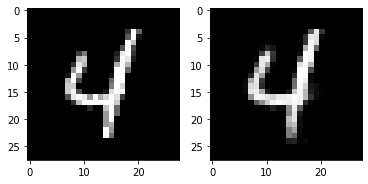

Epoch 363 Loss: 74.83


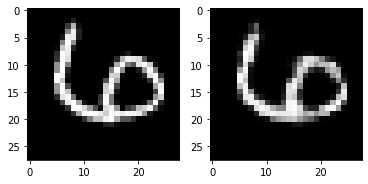

Epoch 364 Loss: 74.93


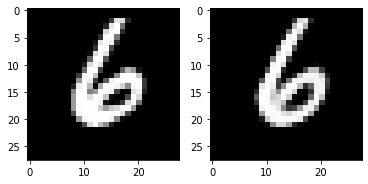

Epoch 365 Loss: 74.85


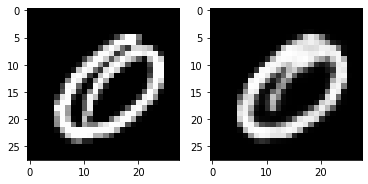

Epoch 366 Loss: 74.83


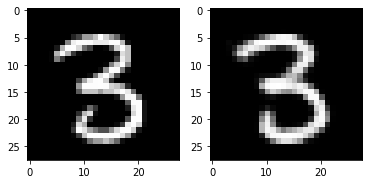

Epoch 367 Loss: 74.85


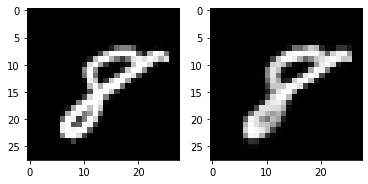

Epoch 368 Loss: 74.80


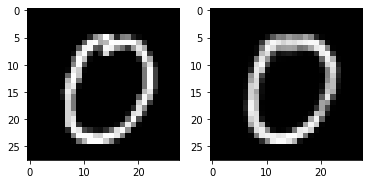

Epoch 369 Loss: 74.76


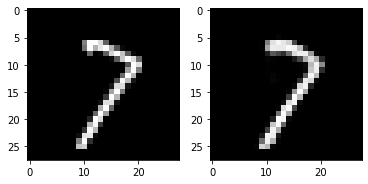

Epoch 370 Loss: 74.76


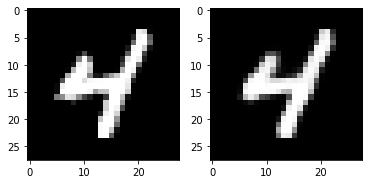

Epoch 371 Loss: 74.77


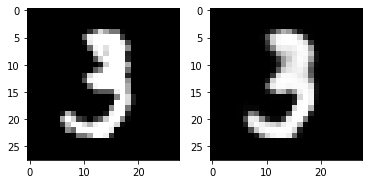

Epoch 372 Loss: 74.77


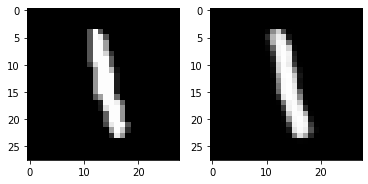

Epoch 373 Loss: 74.74


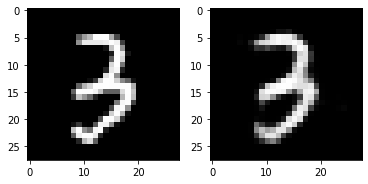

Epoch 374 Loss: 74.78


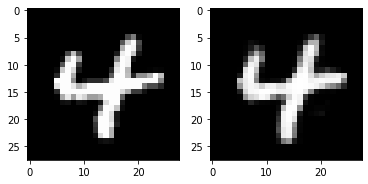

Epoch 375 Loss: 74.79


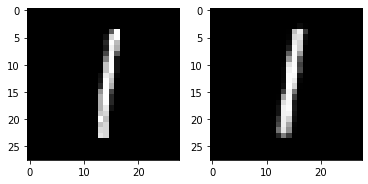

Epoch 376 Loss: 74.69


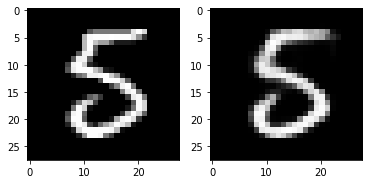

Epoch 377 Loss: 74.68


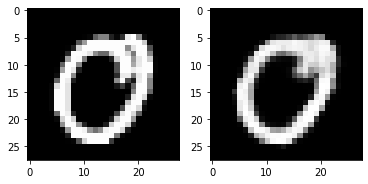

Epoch 378 Loss: 74.72


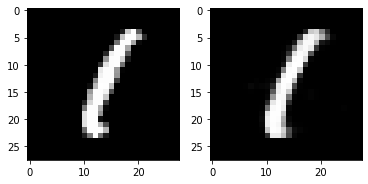

Epoch 379 Loss: 74.79


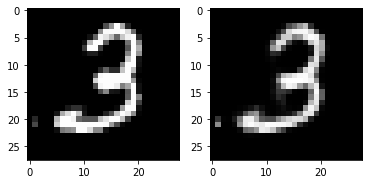

Epoch 380 Loss: 74.72


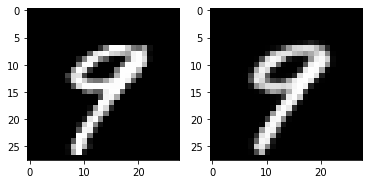

Epoch 381 Loss: 74.70


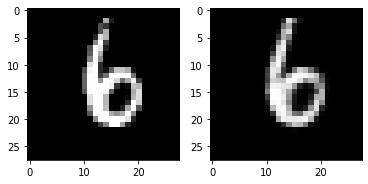

Epoch 382 Loss: 74.72


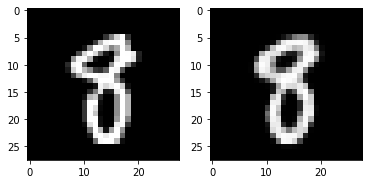

Epoch 383 Loss: 74.65


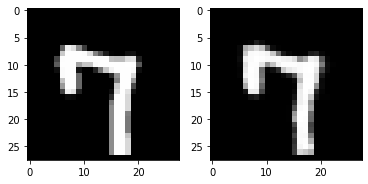

Epoch 384 Loss: 74.69


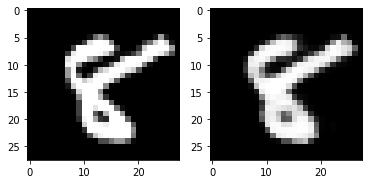

Epoch 385 Loss: 74.75


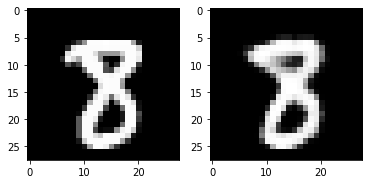

Epoch 386 Loss: 74.61


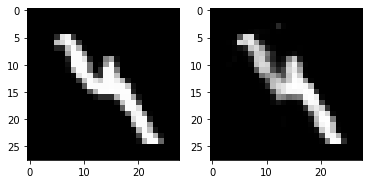

Epoch 387 Loss: 74.72


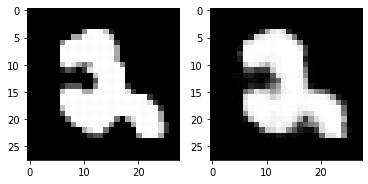

Epoch 388 Loss: 74.74


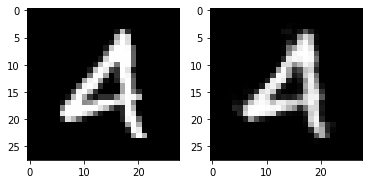

Epoch 389 Loss: 74.65


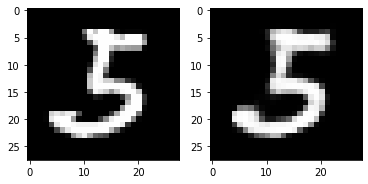

Epoch 390 Loss: 74.63


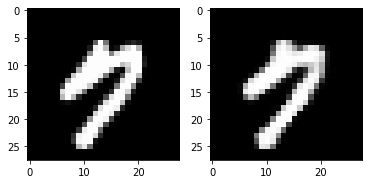

Epoch 391 Loss: 74.75


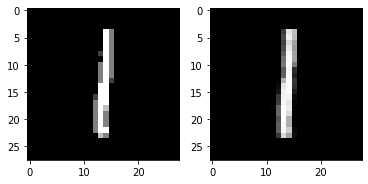

Epoch 392 Loss: 74.68


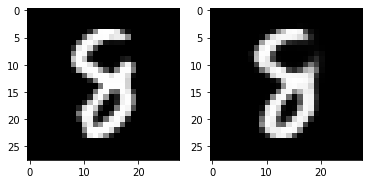

Epoch 393 Loss: 74.67


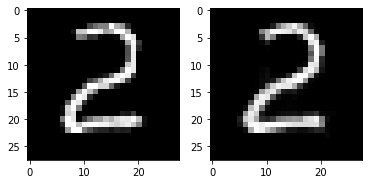

Epoch 394 Loss: 74.70


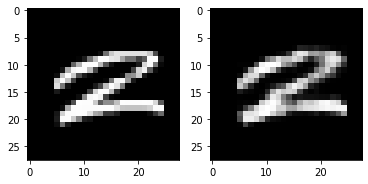

Epoch 395 Loss: 74.63


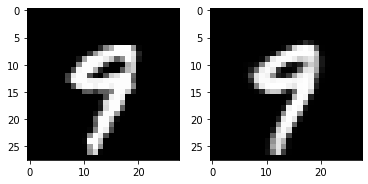

Epoch 396 Loss: 74.59


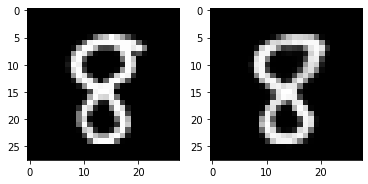

Epoch 397 Loss: 74.61


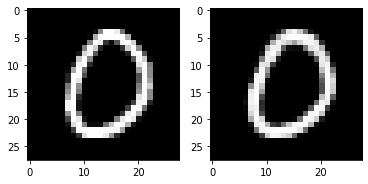

Epoch 398 Loss: 74.55


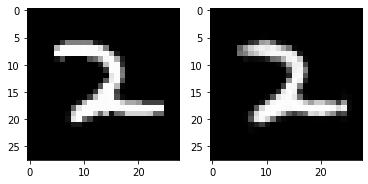

Epoch 399 Loss: 74.65


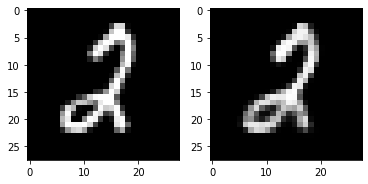

Epoch 400 Loss: 74.62


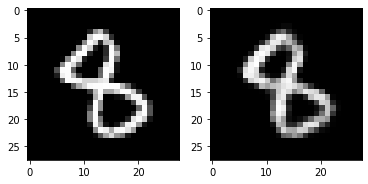

Epoch 401 Loss: 74.61


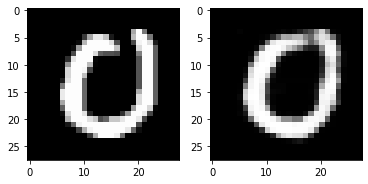

Epoch 402 Loss: 74.56


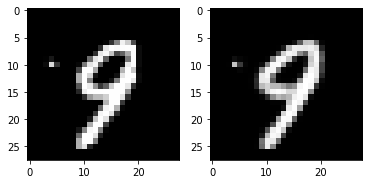

Epoch 403 Loss: 74.59


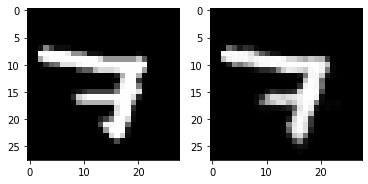

Epoch 404 Loss: 74.60


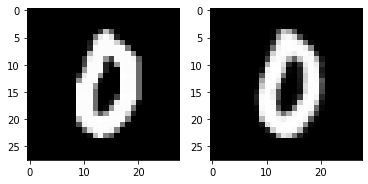

Epoch 405 Loss: 74.62


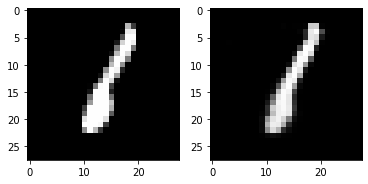

Epoch 406 Loss: 74.58


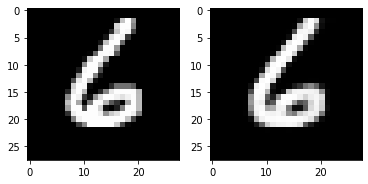

Epoch 407 Loss: 74.57


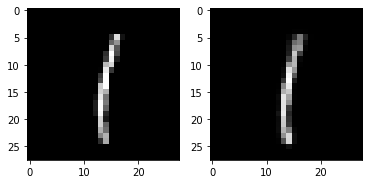

Epoch 408 Loss: 74.55


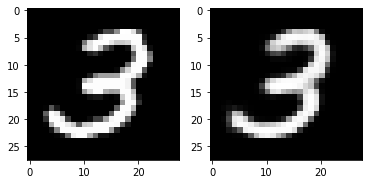

Epoch 409 Loss: 74.53


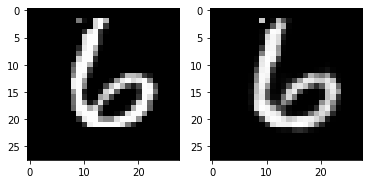

Epoch 410 Loss: 74.56


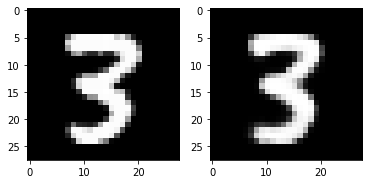

Epoch 411 Loss: 74.63


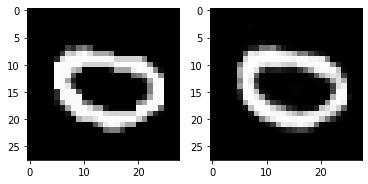

Epoch 412 Loss: 74.61


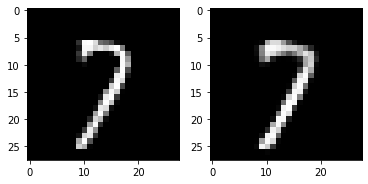

Epoch 413 Loss: 74.60


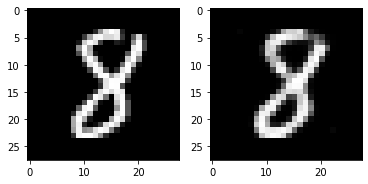

Epoch 414 Loss: 74.56


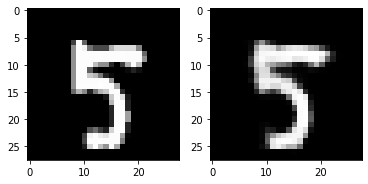

Epoch 415 Loss: 74.53


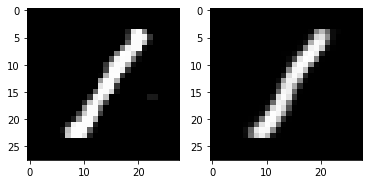

Epoch 416 Loss: 74.50


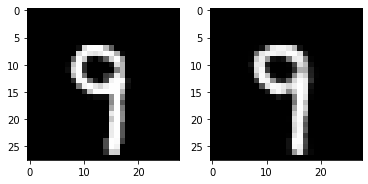

Epoch 417 Loss: 74.48


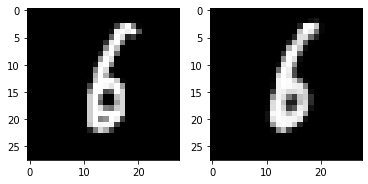

Epoch 418 Loss: 74.60


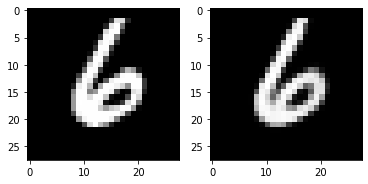

Epoch 419 Loss: 74.54


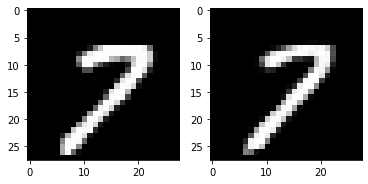

Epoch 420 Loss: 74.51


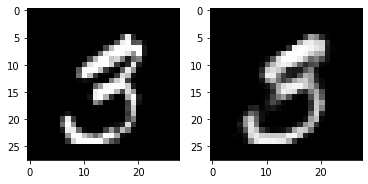

Epoch 421 Loss: 74.50


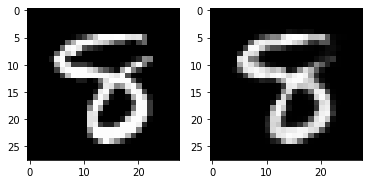

Epoch 422 Loss: 74.53


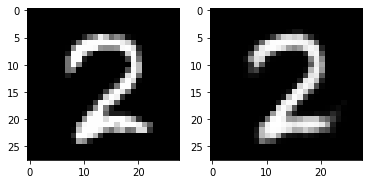

Epoch 423 Loss: 74.52


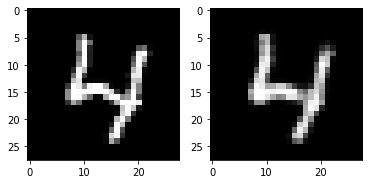

Epoch 424 Loss: 74.53


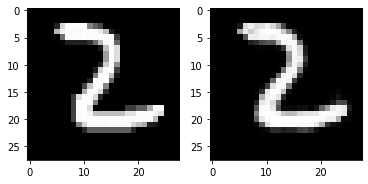

Epoch 425 Loss: 74.55


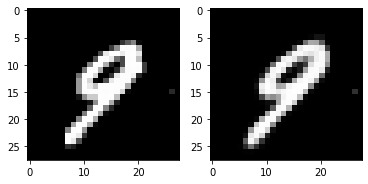

Epoch 426 Loss: 74.53


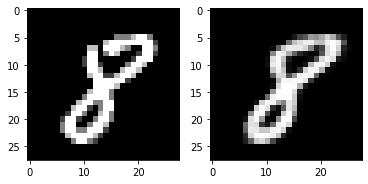

Epoch 427 Loss: 74.47


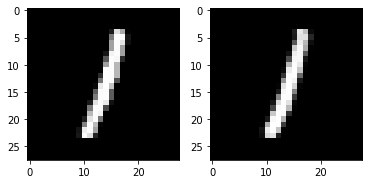

Epoch 428 Loss: 74.49


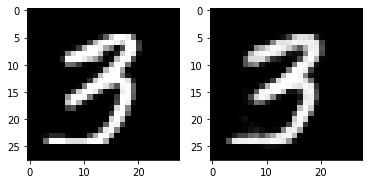

Epoch 429 Loss: 74.55


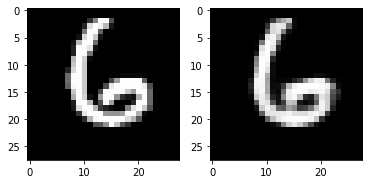

Epoch 430 Loss: 74.55


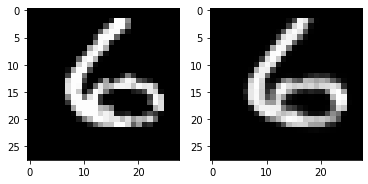

Epoch 431 Loss: 74.51


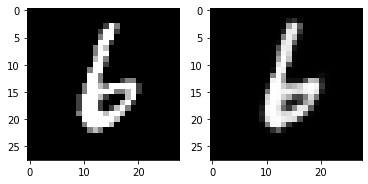

Epoch 432 Loss: 74.49


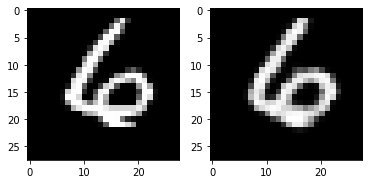

Epoch 433 Loss: 74.48


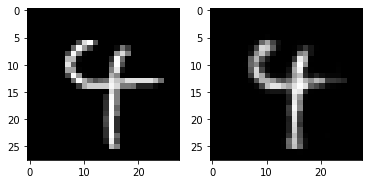

Epoch 434 Loss: 74.47


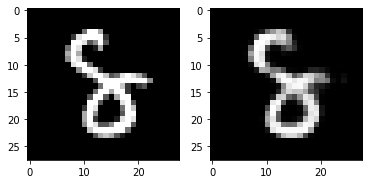

Epoch 435 Loss: 74.47


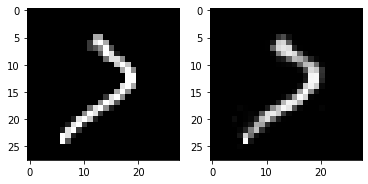

Epoch 436 Loss: 74.51


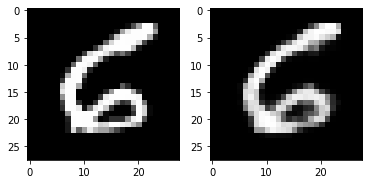

Epoch 437 Loss: 74.49


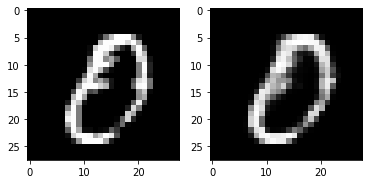

Epoch 438 Loss: 74.41


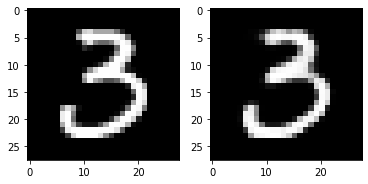

Epoch 439 Loss: 74.40


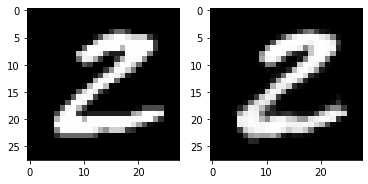

Epoch 440 Loss: 74.43


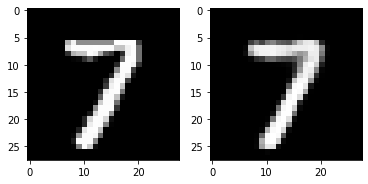

Epoch 441 Loss: 74.61


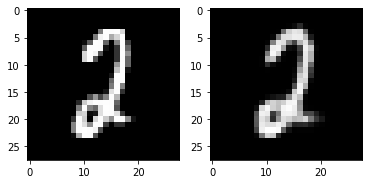

Epoch 442 Loss: 74.44


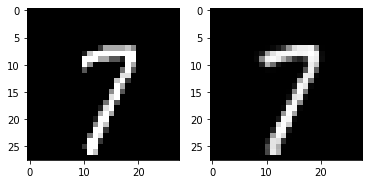

Epoch 443 Loss: 74.46


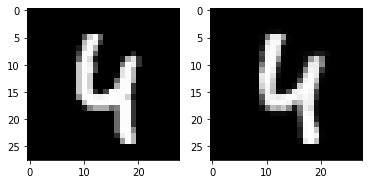

Epoch 444 Loss: 74.41


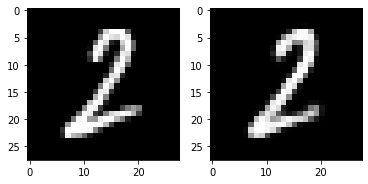

Epoch 445 Loss: 74.41


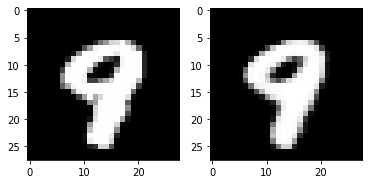

Epoch 446 Loss: 74.43


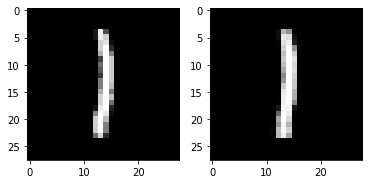

Epoch 447 Loss: 74.39


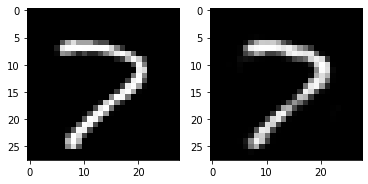

Epoch 448 Loss: 74.38


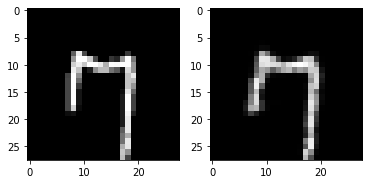

Epoch 449 Loss: 74.39


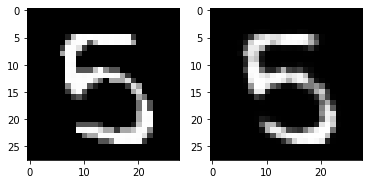

Epoch 450 Loss: 74.35


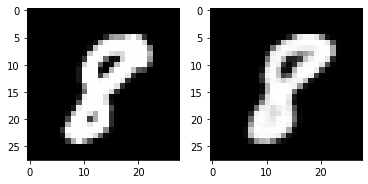

Epoch 451 Loss: 74.36


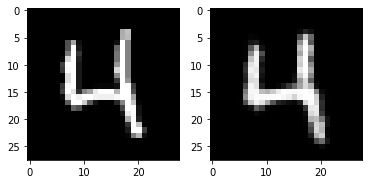

Epoch 452 Loss: 74.37


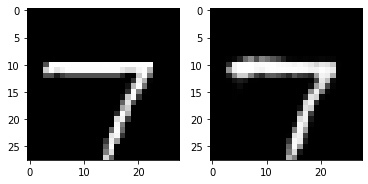

Epoch 453 Loss: 74.37


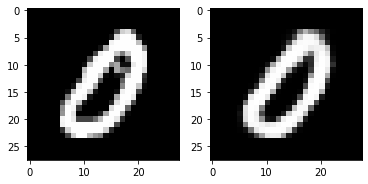

Epoch 454 Loss: 74.38


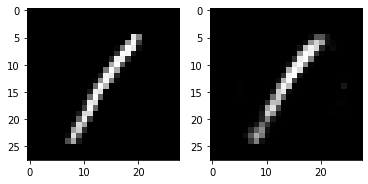

Epoch 455 Loss: 74.36


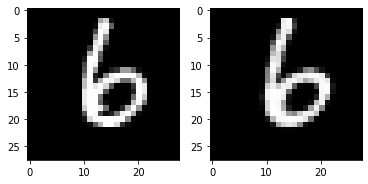

Epoch 456 Loss: 74.43


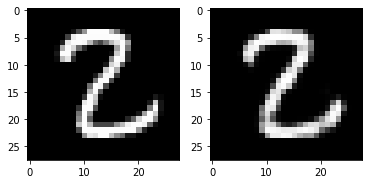

Epoch 457 Loss: 74.35


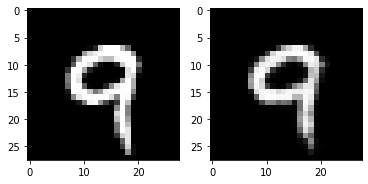

Epoch 458 Loss: 74.38


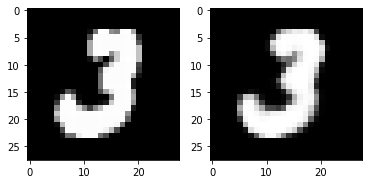

Epoch 459 Loss: 74.34


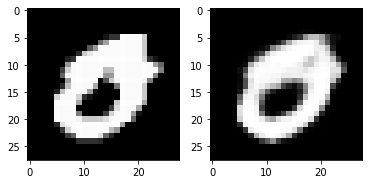

Epoch 460 Loss: 74.36


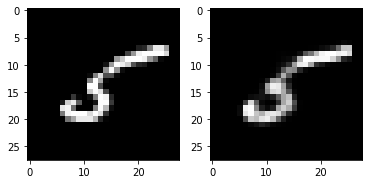

Epoch 461 Loss: 74.48


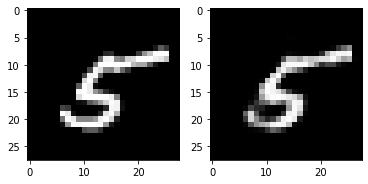

Epoch 462 Loss: 74.32


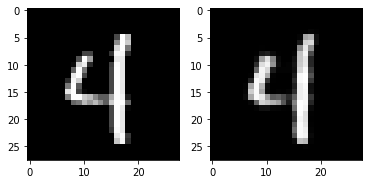

Epoch 463 Loss: 74.33


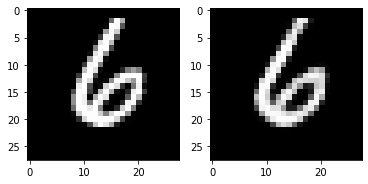

Epoch 464 Loss: 74.41


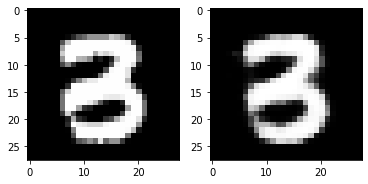

Epoch 465 Loss: 74.34


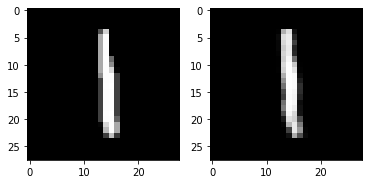

Epoch 466 Loss: 74.39


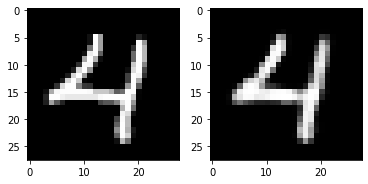

Epoch 467 Loss: 74.37


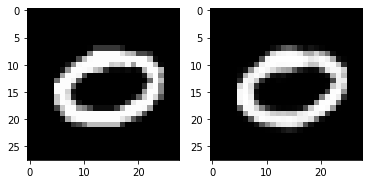

Epoch 468 Loss: 74.31


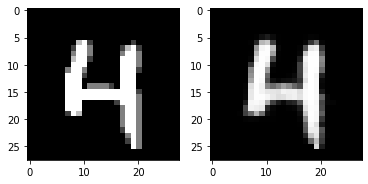

Epoch 469 Loss: 74.31


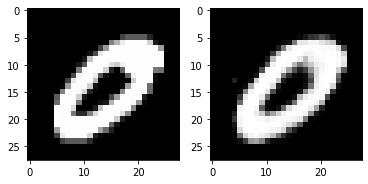

Epoch 470 Loss: 74.37


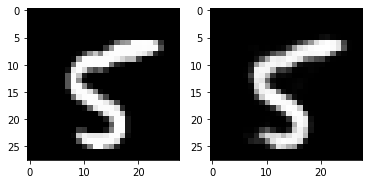

Epoch 471 Loss: 74.34


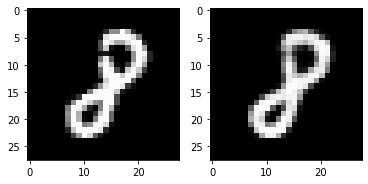

Epoch 472 Loss: 74.31


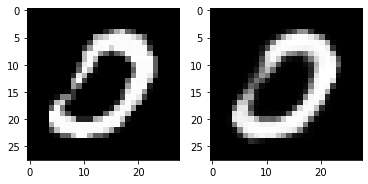

Epoch 473 Loss: 74.24


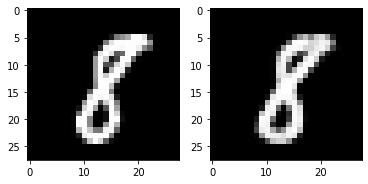

Epoch 474 Loss: 74.31


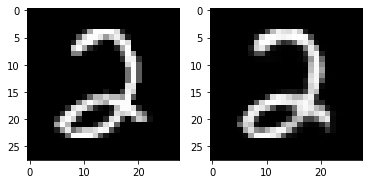

Epoch 475 Loss: 74.32


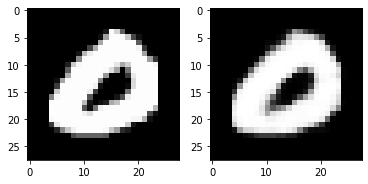

Epoch 476 Loss: 74.31


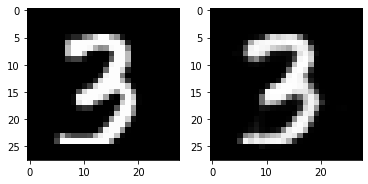

Epoch 477 Loss: 74.30


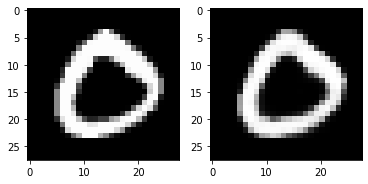

Epoch 478 Loss: 74.32


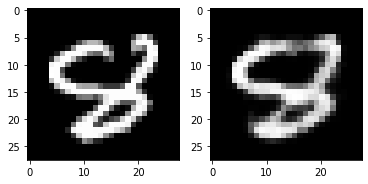

Epoch 479 Loss: 74.30


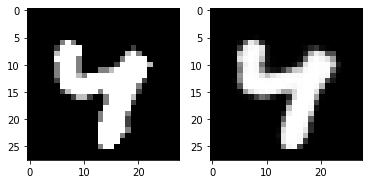

Epoch 480 Loss: 74.26


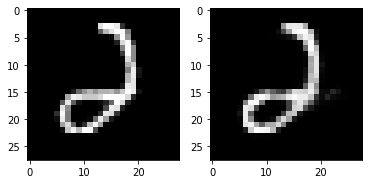

Epoch 481 Loss: 74.33


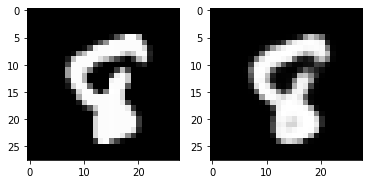

Epoch 482 Loss: 74.27


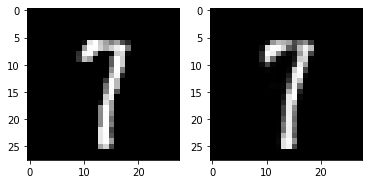

Epoch 483 Loss: 74.25


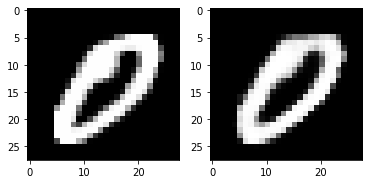

Epoch 484 Loss: 74.28


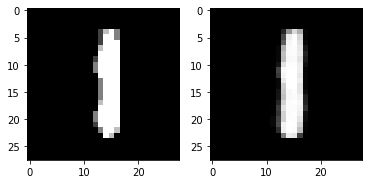

Epoch 485 Loss: 74.27


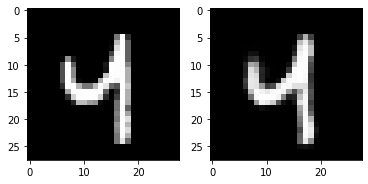

Epoch 486 Loss: 74.23


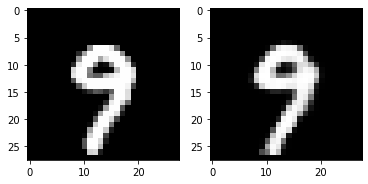

Epoch 487 Loss: 74.17


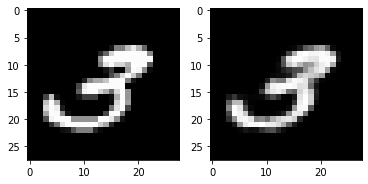

Epoch 488 Loss: 74.27


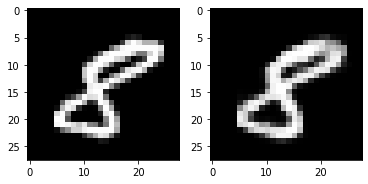

Epoch 489 Loss: 74.21


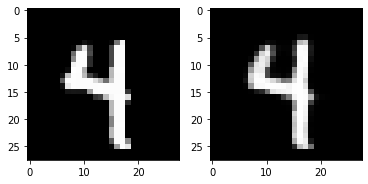

Epoch 490 Loss: 74.25


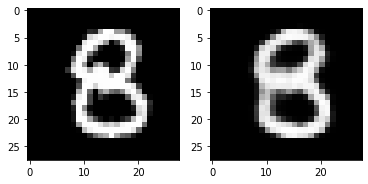

Epoch 491 Loss: 74.23


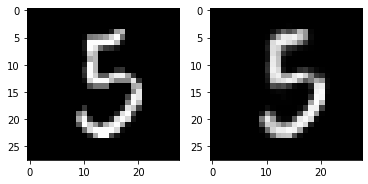

Epoch 492 Loss: 74.20


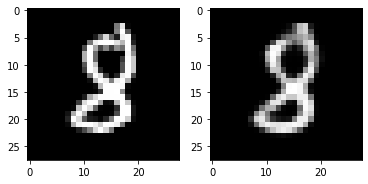

Epoch 493 Loss: 74.25


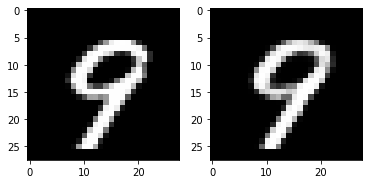

Epoch 494 Loss: 74.23


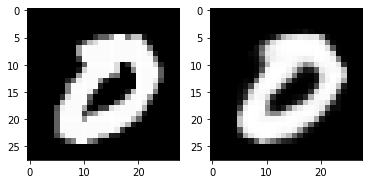

Epoch 495 Loss: 74.21


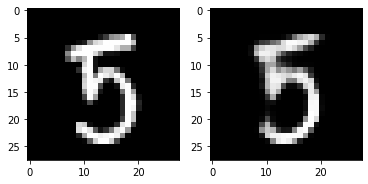

Epoch 496 Loss: 74.19


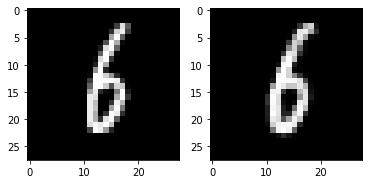

Epoch 497 Loss: 74.18


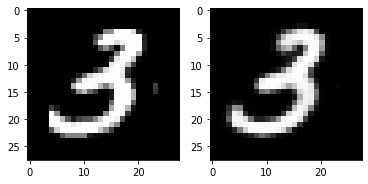

Epoch 498 Loss: 74.22


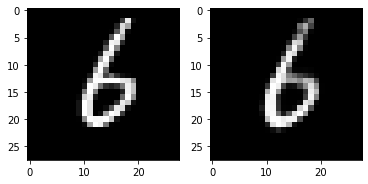

Epoch 499 Loss: 74.27


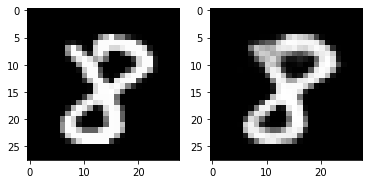

Epoch 500 Loss: 74.27


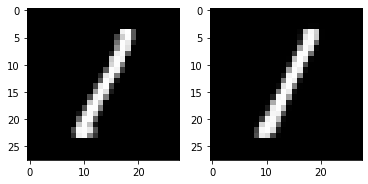

Epoch 501 Loss: 74.26


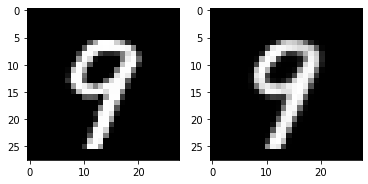

Epoch 502 Loss: 74.19


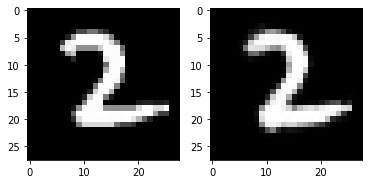

Epoch 503 Loss: 74.26


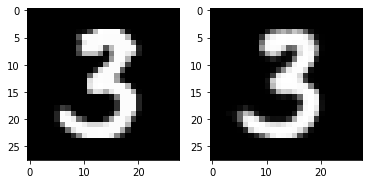

Epoch 504 Loss: 74.21


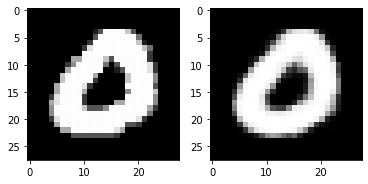

Epoch 505 Loss: 74.21


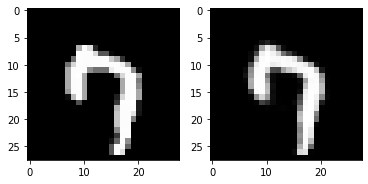

Epoch 506 Loss: 74.19


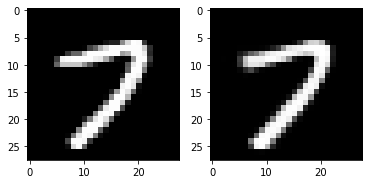

Epoch 507 Loss: 74.17


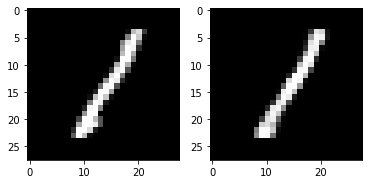

Epoch 508 Loss: 74.22


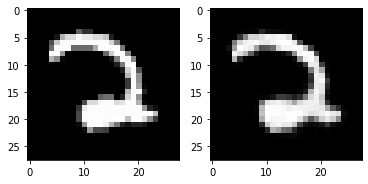

Epoch 509 Loss: 74.20


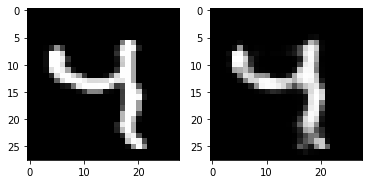

Epoch 510 Loss: 74.17


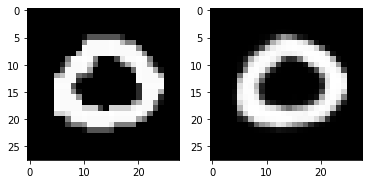

Epoch 511 Loss: 74.18


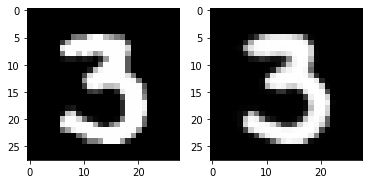

Epoch 512 Loss: 74.13


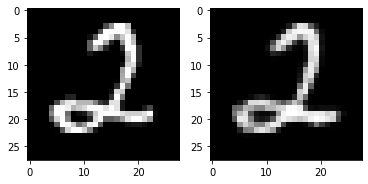

Epoch 513 Loss: 74.21


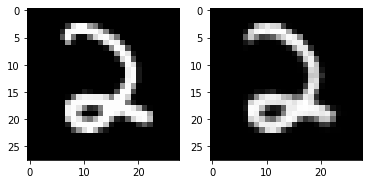

Epoch 514 Loss: 74.16


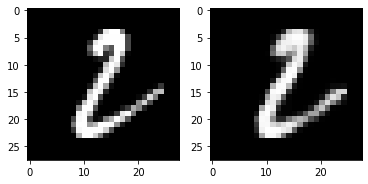

Epoch 515 Loss: 74.13


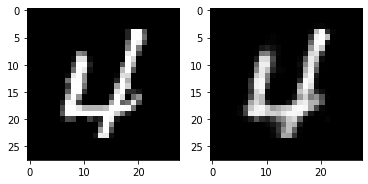

Epoch 516 Loss: 74.12


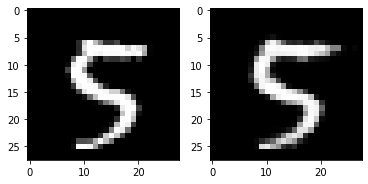

Epoch 517 Loss: 74.12


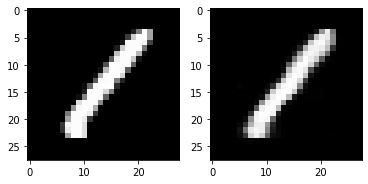

Epoch 518 Loss: 74.14


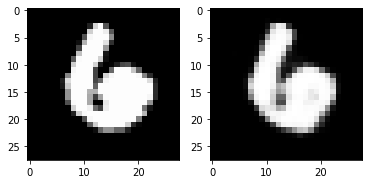

Epoch 519 Loss: 74.16


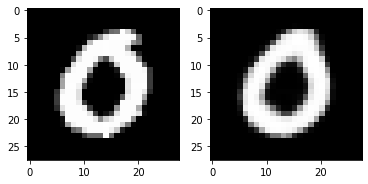

Epoch 520 Loss: 74.14


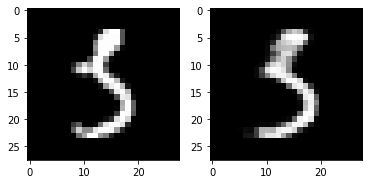

Epoch 521 Loss: 74.10


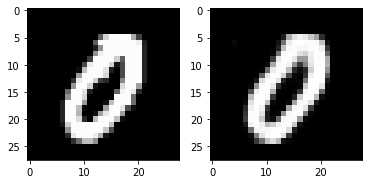

Epoch 522 Loss: 74.12


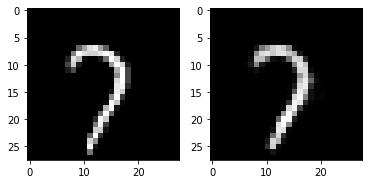

Epoch 523 Loss: 74.08


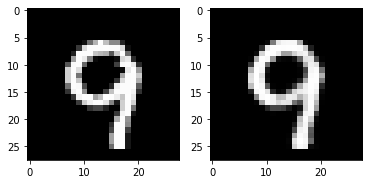

Epoch 524 Loss: 74.22


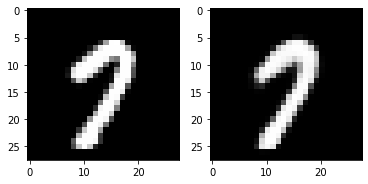

Epoch 525 Loss: 74.17


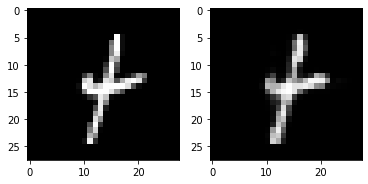

Epoch 526 Loss: 74.15


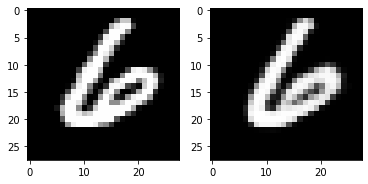

Epoch 527 Loss: 74.05


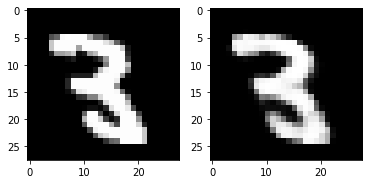

Epoch 528 Loss: 74.11


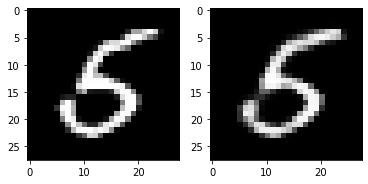

Epoch 529 Loss: 74.14


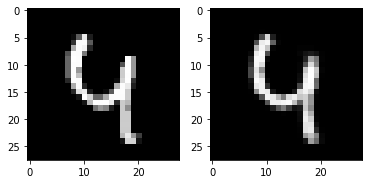

Epoch 530 Loss: 74.07


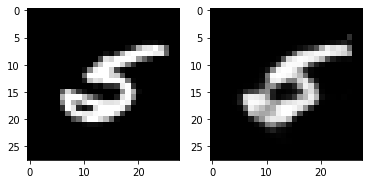

Epoch 531 Loss: 74.14


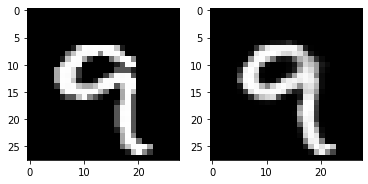

Epoch 532 Loss: 74.10


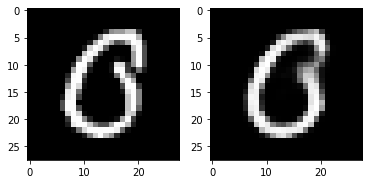

Epoch 533 Loss: 74.05


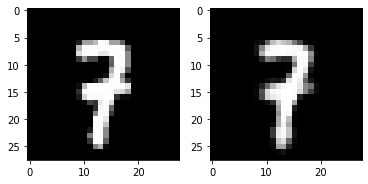

Epoch 534 Loss: 74.12


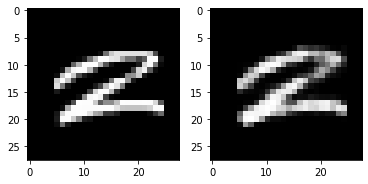

Epoch 535 Loss: 74.08


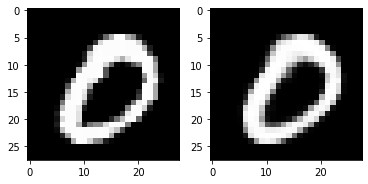

Epoch 536 Loss: 74.12


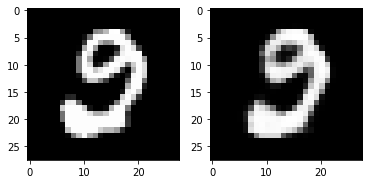

Epoch 537 Loss: 74.12


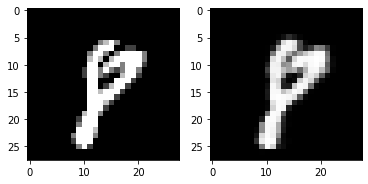

Epoch 538 Loss: 74.10


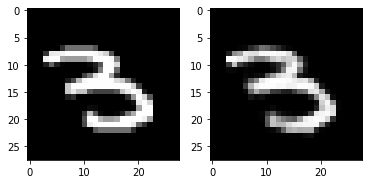

Epoch 539 Loss: 74.12


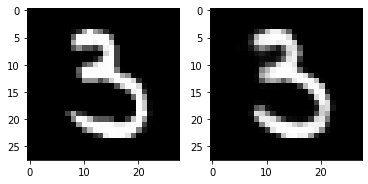

Epoch 540 Loss: 74.14


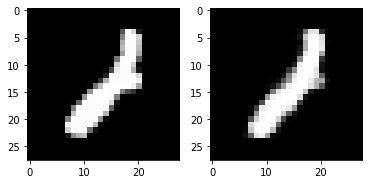

Epoch 541 Loss: 74.08


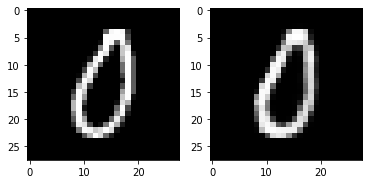

Epoch 542 Loss: 74.07


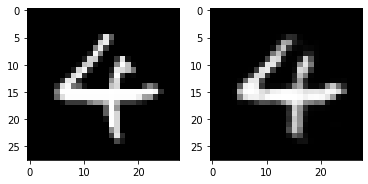

Epoch 543 Loss: 74.00


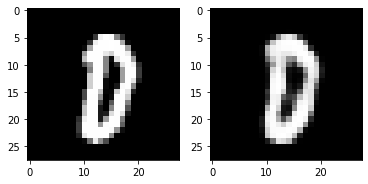

Epoch 544 Loss: 74.08


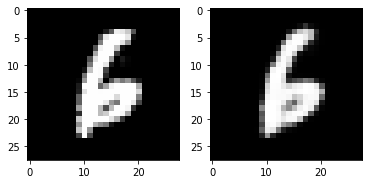

Epoch 545 Loss: 74.13


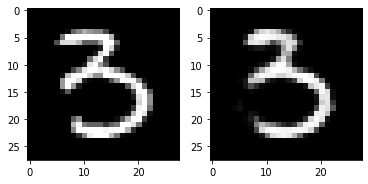

Epoch 546 Loss: 74.05


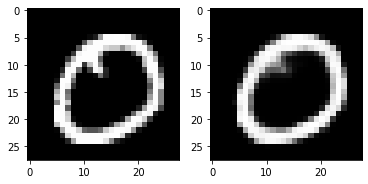

Epoch 547 Loss: 74.08


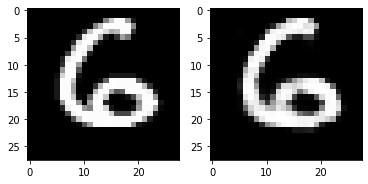

Epoch 548 Loss: 74.06


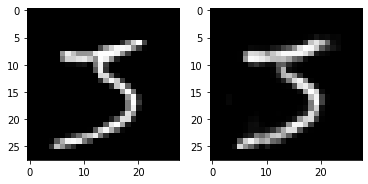

Epoch 549 Loss: 74.02


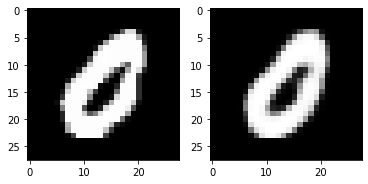

Epoch 550 Loss: 74.05


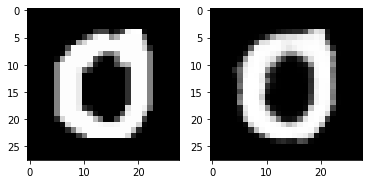

Epoch 551 Loss: 74.01


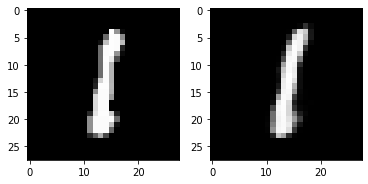

Epoch 552 Loss: 74.00


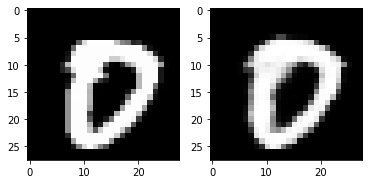

Epoch 553 Loss: 74.15


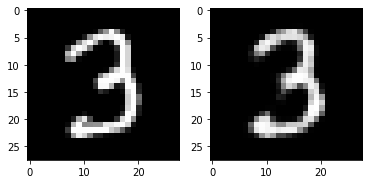

Epoch 554 Loss: 73.99


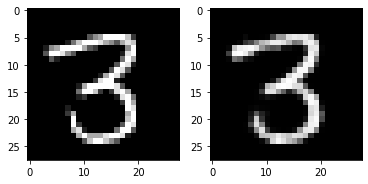

Epoch 555 Loss: 74.07


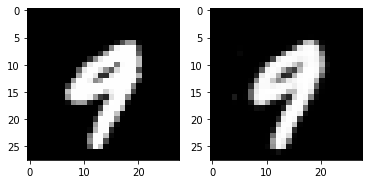

Epoch 556 Loss: 74.02


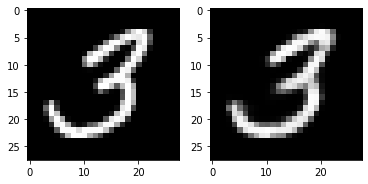

Epoch 557 Loss: 74.07


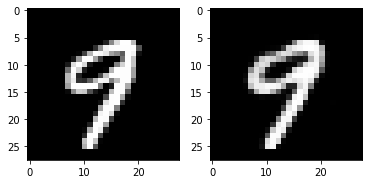

Epoch 558 Loss: 74.04


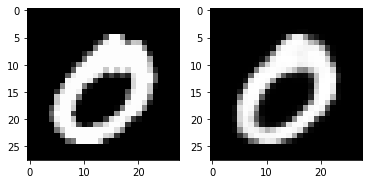

Epoch 559 Loss: 74.02


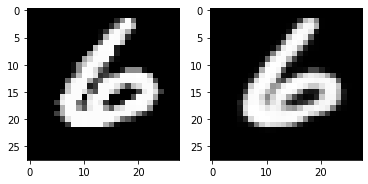

Epoch 560 Loss: 74.03


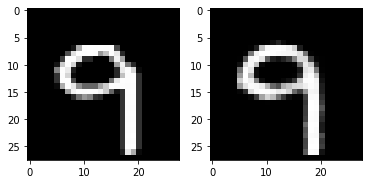

Epoch 561 Loss: 74.04


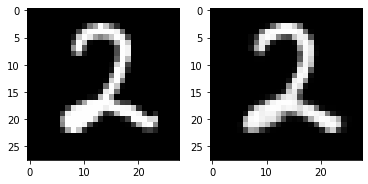

Epoch 562 Loss: 74.05


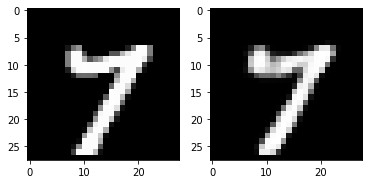

Epoch 563 Loss: 73.98


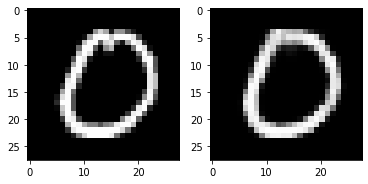

Epoch 564 Loss: 73.99


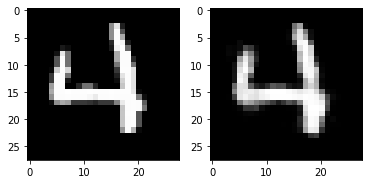

Epoch 565 Loss: 74.02


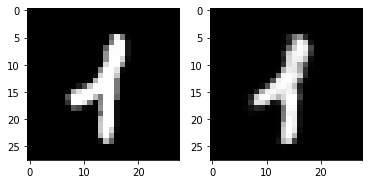

Epoch 566 Loss: 73.97


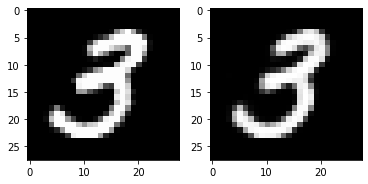

Epoch 567 Loss: 74.02


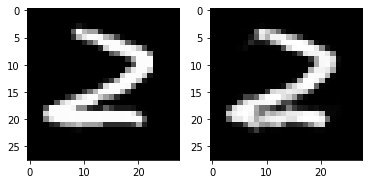

Epoch 568 Loss: 73.99


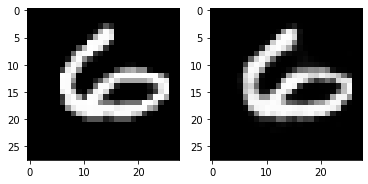

Epoch 569 Loss: 74.07


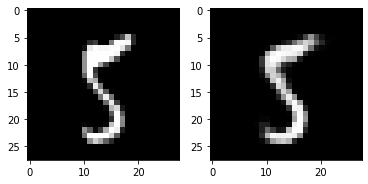

Epoch 570 Loss: 74.08


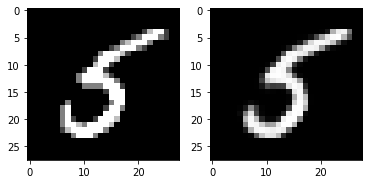

Epoch 571 Loss: 73.96


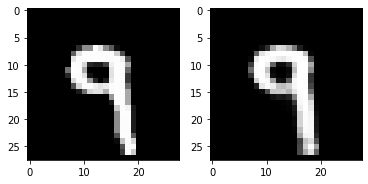

Epoch 572 Loss: 74.01


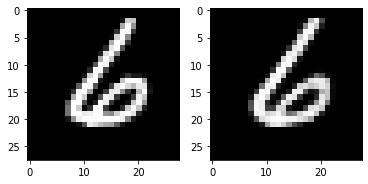

Epoch 573 Loss: 74.05


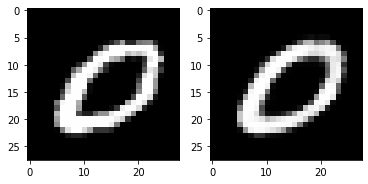

Epoch 574 Loss: 74.00


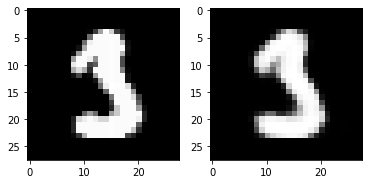

Epoch 575 Loss: 73.97


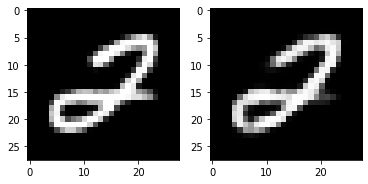

Epoch 576 Loss: 73.95


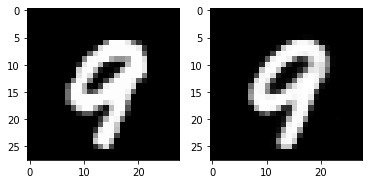

Epoch 577 Loss: 74.00


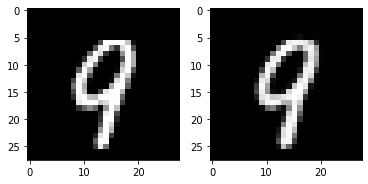

Epoch 578 Loss: 73.97


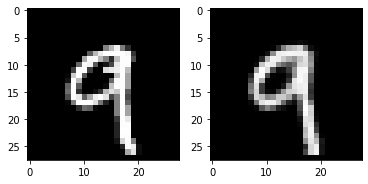

Epoch 579 Loss: 73.97


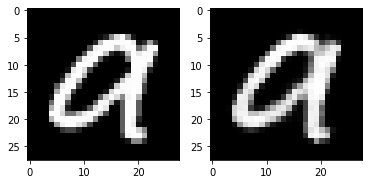

Epoch 580 Loss: 73.95


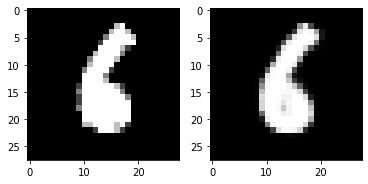

Epoch 581 Loss: 73.99


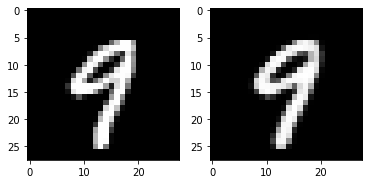

Epoch 582 Loss: 74.02


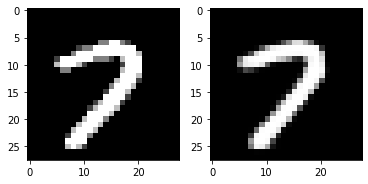

Epoch 583 Loss: 73.97


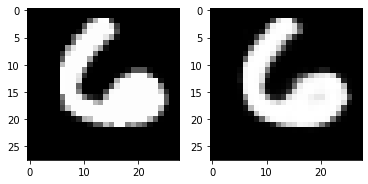

Epoch 584 Loss: 73.94


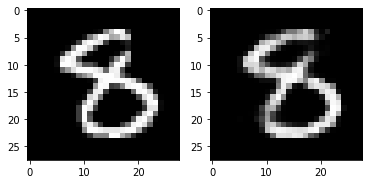

Epoch 585 Loss: 73.95


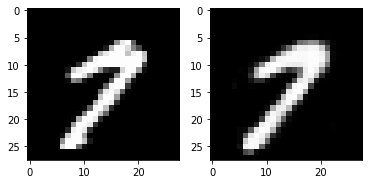

Epoch 586 Loss: 73.97


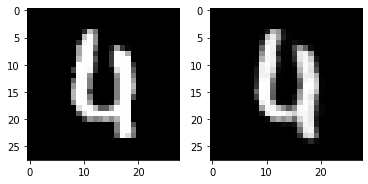

Epoch 587 Loss: 73.93


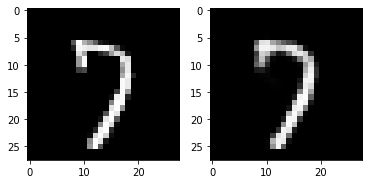

Epoch 588 Loss: 73.96


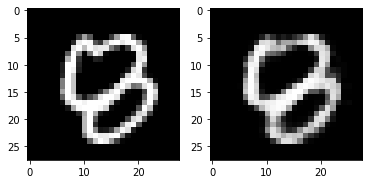

Epoch 589 Loss: 73.96


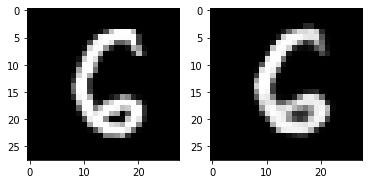

Epoch 590 Loss: 73.96


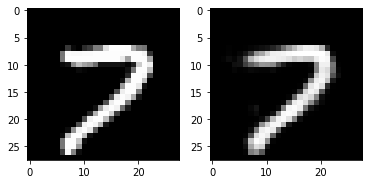

Epoch 591 Loss: 73.93


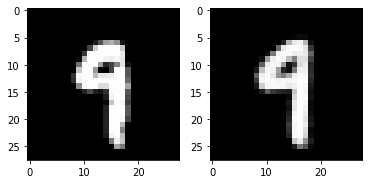

Epoch 592 Loss: 73.95


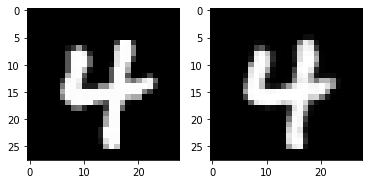

Epoch 593 Loss: 74.05


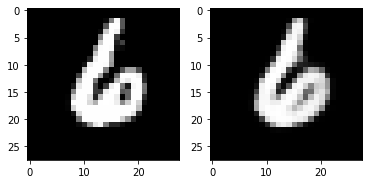

Epoch 594 Loss: 73.95


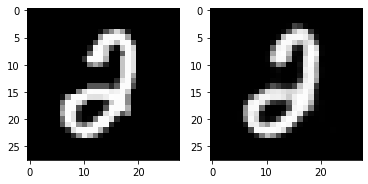

Epoch 595 Loss: 73.93


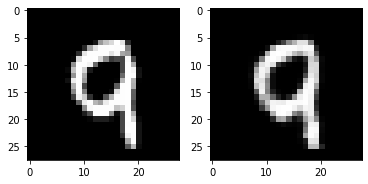

Epoch 596 Loss: 73.94


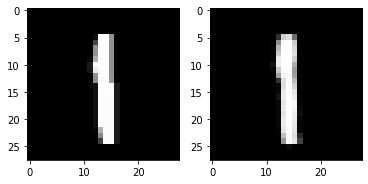

Epoch 597 Loss: 73.93


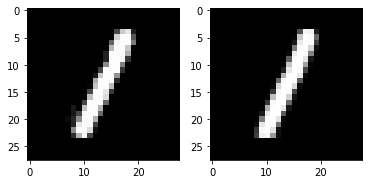

Epoch 598 Loss: 73.94


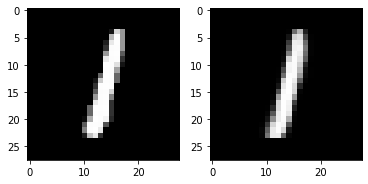

Epoch 599 Loss: 73.90


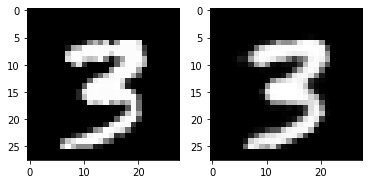

Epoch 600 Loss: 73.94


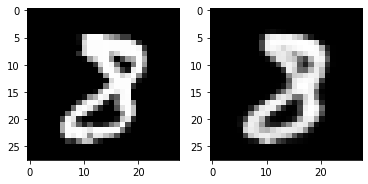

Epoch 601 Loss: 74.08


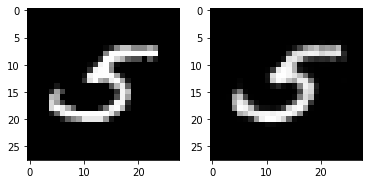

Epoch 602 Loss: 74.00


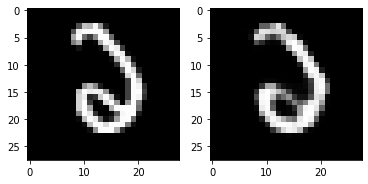

Epoch 603 Loss: 73.92


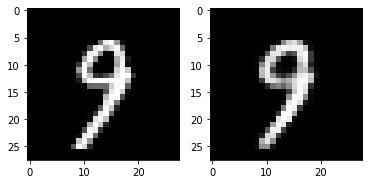

Epoch 604 Loss: 73.89


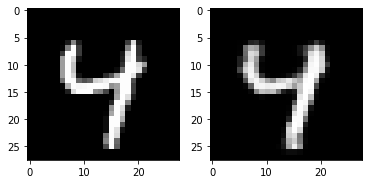

Epoch 605 Loss: 73.98


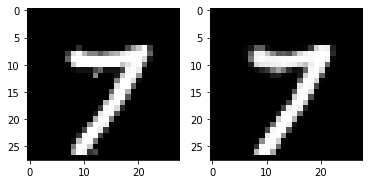

Epoch 606 Loss: 73.94


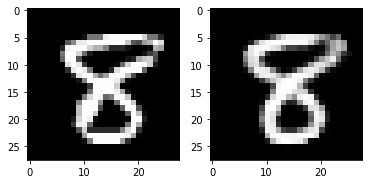

Epoch 607 Loss: 73.96


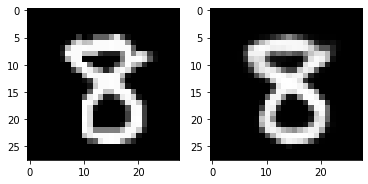

Epoch 608 Loss: 73.86


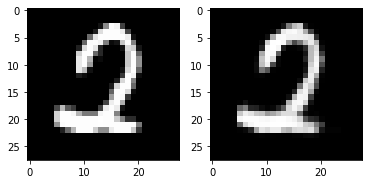

Epoch 609 Loss: 73.91


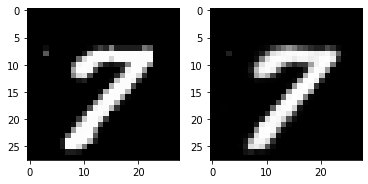

Epoch 610 Loss: 73.89


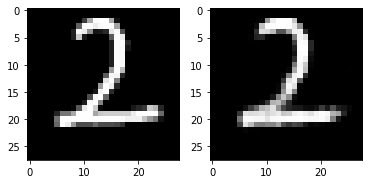

Epoch 611 Loss: 73.92


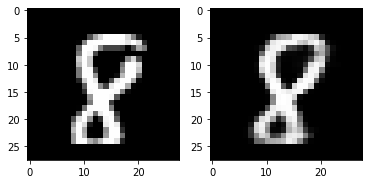

Epoch 612 Loss: 73.89


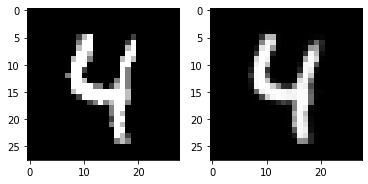

Epoch 613 Loss: 73.89


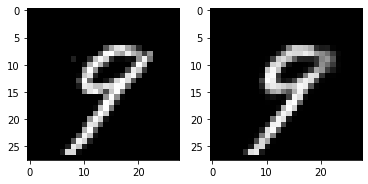

Epoch 614 Loss: 73.84


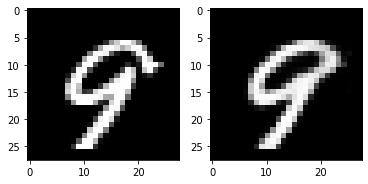

Epoch 615 Loss: 73.95


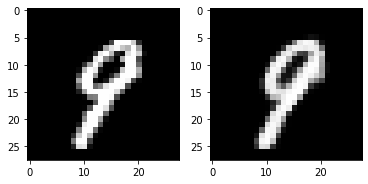

Epoch 616 Loss: 73.84


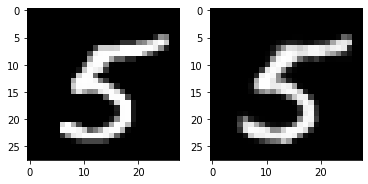

Epoch 617 Loss: 73.94


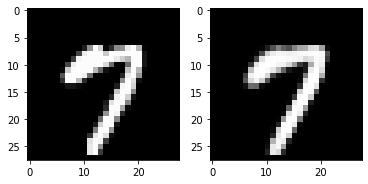

Epoch 618 Loss: 73.87


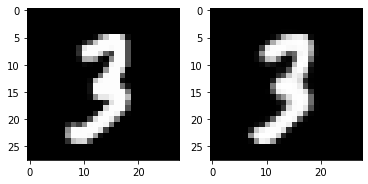

Epoch 619 Loss: 73.86


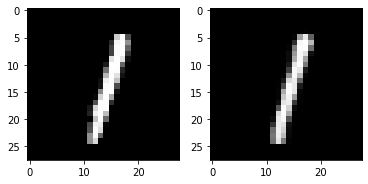

Epoch 620 Loss: 73.95


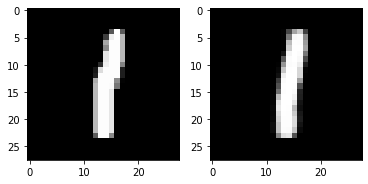

Epoch 621 Loss: 73.89


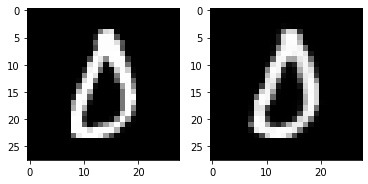

Epoch 622 Loss: 73.83


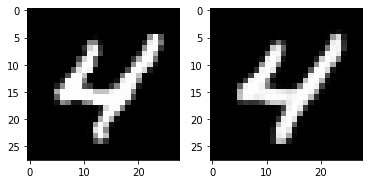

Epoch 623 Loss: 73.83


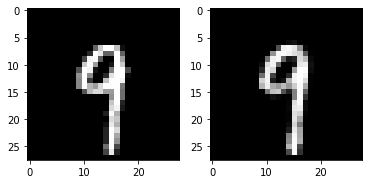

Epoch 624 Loss: 73.74


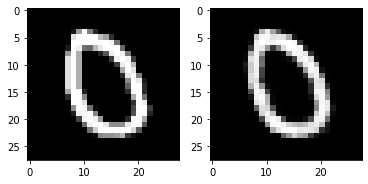

Epoch 625 Loss: 73.83


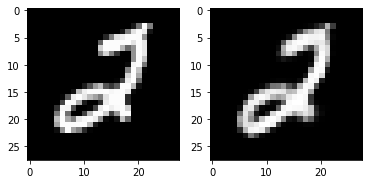

Epoch 626 Loss: 73.82


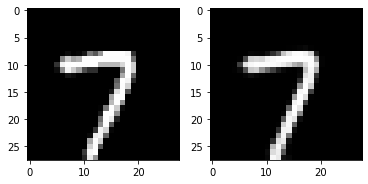

Epoch 627 Loss: 73.87


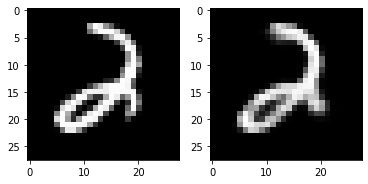

Epoch 628 Loss: 73.87


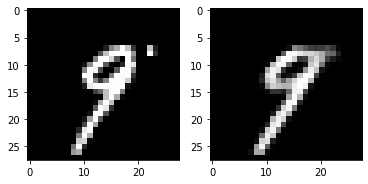

Epoch 629 Loss: 73.86


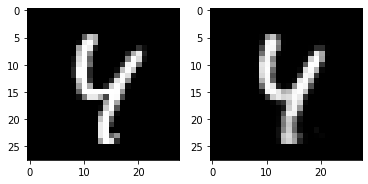

Epoch 630 Loss: 73.84


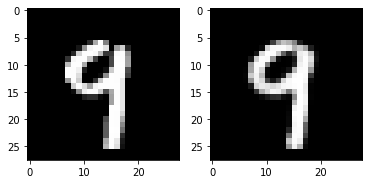

Epoch 631 Loss: 73.84


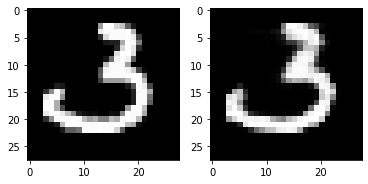

Epoch 632 Loss: 73.80


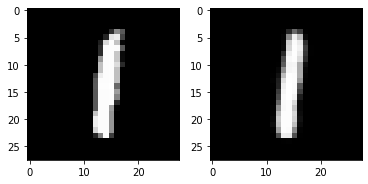

Epoch 633 Loss: 73.87


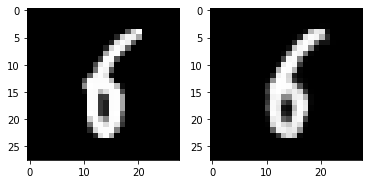

Epoch 634 Loss: 73.83


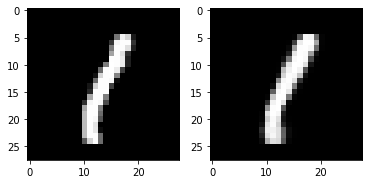

Epoch 635 Loss: 73.85


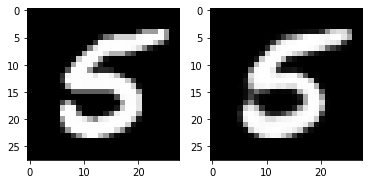

Epoch 636 Loss: 73.86


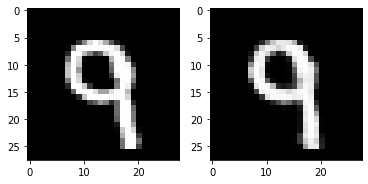

Epoch 637 Loss: 73.79


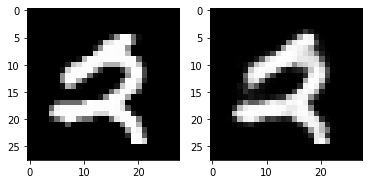

Epoch 638 Loss: 73.82


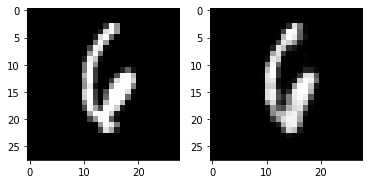

Epoch 639 Loss: 73.81


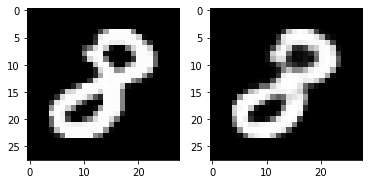

Epoch 640 Loss: 73.84


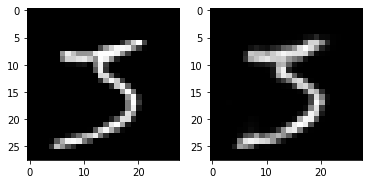

Epoch 641 Loss: 73.79


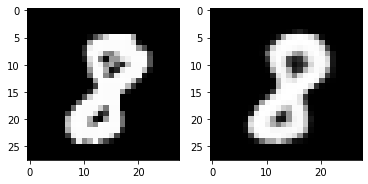

Epoch 642 Loss: 73.78


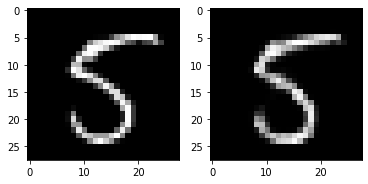

Epoch 643 Loss: 73.82


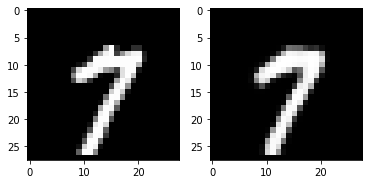

Epoch 644 Loss: 73.74


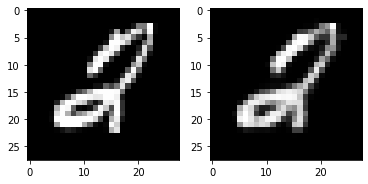

Epoch 645 Loss: 73.78


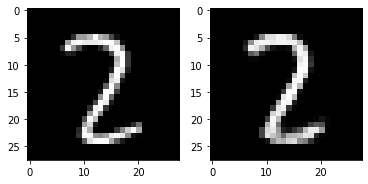

Epoch 646 Loss: 73.84


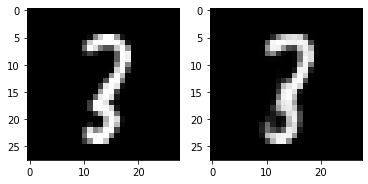

Epoch 647 Loss: 73.81


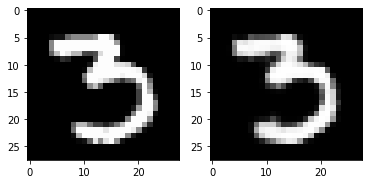

Epoch 648 Loss: 73.81


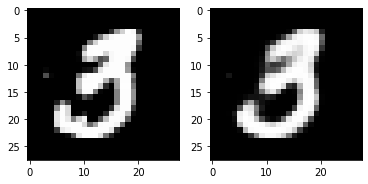

Epoch 649 Loss: 73.84


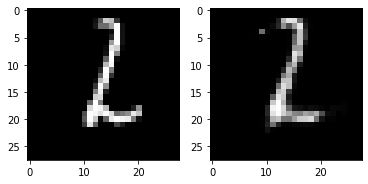

Epoch 650 Loss: 73.80


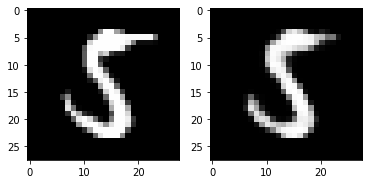

Epoch 651 Loss: 73.76


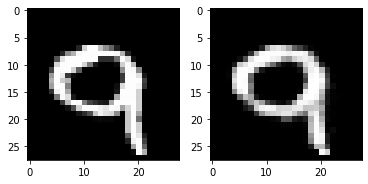

Epoch 652 Loss: 73.77


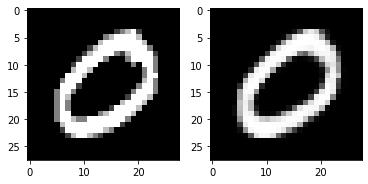

Epoch 653 Loss: 73.79


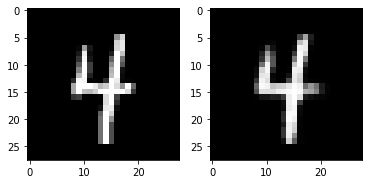

Epoch 654 Loss: 73.75


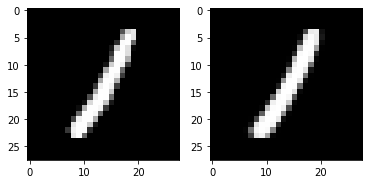

Epoch 655 Loss: 73.73


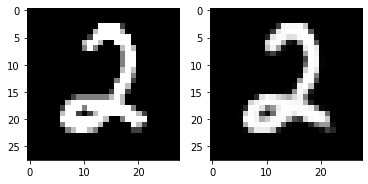

Epoch 656 Loss: 73.81


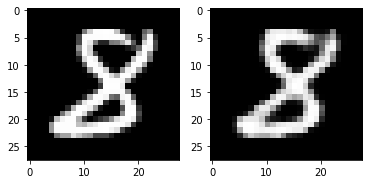

Epoch 657 Loss: 73.84


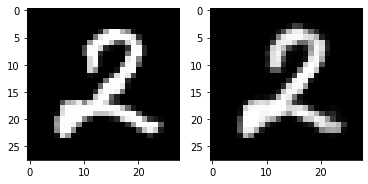

Epoch 658 Loss: 73.78


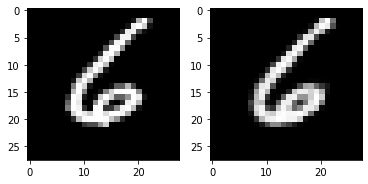

Epoch 659 Loss: 73.80


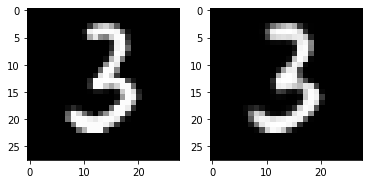

Epoch 660 Loss: 73.81


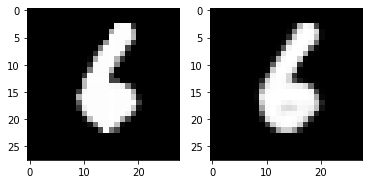

Epoch 661 Loss: 73.80


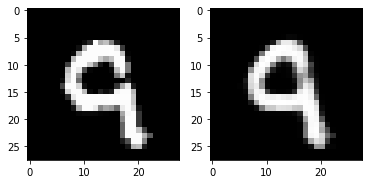

Epoch 662 Loss: 73.77


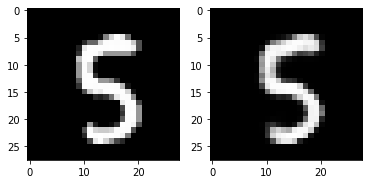

Epoch 663 Loss: 73.76


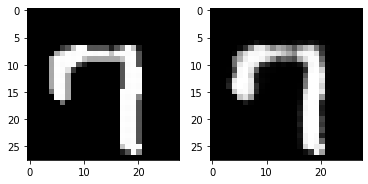

Epoch 664 Loss: 73.80


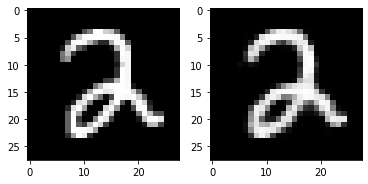

Epoch 665 Loss: 73.74


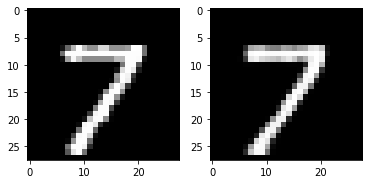

Epoch 666 Loss: 73.75


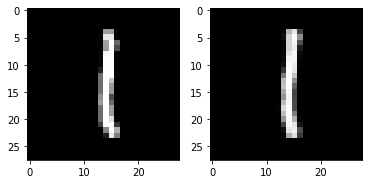

Epoch 667 Loss: 73.75


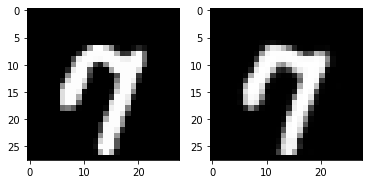

Epoch 668 Loss: 73.77


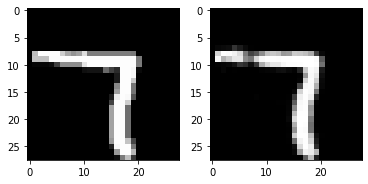

Epoch 669 Loss: 73.80


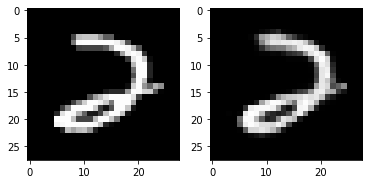

Epoch 670 Loss: 73.78


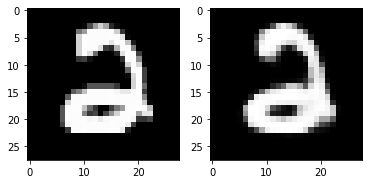

Epoch 671 Loss: 73.79


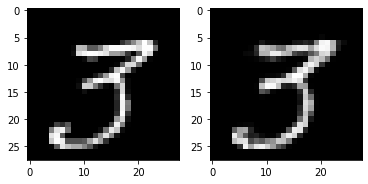

Epoch 672 Loss: 73.79


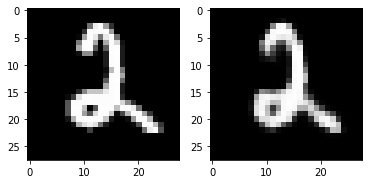

Epoch 673 Loss: 73.80


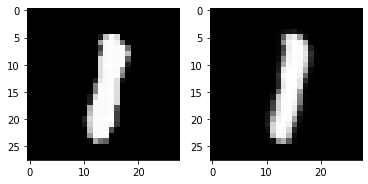

Epoch 674 Loss: 73.79


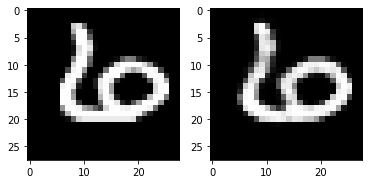

Epoch 675 Loss: 73.78


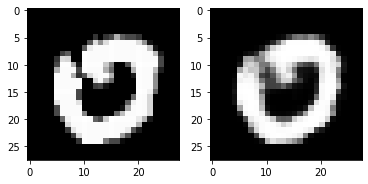

Epoch 676 Loss: 73.72


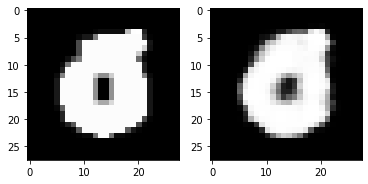

Epoch 677 Loss: 73.71


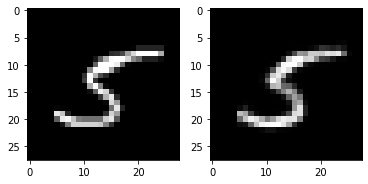

Epoch 678 Loss: 73.71


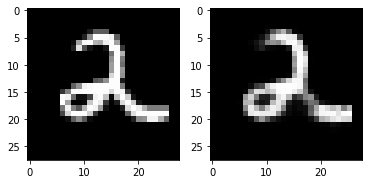

Epoch 679 Loss: 73.74


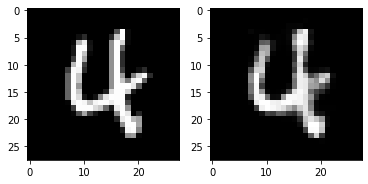

Epoch 680 Loss: 73.74


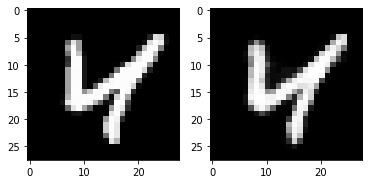

Epoch 681 Loss: 73.70


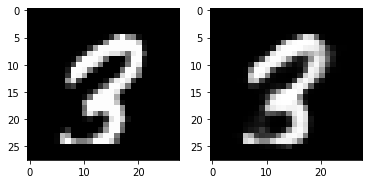

Epoch 682 Loss: 73.75


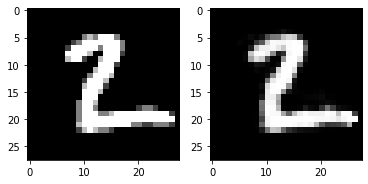

Epoch 683 Loss: 73.79


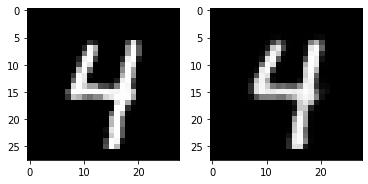

Epoch 684 Loss: 73.74


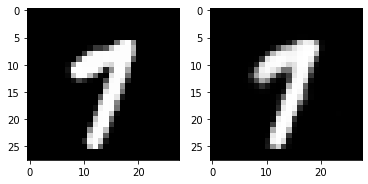

Epoch 685 Loss: 73.70


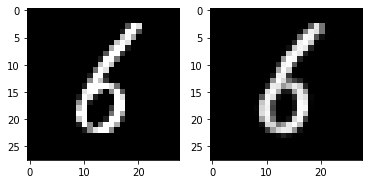

Epoch 686 Loss: 73.73


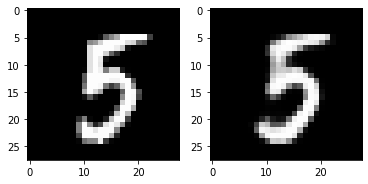

Epoch 687 Loss: 73.76


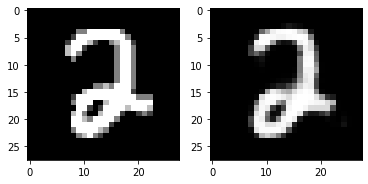

Epoch 688 Loss: 73.73


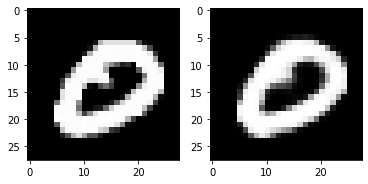

Epoch 689 Loss: 73.72


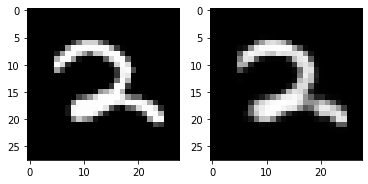

Epoch 690 Loss: 73.77


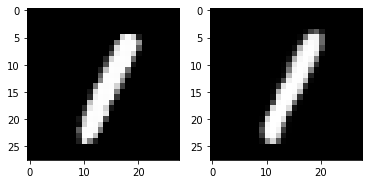

Epoch 691 Loss: 73.75


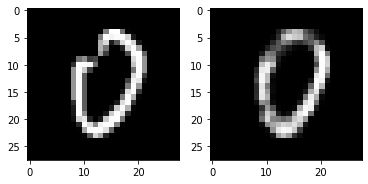

Epoch 692 Loss: 73.75


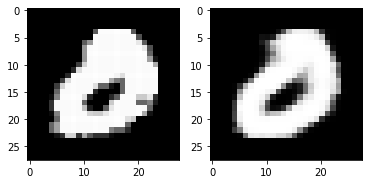

Epoch 693 Loss: 73.71


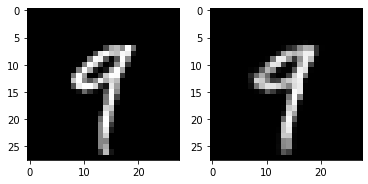

Epoch 694 Loss: 73.70


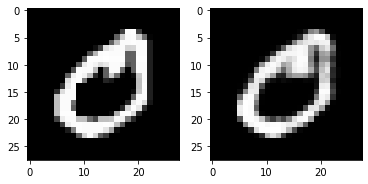

Epoch 695 Loss: 73.75


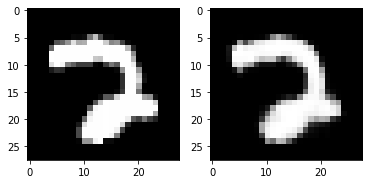

Epoch 696 Loss: 73.72


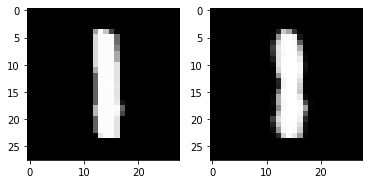

Epoch 697 Loss: 73.70


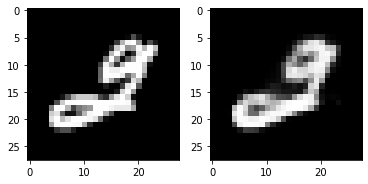

Epoch 698 Loss: 73.73


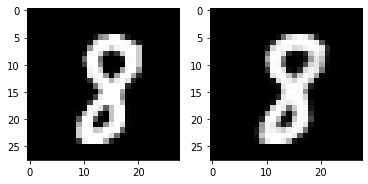

Epoch 699 Loss: 73.70


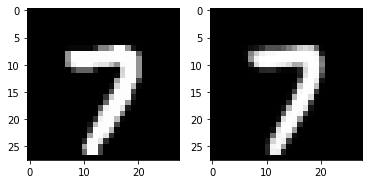

Epoch 700 Loss: 73.75


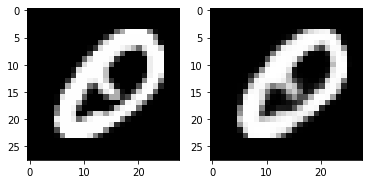

Epoch 701 Loss: 73.74


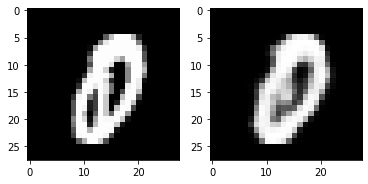

Epoch 702 Loss: 73.65


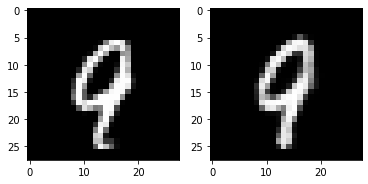

Epoch 703 Loss: 73.70


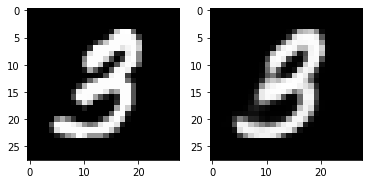

Epoch 704 Loss: 73.66


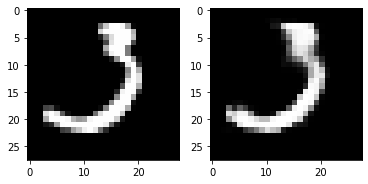

Epoch 705 Loss: 73.71


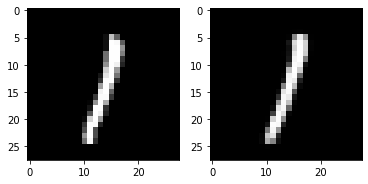

Epoch 706 Loss: 73.66


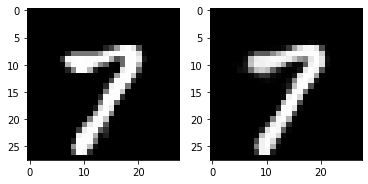

Epoch 707 Loss: 73.77


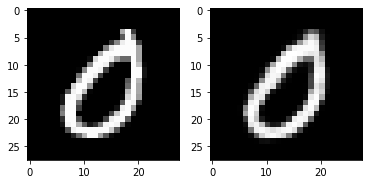

Epoch 708 Loss: 73.69


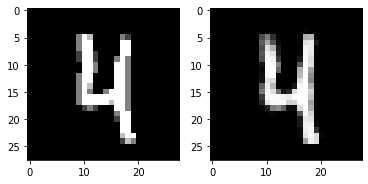

Epoch 709 Loss: 73.68


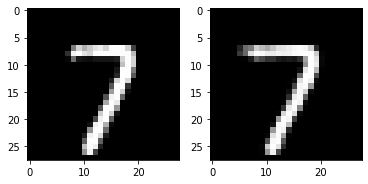

Epoch 710 Loss: 73.72


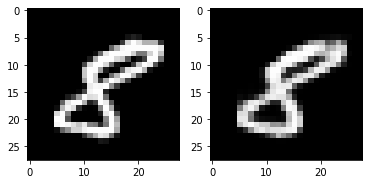

Epoch 711 Loss: 73.65


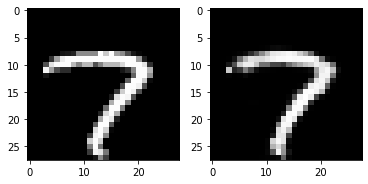

Epoch 712 Loss: 73.64


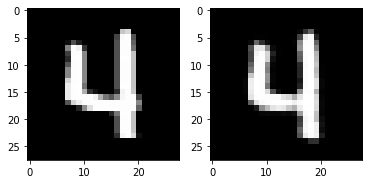

Epoch 713 Loss: 73.73


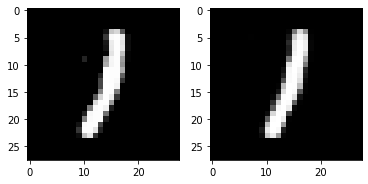

Epoch 714 Loss: 73.62


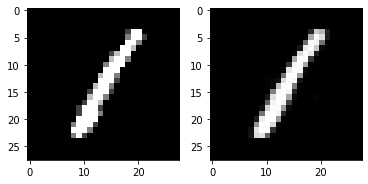

Epoch 715 Loss: 73.66


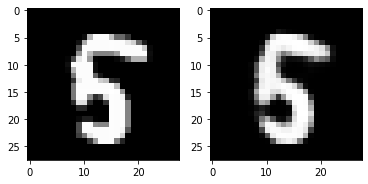

Epoch 716 Loss: 73.64


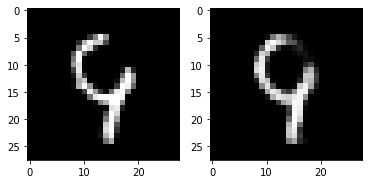

Epoch 717 Loss: 73.67


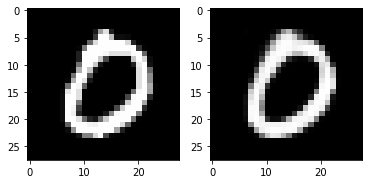

Epoch 718 Loss: 73.56


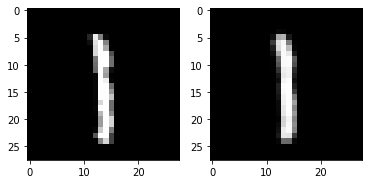

Epoch 719 Loss: 73.69


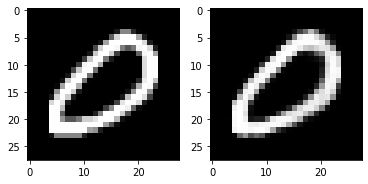

Epoch 720 Loss: 73.67


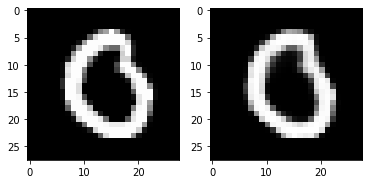

Epoch 721 Loss: 73.67


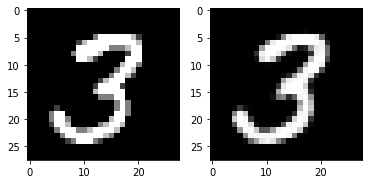

Epoch 722 Loss: 73.67


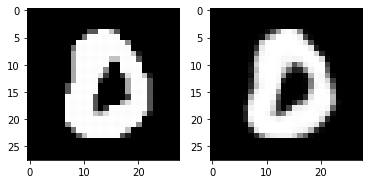

Epoch 723 Loss: 73.56


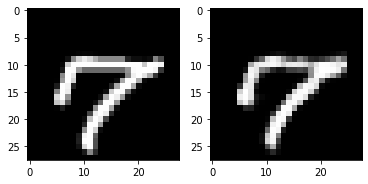

Epoch 724 Loss: 73.62


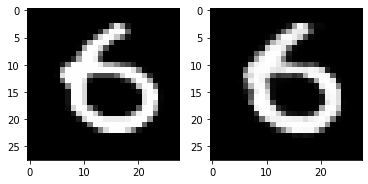

Epoch 725 Loss: 73.64


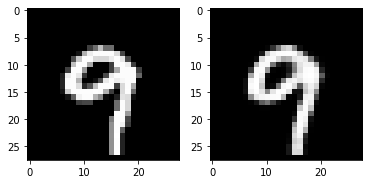

Epoch 726 Loss: 73.69


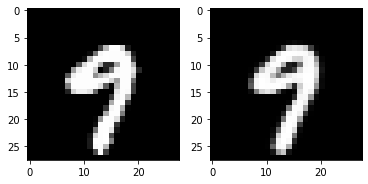

Epoch 727 Loss: 73.62


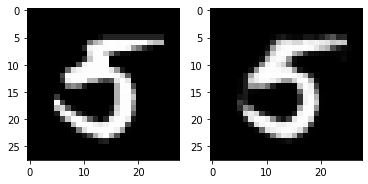

Epoch 728 Loss: 73.60


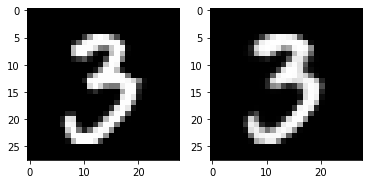

Epoch 729 Loss: 73.69


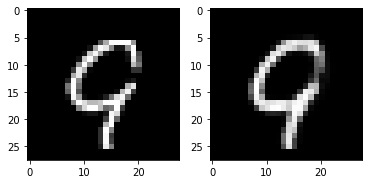

Epoch 730 Loss: 73.68


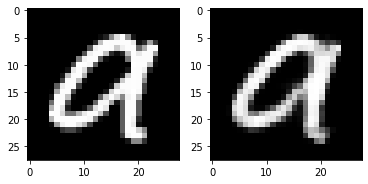

Epoch 731 Loss: 73.62


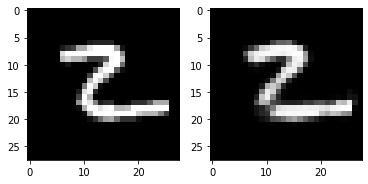

Epoch 732 Loss: 73.63


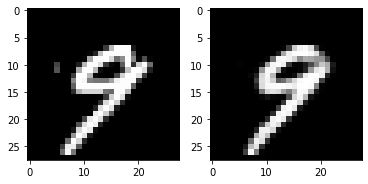

Epoch 733 Loss: 73.63


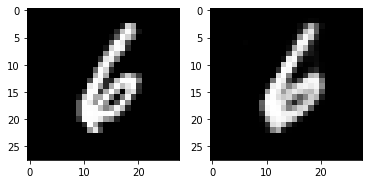

Epoch 734 Loss: 73.66


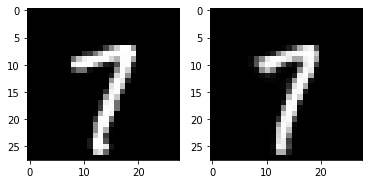

Epoch 735 Loss: 73.61


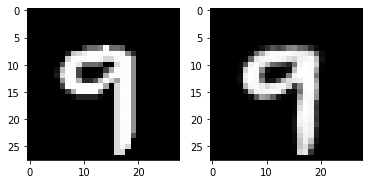

Epoch 736 Loss: 73.62


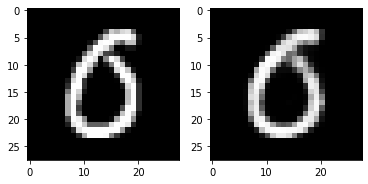

Epoch 737 Loss: 73.64


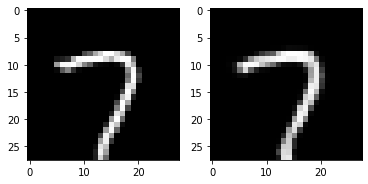

Epoch 738 Loss: 73.59


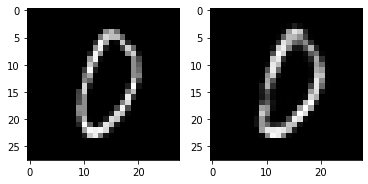

Epoch 739 Loss: 73.68


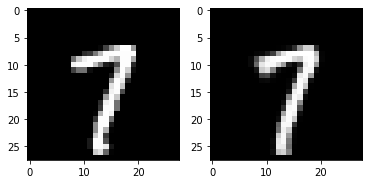

Epoch 740 Loss: 73.64


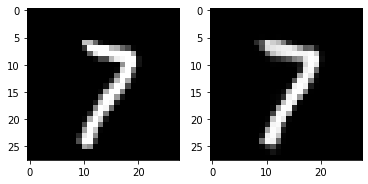

Epoch 741 Loss: 73.64


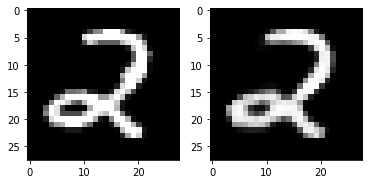

Epoch 742 Loss: 73.63


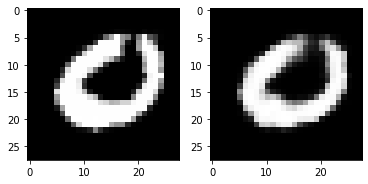

Epoch 743 Loss: 73.70


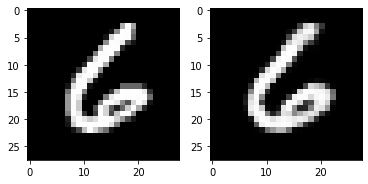

Epoch 744 Loss: 73.60


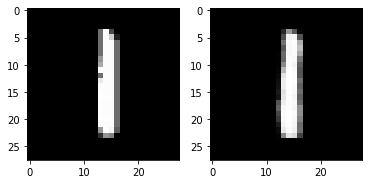

Epoch 745 Loss: 73.58


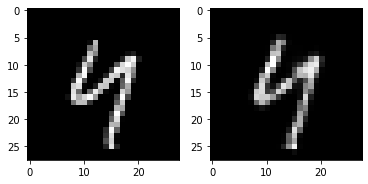

Epoch 746 Loss: 73.61


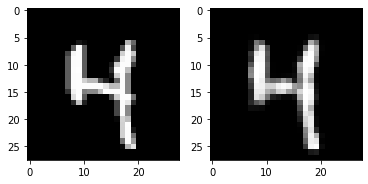

Epoch 747 Loss: 73.58


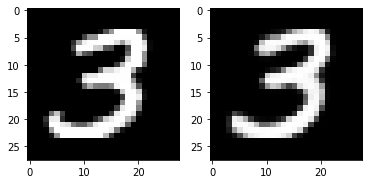

Epoch 748 Loss: 73.61


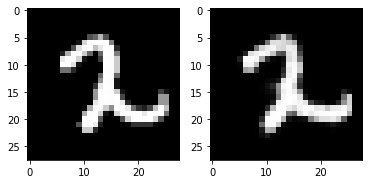

Epoch 749 Loss: 73.60


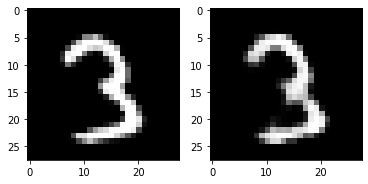

Epoch 750 Loss: 73.58


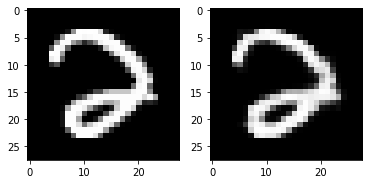

Epoch 751 Loss: 73.63


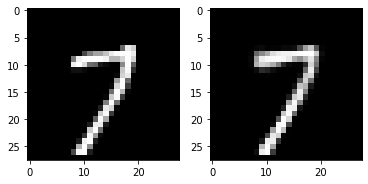

Epoch 752 Loss: 73.67


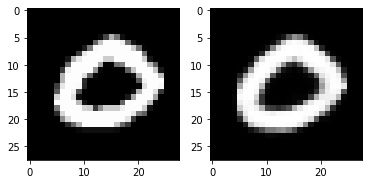

Epoch 753 Loss: 73.60


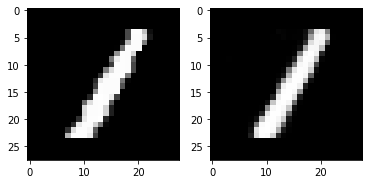

Epoch 754 Loss: 73.51


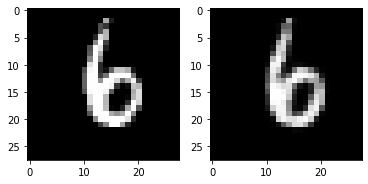

Epoch 755 Loss: 73.63


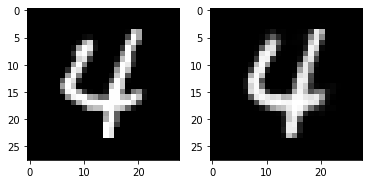

Epoch 756 Loss: 73.58


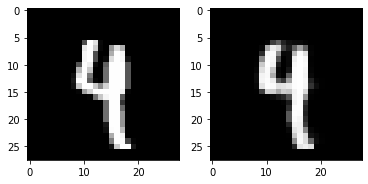

Epoch 757 Loss: 73.59


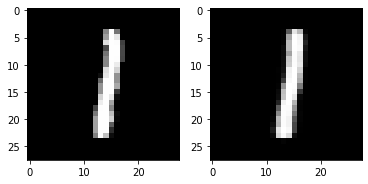

Epoch 758 Loss: 73.58


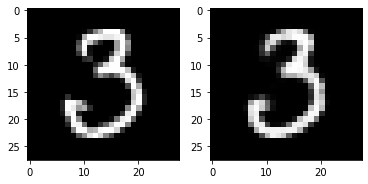

Epoch 759 Loss: 73.64


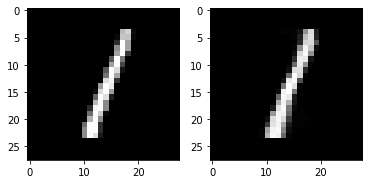

Epoch 760 Loss: 73.62


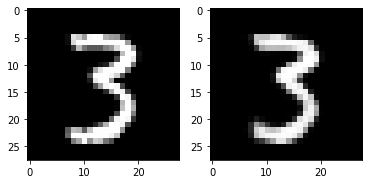

Epoch 761 Loss: 73.54


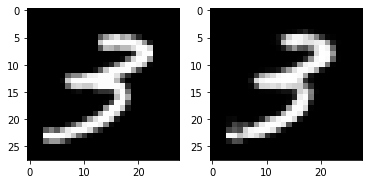

Epoch 762 Loss: 73.61


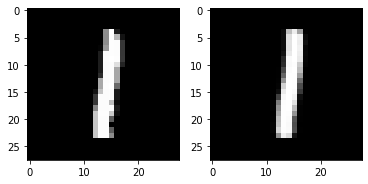

Epoch 763 Loss: 73.62


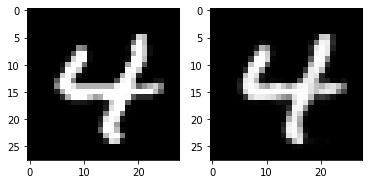

Epoch 764 Loss: 73.57


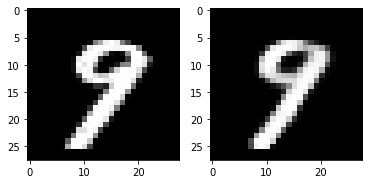

Epoch 765 Loss: 73.62


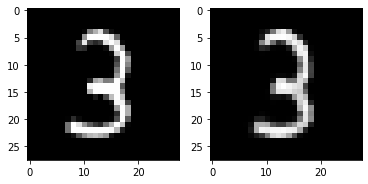

Epoch 766 Loss: 73.62


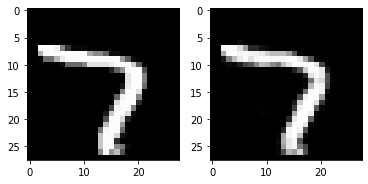

Epoch 767 Loss: 73.53


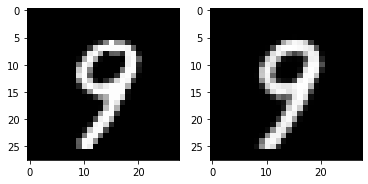

Epoch 768 Loss: 73.55


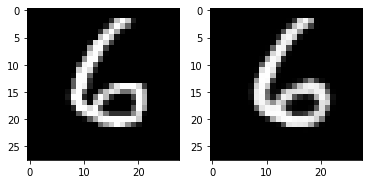

Epoch 769 Loss: 73.55


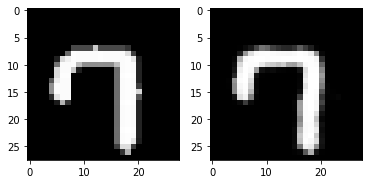

Epoch 770 Loss: 73.57


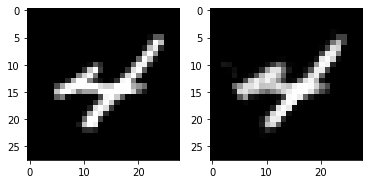

Epoch 771 Loss: 73.57


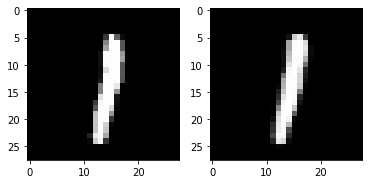

Epoch 772 Loss: 73.56


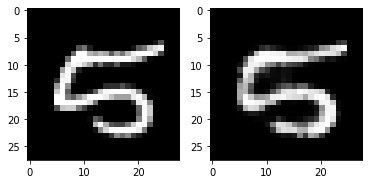

Epoch 773 Loss: 73.58


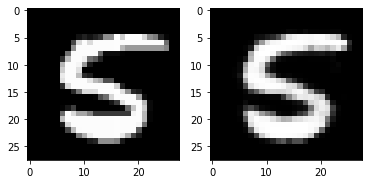

Epoch 774 Loss: 73.55


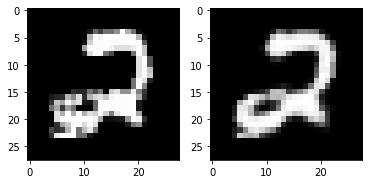

Epoch 775 Loss: 73.57


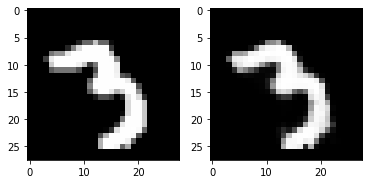

Epoch 776 Loss: 73.50


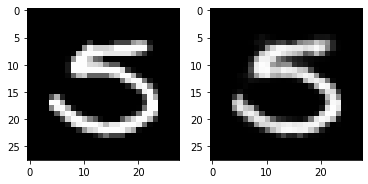

Epoch 777 Loss: 73.55


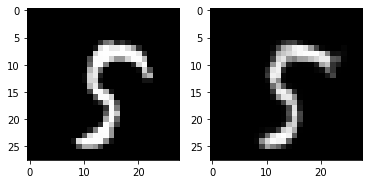

Epoch 778 Loss: 73.60


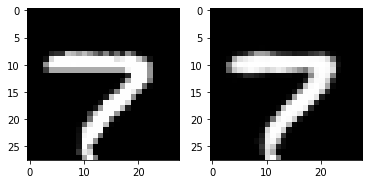

Epoch 779 Loss: 73.50


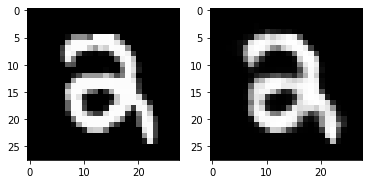

Epoch 780 Loss: 73.57


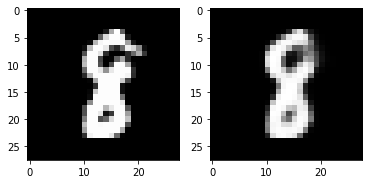

Epoch 781 Loss: 73.53


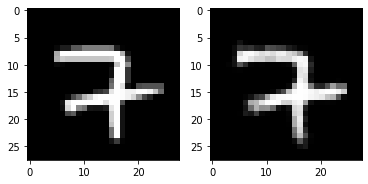

Epoch 782 Loss: 73.52


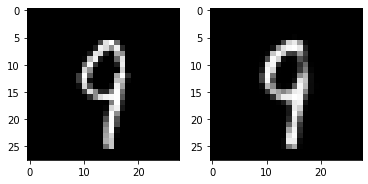

Epoch 783 Loss: 73.55


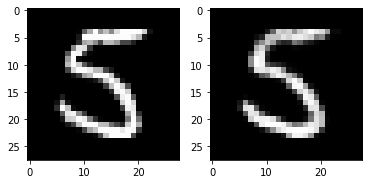

Epoch 784 Loss: 73.58


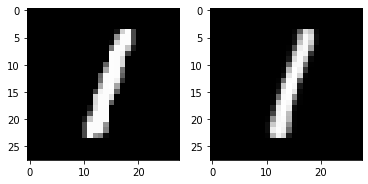

Epoch 785 Loss: 73.66


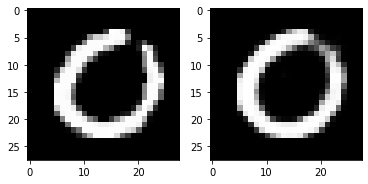

Epoch 786 Loss: 73.54


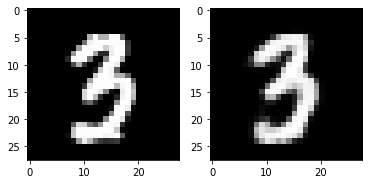

Epoch 787 Loss: 73.59


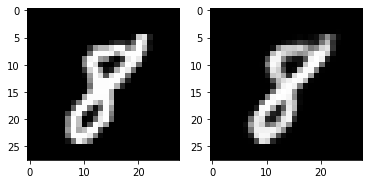

Epoch 788 Loss: 73.55


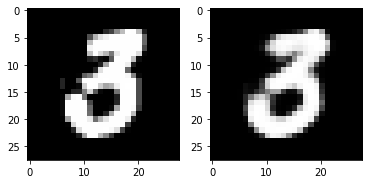

Epoch 789 Loss: 73.53


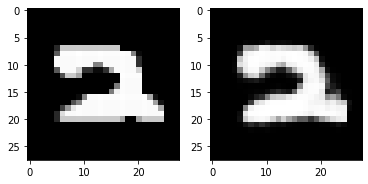

Epoch 790 Loss: 73.53


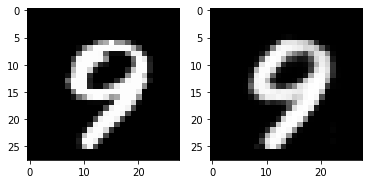

Epoch 791 Loss: 73.60


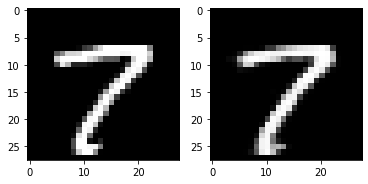

Epoch 792 Loss: 73.56


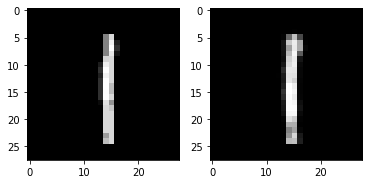

Epoch 793 Loss: 73.58


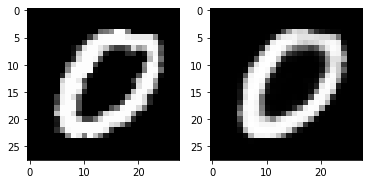

Epoch 794 Loss: 73.47


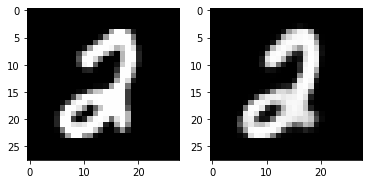

Epoch 795 Loss: 73.48


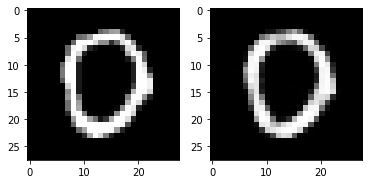

Epoch 796 Loss: 73.51


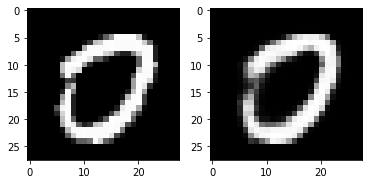

Epoch 797 Loss: 73.47


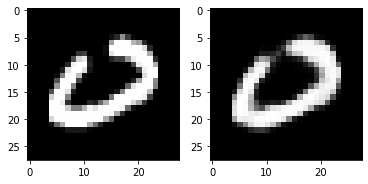

Epoch 798 Loss: 73.47


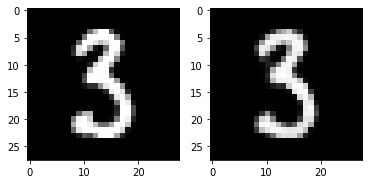

Epoch 799 Loss: 73.58


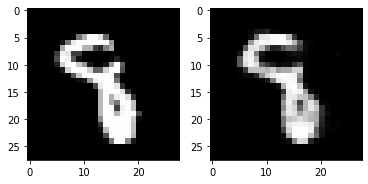

Epoch 800 Loss: 73.49


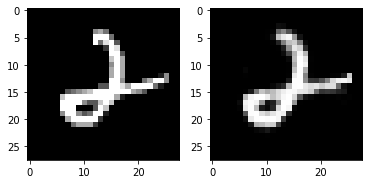

Epoch 801 Loss: 73.52


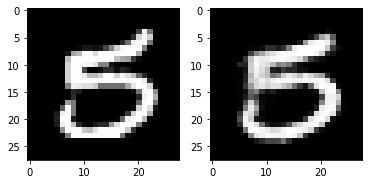

Epoch 802 Loss: 73.52


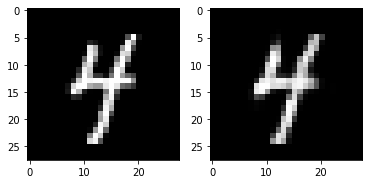

Epoch 803 Loss: 73.52


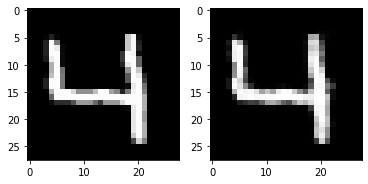

Epoch 804 Loss: 73.57


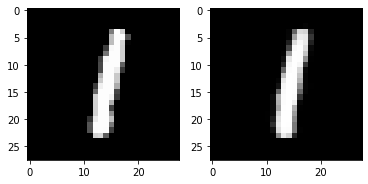

Epoch 805 Loss: 73.45


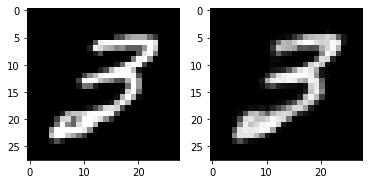

Epoch 806 Loss: 73.46


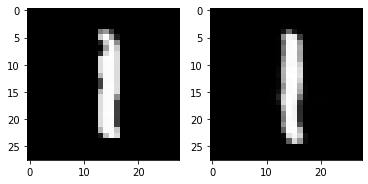

Epoch 807 Loss: 73.50


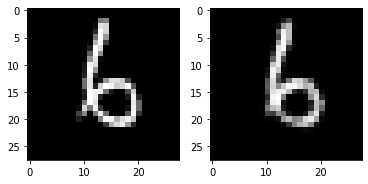

Epoch 808 Loss: 73.50


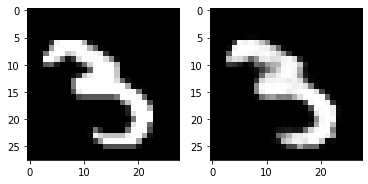

Epoch 809 Loss: 73.52


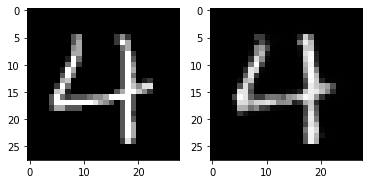

Epoch 810 Loss: 73.44


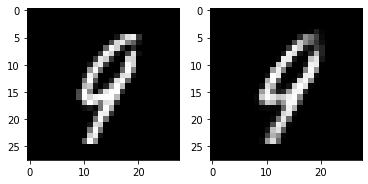

Epoch 811 Loss: 73.43


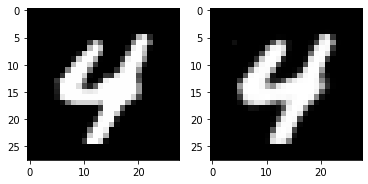

Epoch 812 Loss: 73.46


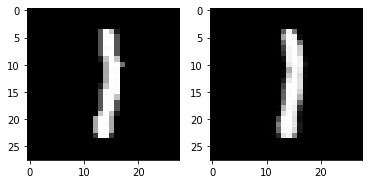

Epoch 813 Loss: 73.45


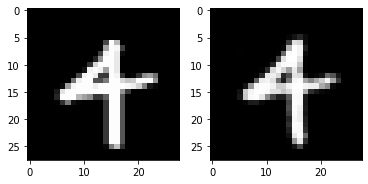

Epoch 814 Loss: 73.48


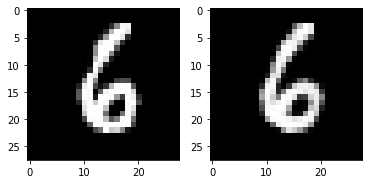

Epoch 815 Loss: 73.45


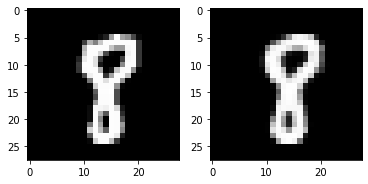

Epoch 816 Loss: 73.48


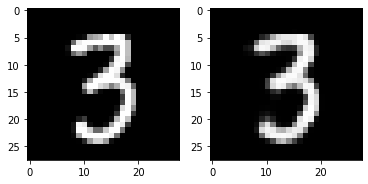

Epoch 817 Loss: 73.50


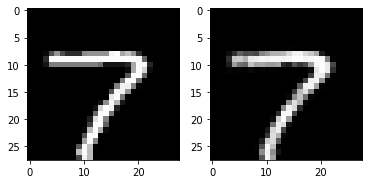

Epoch 818 Loss: 73.45


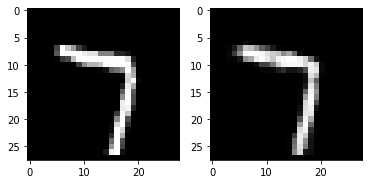

Epoch 819 Loss: 73.45


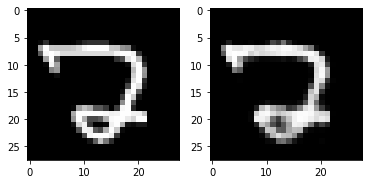

Epoch 820 Loss: 73.44


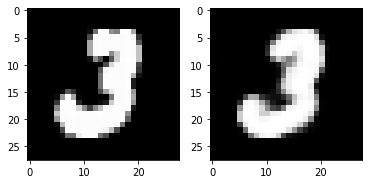

Epoch 821 Loss: 73.51


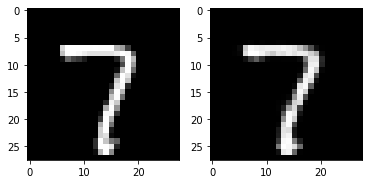

Epoch 822 Loss: 73.55


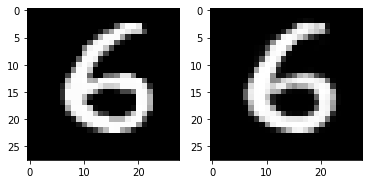

Epoch 823 Loss: 73.47


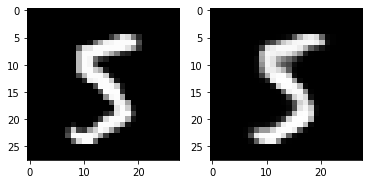

Epoch 824 Loss: 73.52


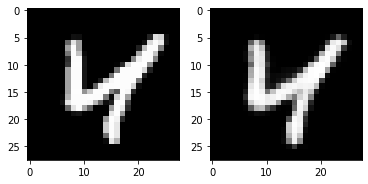

Epoch 825 Loss: 73.49


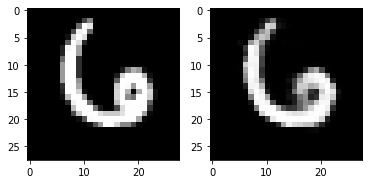

Epoch 826 Loss: 73.55


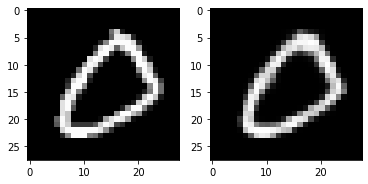

Epoch 827 Loss: 73.48


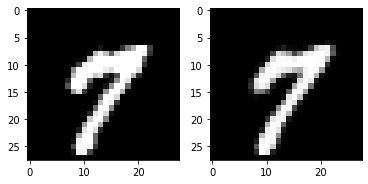

Epoch 828 Loss: 73.44


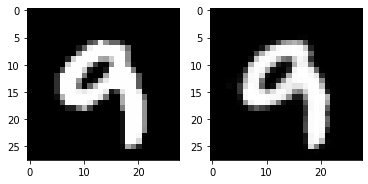

Epoch 829 Loss: 73.48


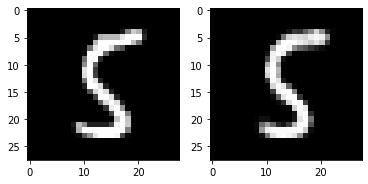

Epoch 830 Loss: 73.44


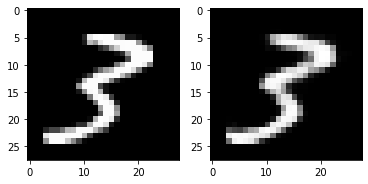

Epoch 831 Loss: 73.52


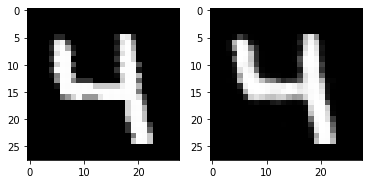

Epoch 832 Loss: 73.50


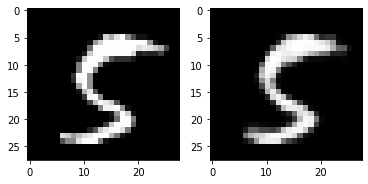

Epoch 833 Loss: 73.50


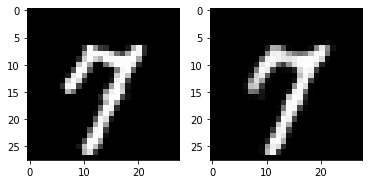

Epoch 834 Loss: 73.48


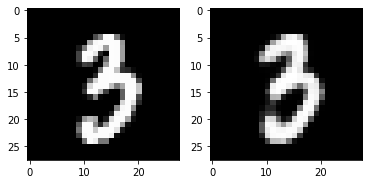

Epoch 835 Loss: 73.52


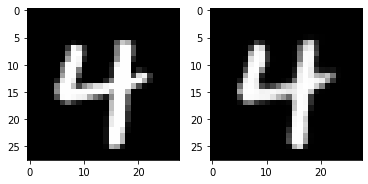

Epoch 836 Loss: 73.44


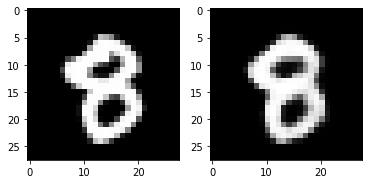

Epoch 837 Loss: 73.46


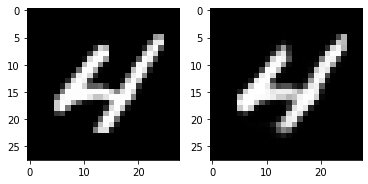

Epoch 838 Loss: 73.43


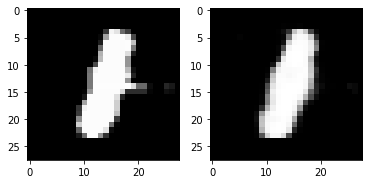

Epoch 839 Loss: 73.52


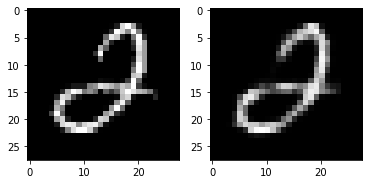

Epoch 840 Loss: 73.42


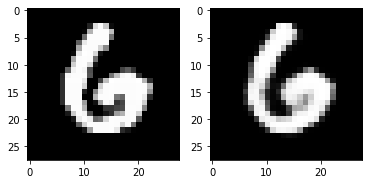

Epoch 841 Loss: 73.52


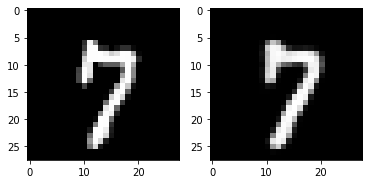

Epoch 842 Loss: 73.48


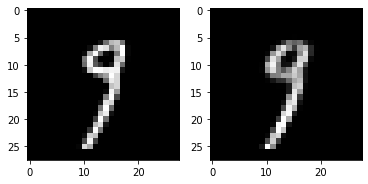

Epoch 843 Loss: 73.41


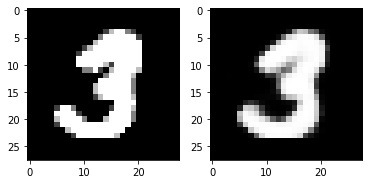

Epoch 844 Loss: 73.49


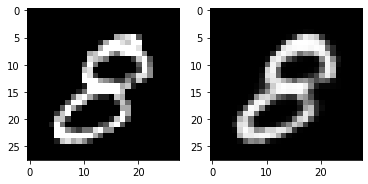

Epoch 845 Loss: 73.46


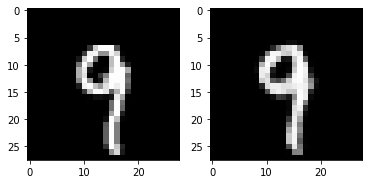

Epoch 846 Loss: 73.44


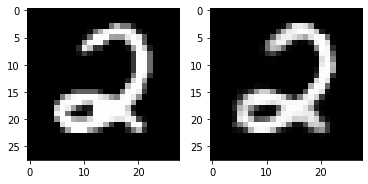

Epoch 847 Loss: 73.39


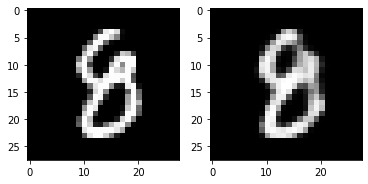

Epoch 848 Loss: 73.41


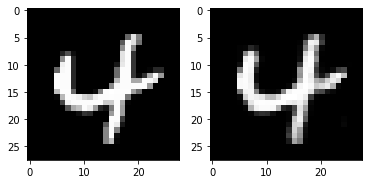

Epoch 849 Loss: 73.37


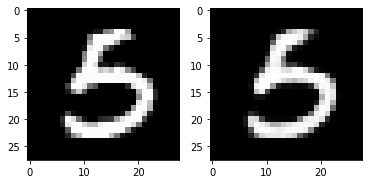

Epoch 850 Loss: 73.44


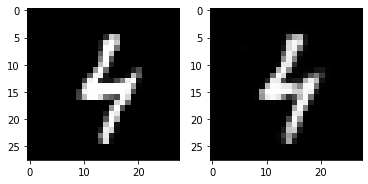

Epoch 851 Loss: 73.43


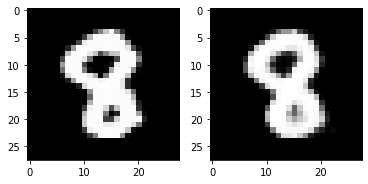

Epoch 852 Loss: 73.42


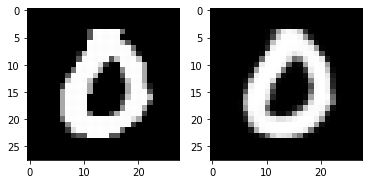

Epoch 853 Loss: 73.49


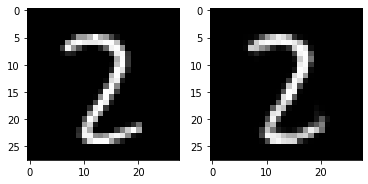

Epoch 854 Loss: 73.57


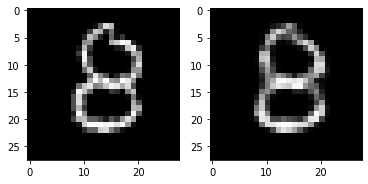

Epoch 855 Loss: 73.43


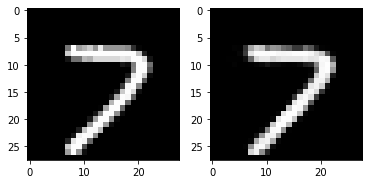

Epoch 856 Loss: 73.41


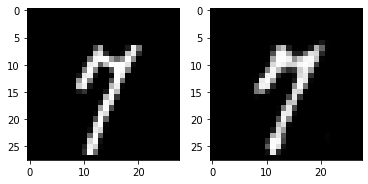

Epoch 857 Loss: 73.39


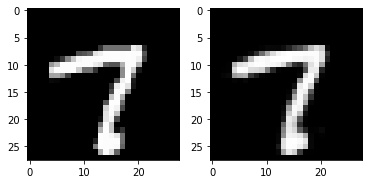

Epoch 858 Loss: 73.44


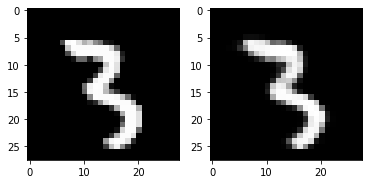

Epoch 859 Loss: 73.42


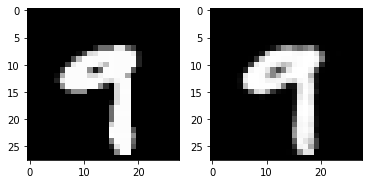

Epoch 860 Loss: 73.38


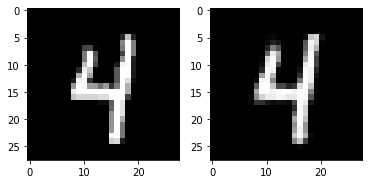

Epoch 861 Loss: 73.43


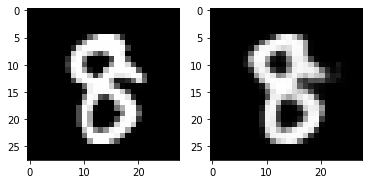

Epoch 862 Loss: 73.47


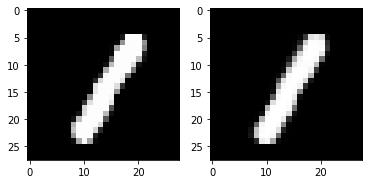

Epoch 863 Loss: 73.36


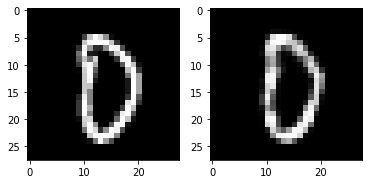

Epoch 864 Loss: 73.47


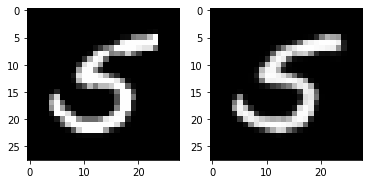

Epoch 865 Loss: 73.39


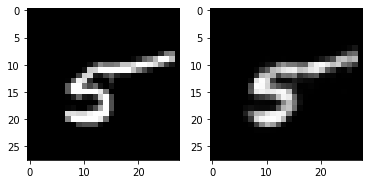

Epoch 866 Loss: 73.44


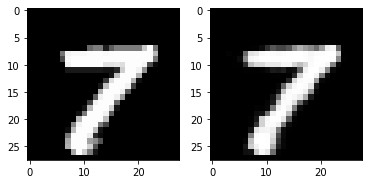

Epoch 867 Loss: 73.40


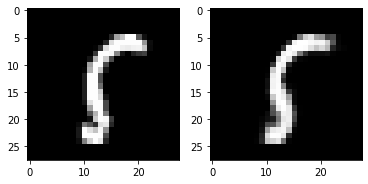

Epoch 868 Loss: 73.45


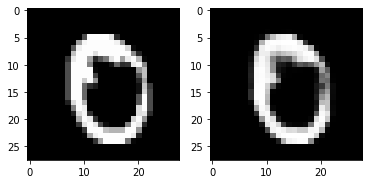

Epoch 869 Loss: 73.43


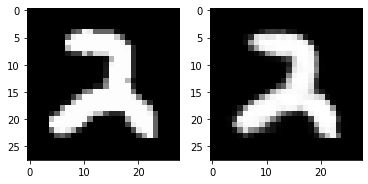

Epoch 870 Loss: 73.45


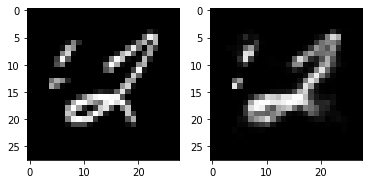

Epoch 871 Loss: 73.44


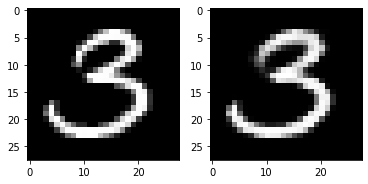

Epoch 872 Loss: 73.41


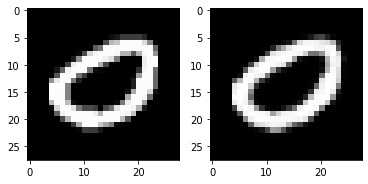

Epoch 873 Loss: 73.43


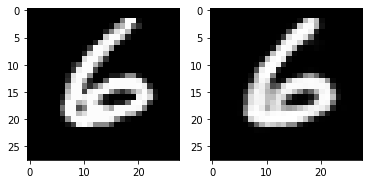

Epoch 874 Loss: 73.41


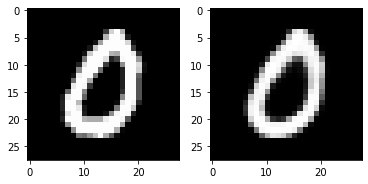

Epoch 875 Loss: 73.42


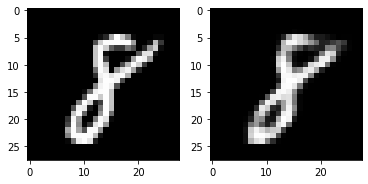

Epoch 876 Loss: 73.47


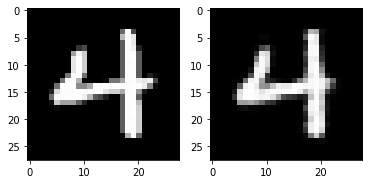

Epoch 877 Loss: 73.48


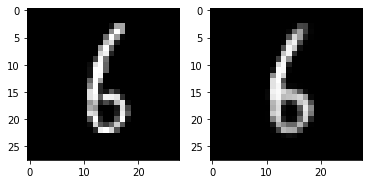

Epoch 878 Loss: 73.39


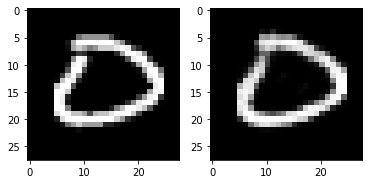

Epoch 879 Loss: 73.38


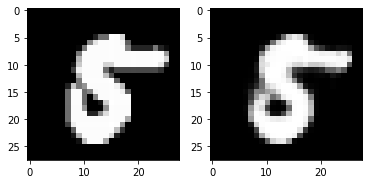

Epoch 880 Loss: 73.37


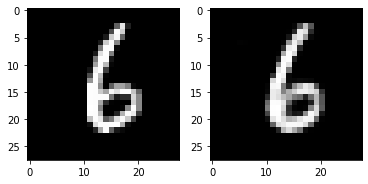

Epoch 881 Loss: 73.49


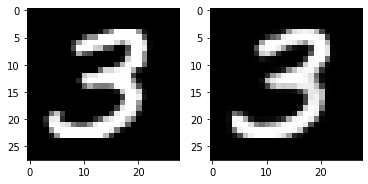

Epoch 882 Loss: 73.37


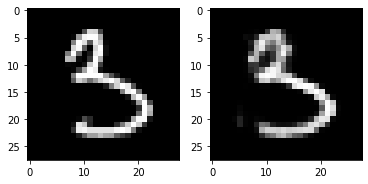

Epoch 883 Loss: 73.38


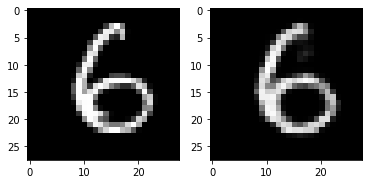

Epoch 884 Loss: 73.37


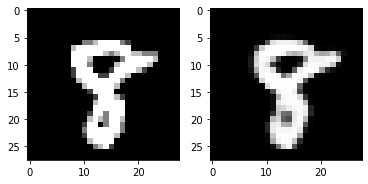

Epoch 885 Loss: 73.45


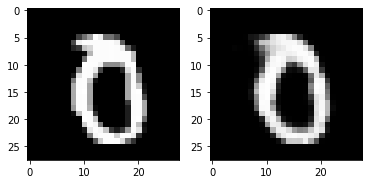

Epoch 886 Loss: 73.40


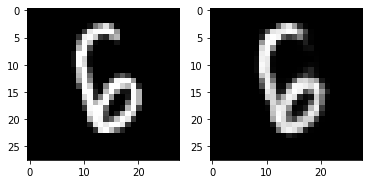

Epoch 887 Loss: 73.35


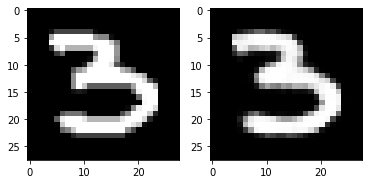

Epoch 888 Loss: 73.36


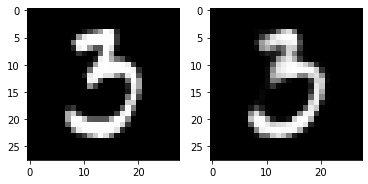

Epoch 889 Loss: 73.41


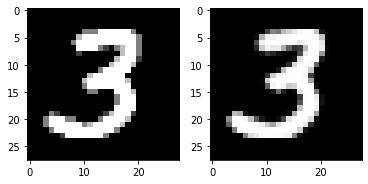

Epoch 890 Loss: 73.40


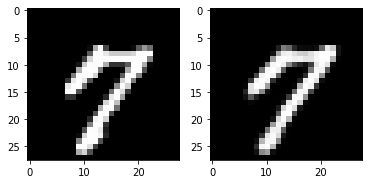

Epoch 891 Loss: 73.48


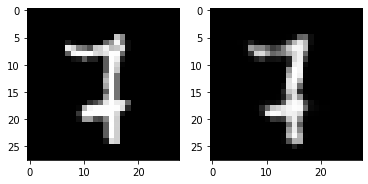

Epoch 892 Loss: 73.41


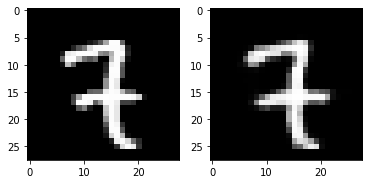

Epoch 893 Loss: 73.34


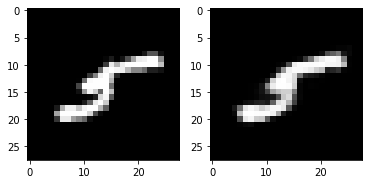

Epoch 894 Loss: 73.34


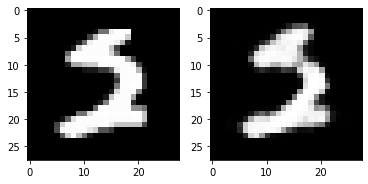

Epoch 895 Loss: 73.40


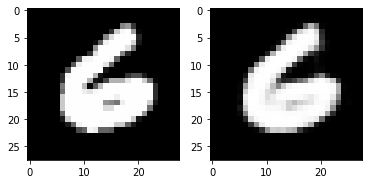

Epoch 896 Loss: 73.39


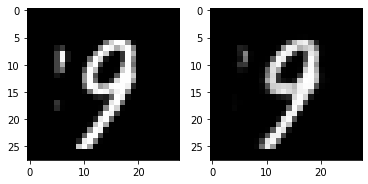

Epoch 897 Loss: 73.35


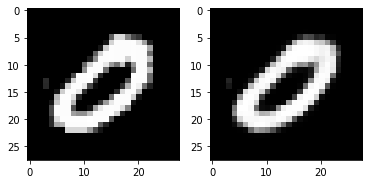

Epoch 898 Loss: 73.41


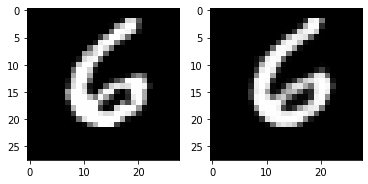

Epoch 899 Loss: 73.40


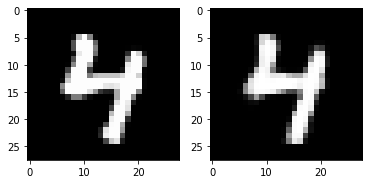

Epoch 900 Loss: 73.30


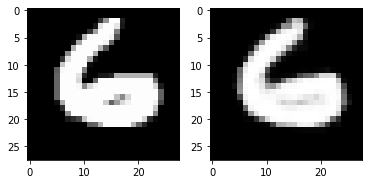

Epoch 901 Loss: 73.42


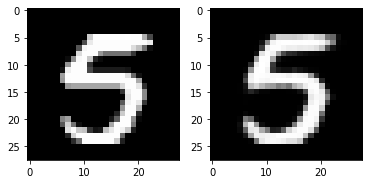

Epoch 902 Loss: 73.50


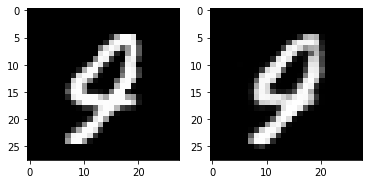

Epoch 903 Loss: 73.30


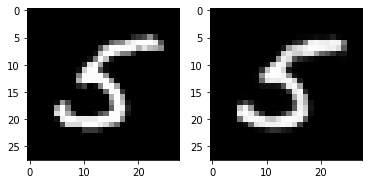

Epoch 904 Loss: 73.33


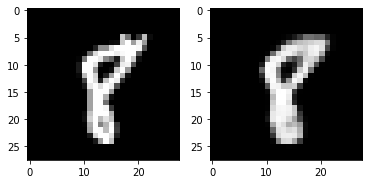

Epoch 905 Loss: 73.30


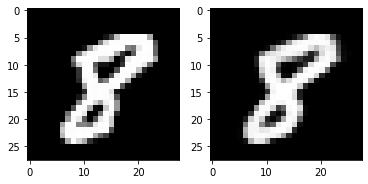

Epoch 906 Loss: 73.40


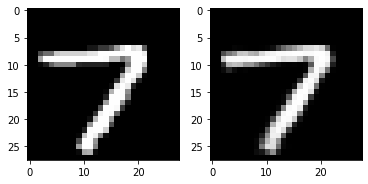

Epoch 907 Loss: 73.38


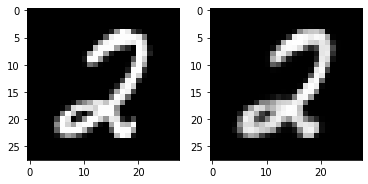

Epoch 908 Loss: 73.39


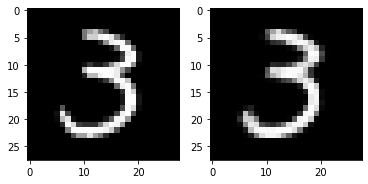

Epoch 909 Loss: 73.32


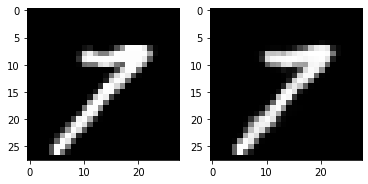

Epoch 910 Loss: 73.37


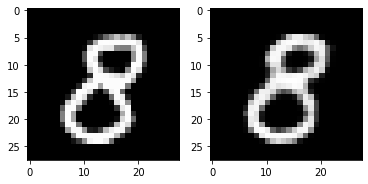

Epoch 911 Loss: 73.36


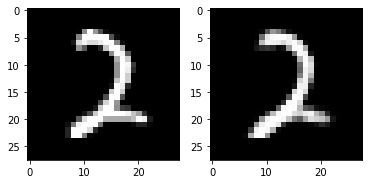

Epoch 912 Loss: 73.42


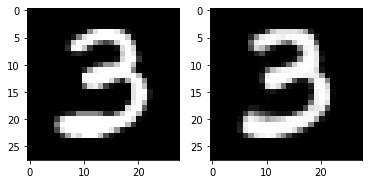

Epoch 913 Loss: 73.40


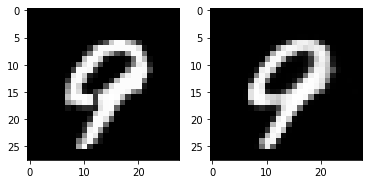

Epoch 914 Loss: 73.43


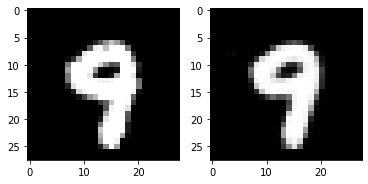

Epoch 915 Loss: 73.31


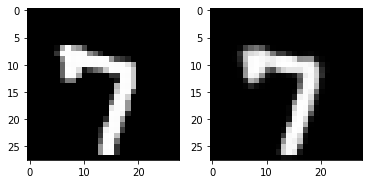

Epoch 916 Loss: 73.28


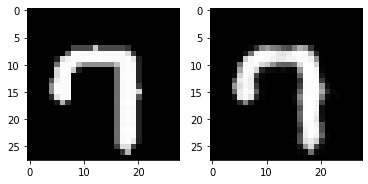

Epoch 917 Loss: 73.30


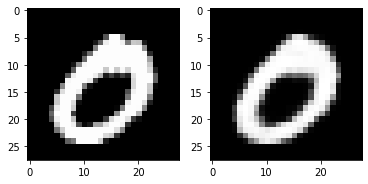

Epoch 918 Loss: 73.36


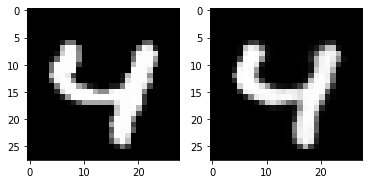

Epoch 919 Loss: 73.33


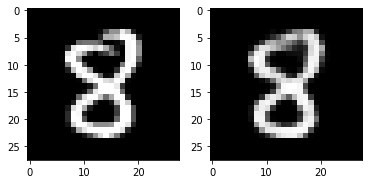

Epoch 920 Loss: 73.31


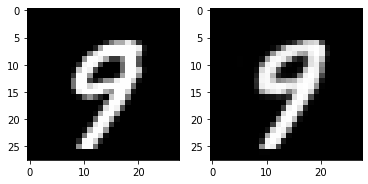

Epoch 921 Loss: 73.38


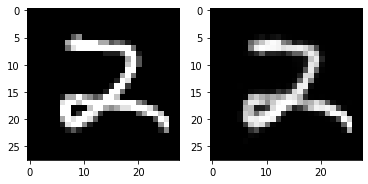

Epoch 922 Loss: 73.37


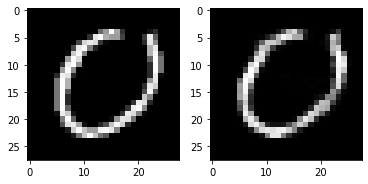

Epoch 923 Loss: 73.32


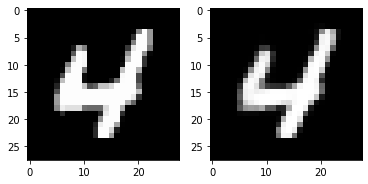

Epoch 924 Loss: 73.35


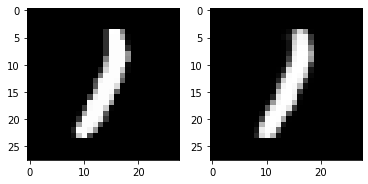

Epoch 925 Loss: 73.34


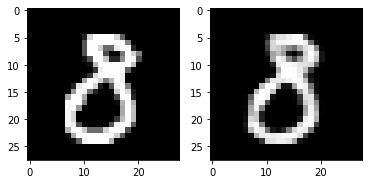

Epoch 926 Loss: 73.30


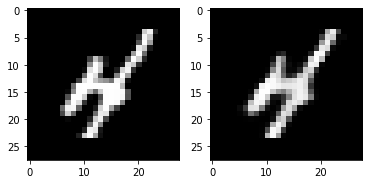

Epoch 927 Loss: 73.36


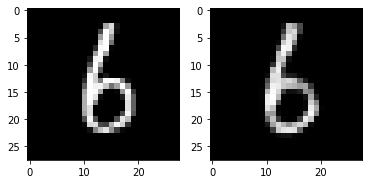

Epoch 928 Loss: 73.35


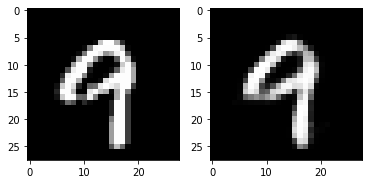

Epoch 929 Loss: 73.34


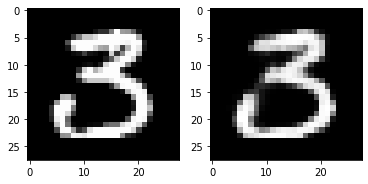

Epoch 930 Loss: 73.27


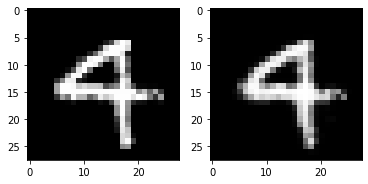

Epoch 931 Loss: 73.28


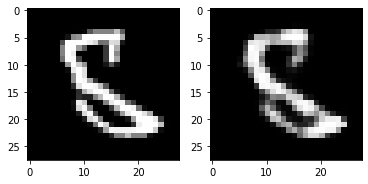

Epoch 932 Loss: 73.34


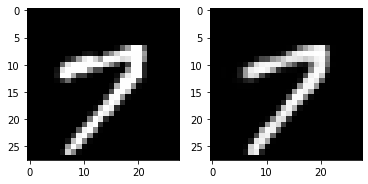

Epoch 933 Loss: 73.35


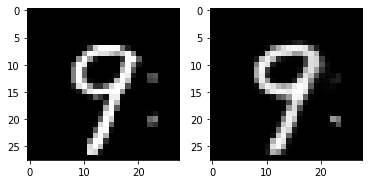

Epoch 934 Loss: 73.28


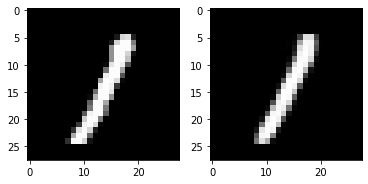

Epoch 935 Loss: 73.33


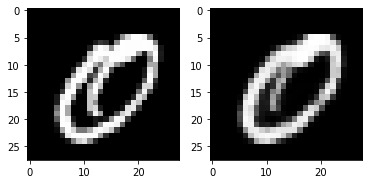

Epoch 936 Loss: 73.33


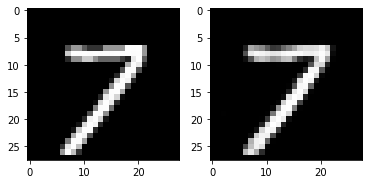

Epoch 937 Loss: 73.30


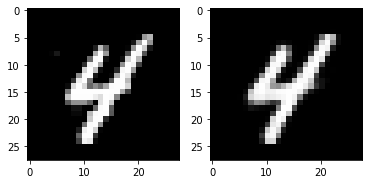

Epoch 938 Loss: 73.32


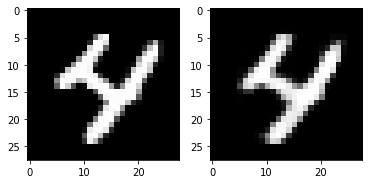

Epoch 939 Loss: 73.32


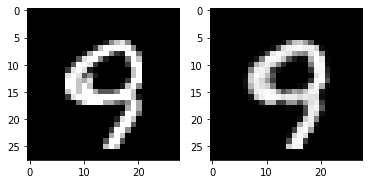

Epoch 940 Loss: 73.34


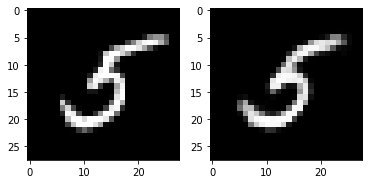

Epoch 941 Loss: 73.25


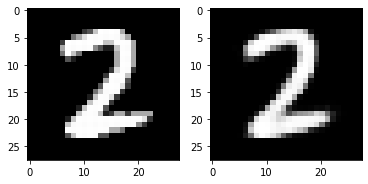

Epoch 942 Loss: 73.32


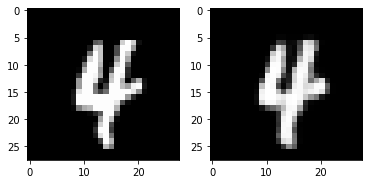

Epoch 943 Loss: 73.32


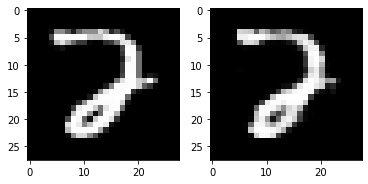

Epoch 944 Loss: 73.28


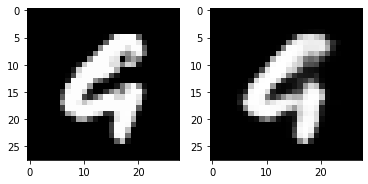

Epoch 945 Loss: 73.35


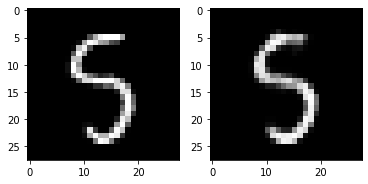

Epoch 946 Loss: 73.34


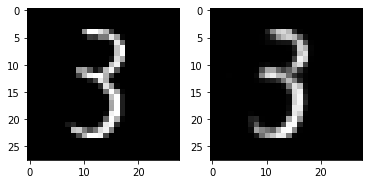

Epoch 947 Loss: 73.24


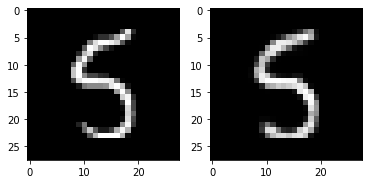

Epoch 948 Loss: 73.33


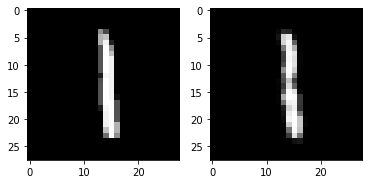

Epoch 949 Loss: 73.25


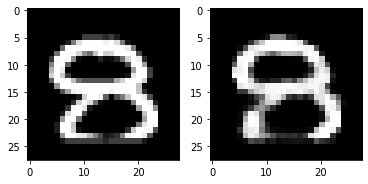

Epoch 950 Loss: 73.32


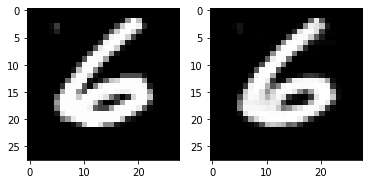

Epoch 951 Loss: 73.30


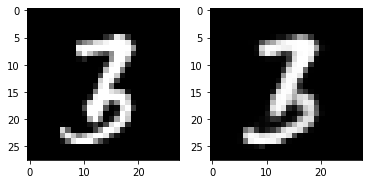

Epoch 952 Loss: 73.42


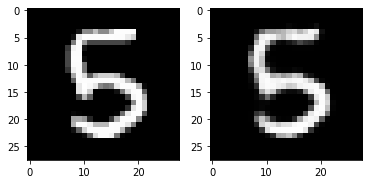

Epoch 953 Loss: 73.29


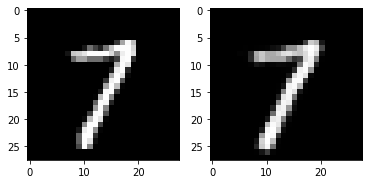

Epoch 954 Loss: 73.34


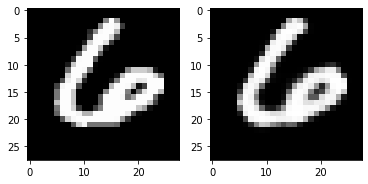

Epoch 955 Loss: 73.29


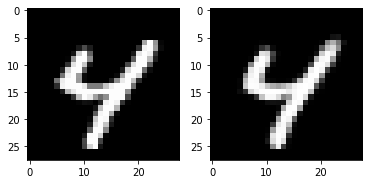

Epoch 956 Loss: 73.23


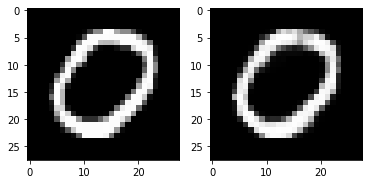

Epoch 957 Loss: 73.29


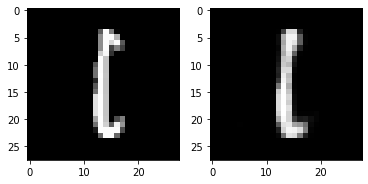

Epoch 958 Loss: 73.32


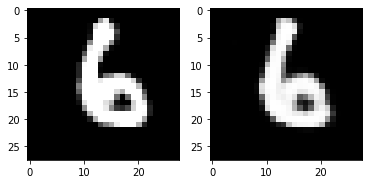

Epoch 959 Loss: 73.33


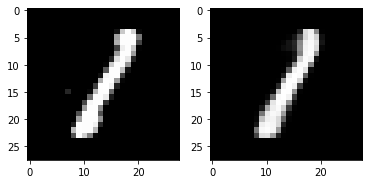

Epoch 960 Loss: 73.38


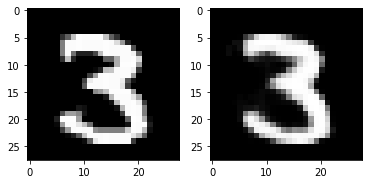

Epoch 961 Loss: 73.27


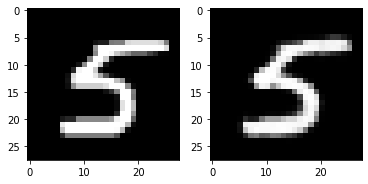

Epoch 962 Loss: 73.34


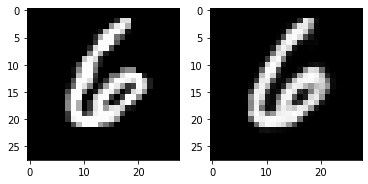

Epoch 963 Loss: 73.27


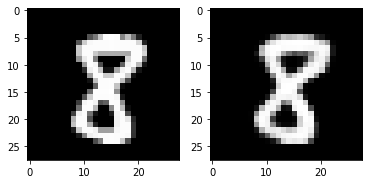

Epoch 964 Loss: 73.26


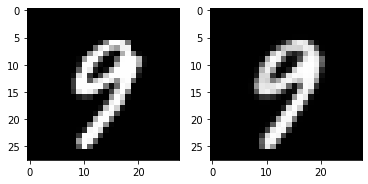

Epoch 965 Loss: 73.29


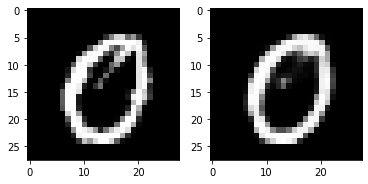

Epoch 966 Loss: 73.22


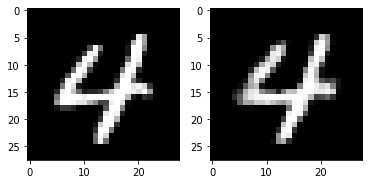

Epoch 967 Loss: 73.20


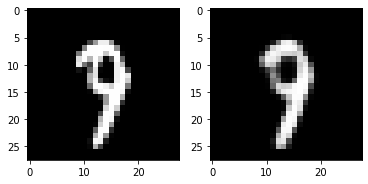

Epoch 968 Loss: 73.26


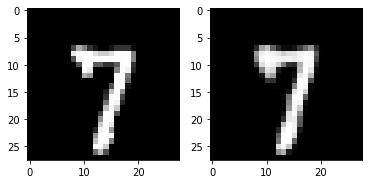

Epoch 969 Loss: 73.20


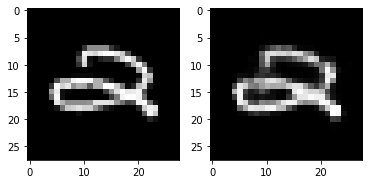

Epoch 970 Loss: 73.31


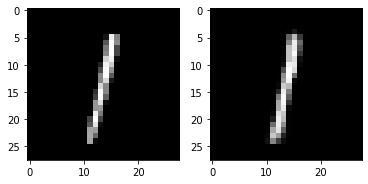

Epoch 971 Loss: 73.28


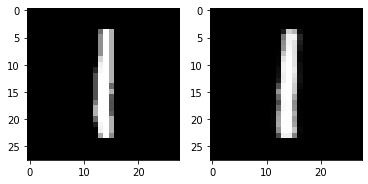

Epoch 972 Loss: 73.30


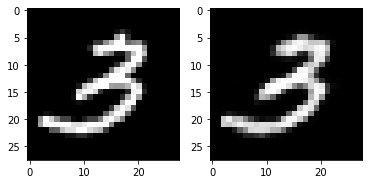

Epoch 973 Loss: 73.23


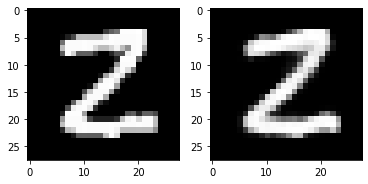

Epoch 974 Loss: 73.34


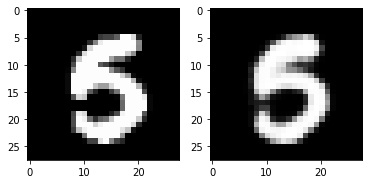

Epoch 975 Loss: 73.31


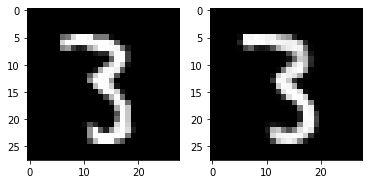

Epoch 976 Loss: 73.29


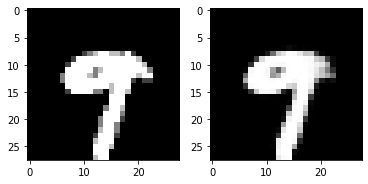

Epoch 977 Loss: 73.30


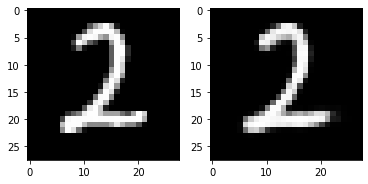

Epoch 978 Loss: 73.31


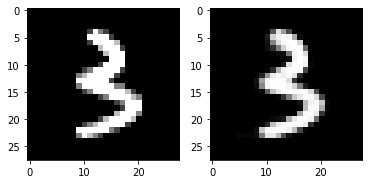

Epoch 979 Loss: 73.28


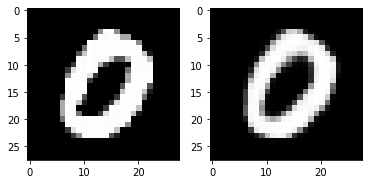

Epoch 980 Loss: 73.32


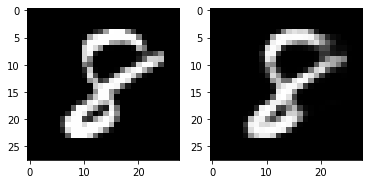

Epoch 981 Loss: 73.26


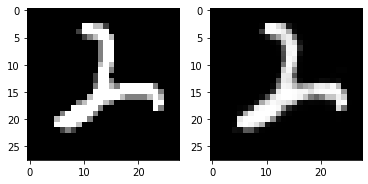

Epoch 982 Loss: 73.26


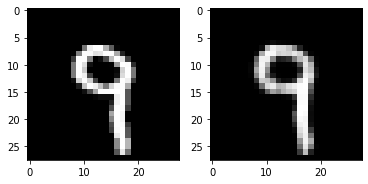

Epoch 983 Loss: 73.27


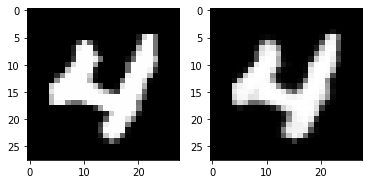

Epoch 984 Loss: 73.25


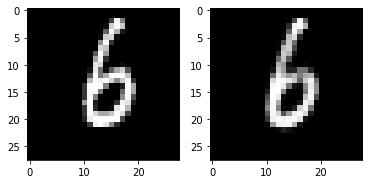

Epoch 985 Loss: 73.37


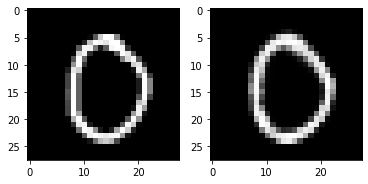

Epoch 986 Loss: 73.24


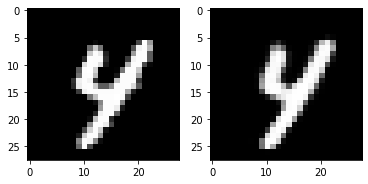

Epoch 987 Loss: 73.24


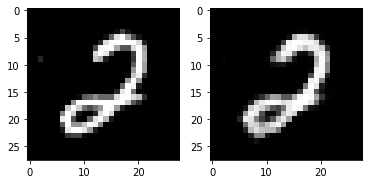

Epoch 988 Loss: 73.25


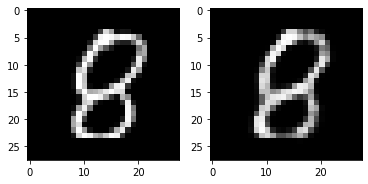

Epoch 989 Loss: 73.28


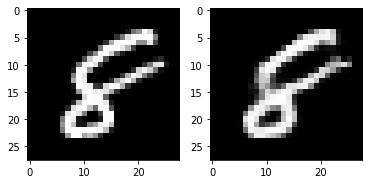

Epoch 990 Loss: 73.27


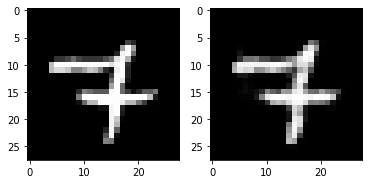

Epoch 991 Loss: 73.28


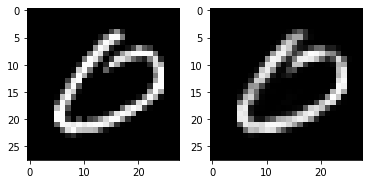

Epoch 992 Loss: 73.27


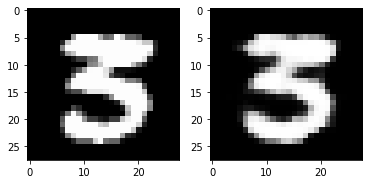

Epoch 993 Loss: 73.25


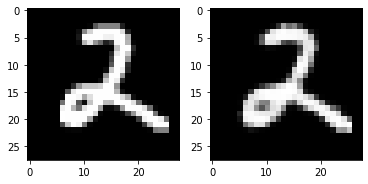

Epoch 994 Loss: 73.26


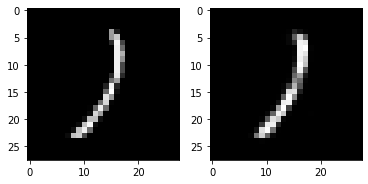

Epoch 995 Loss: 73.25


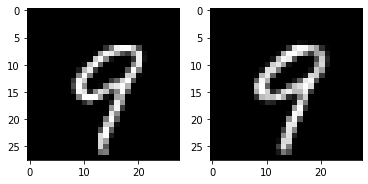

Epoch 996 Loss: 73.28


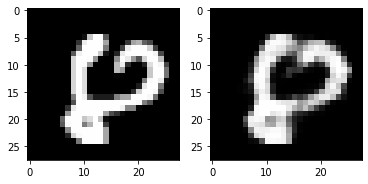

Epoch 997 Loss: 73.22


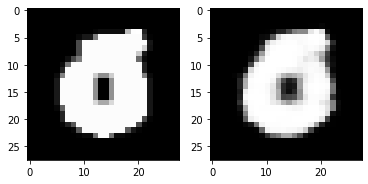

Epoch 998 Loss: 73.17


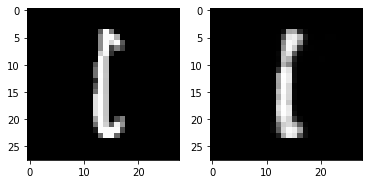

Epoch 999 Loss: 73.19


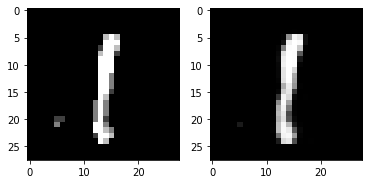

Epoch 1000 Loss: 73.28


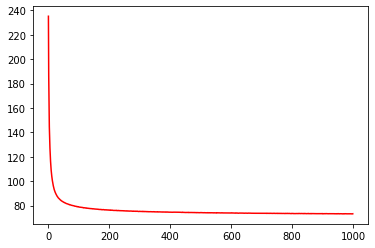

In [10]:
# We train for 1000 epochs
epochs = 1000
loss_values = []
for epoch in range(epochs):
    running_loss = 0.0
    flag = True
    for idx, (images, _) in enumerate(dataloader):
        images = convert2DTensorto1DTensor(images)
        images_bar, mu, logvar = model(images)
        loss = loss_fn(images_bar, images, mu, logvar)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()/ (len(dataloader) * training_batch_size)
        if flag == True:
          plt.subplot(1, 2, 1)
          plt.imshow(torch.reshape(images.cpu()[0], (28,28)), cmap='gray')
          plt.subplot(1, 2, 2)
          plt.imshow(torch.reshape(images_bar.cpu().detach()[0], (28,28)), cmap='gray')
          plt.show()
          flag = False   
        #running_loss = running_loss/128
    loss_values.append(running_loss)
    print("Epoch {} Loss: {:.2f}".format(epoch+1, running_loss))
plt.plot(np.array(loss_values), 'r')

# Testing

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


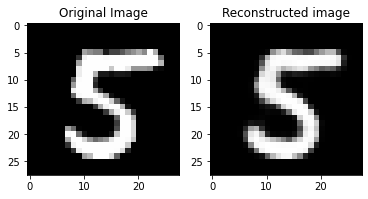

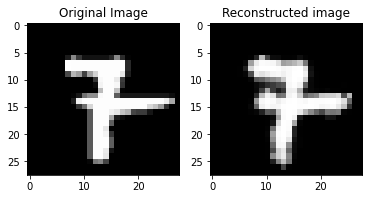

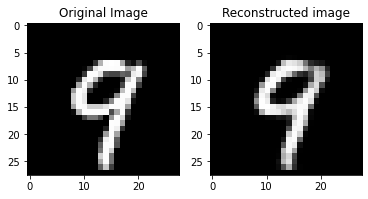

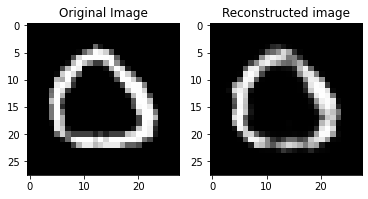

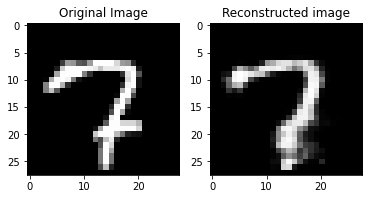

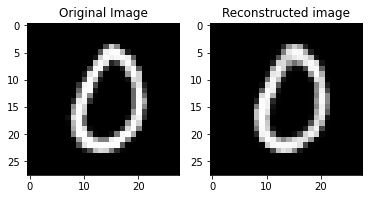

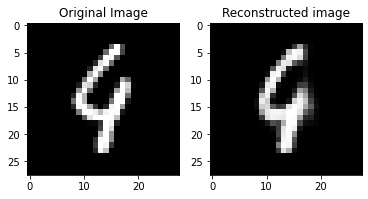

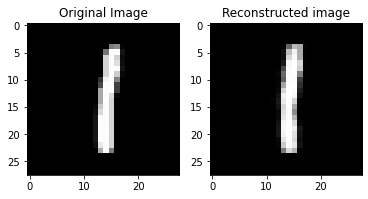

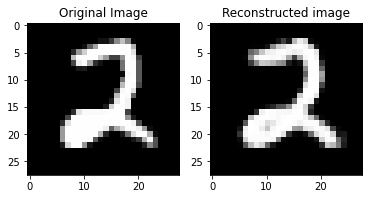

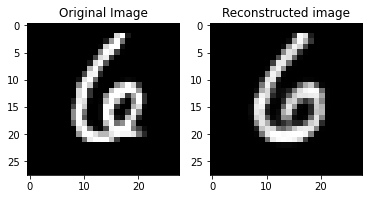

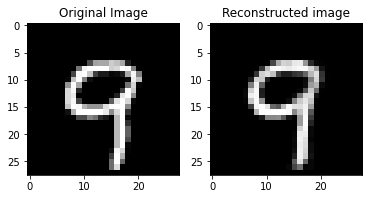

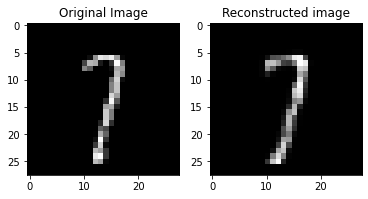

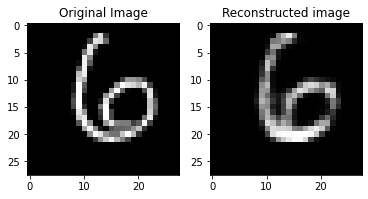

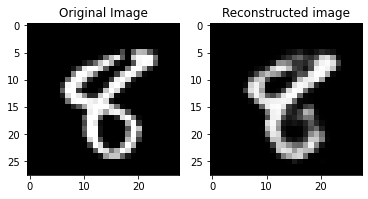

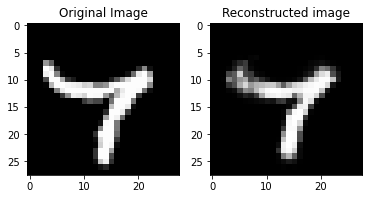

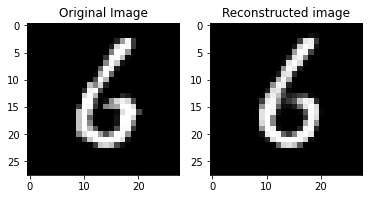

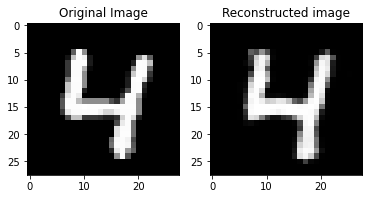

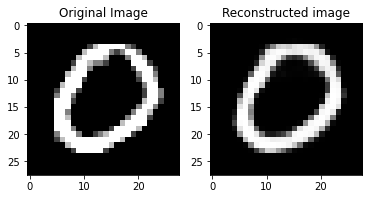

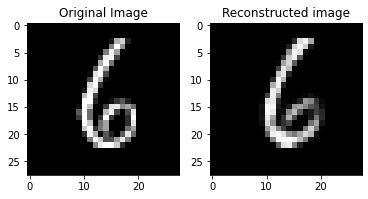

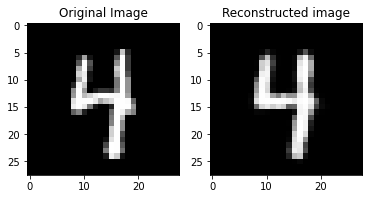

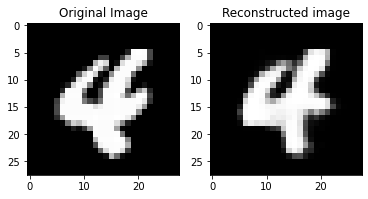

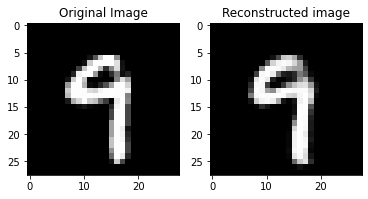

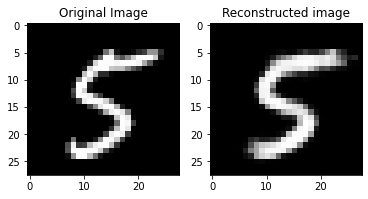

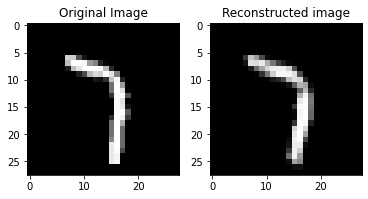

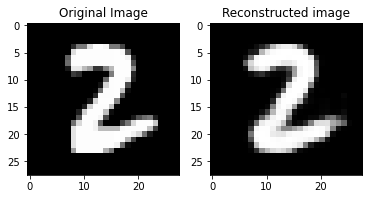

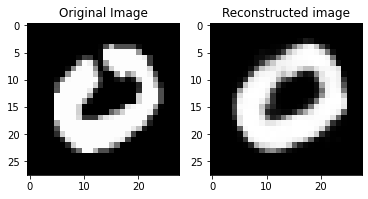

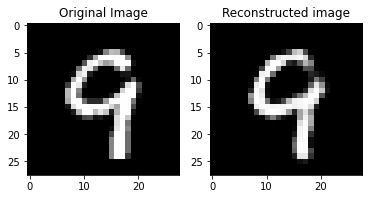

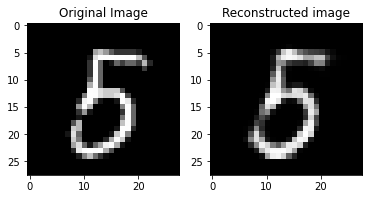

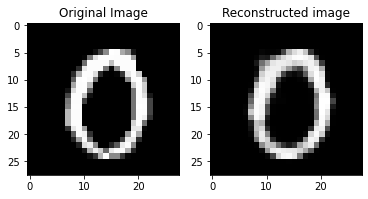

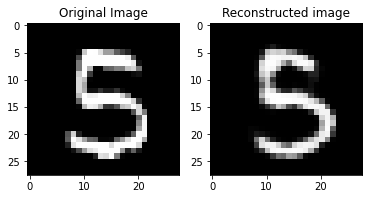

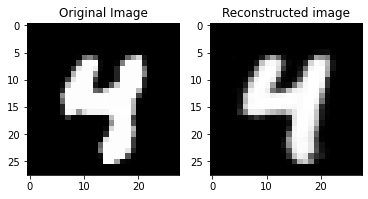

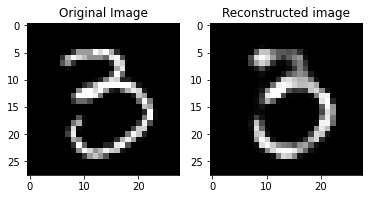

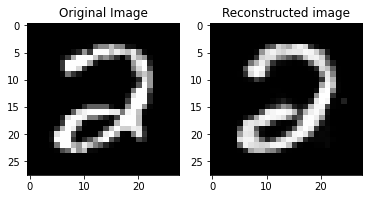

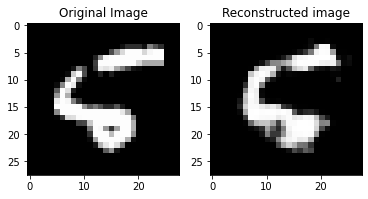

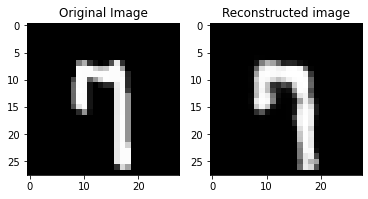

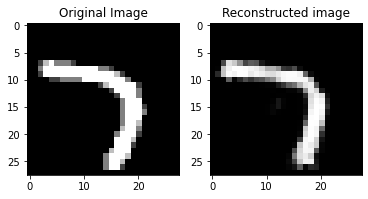

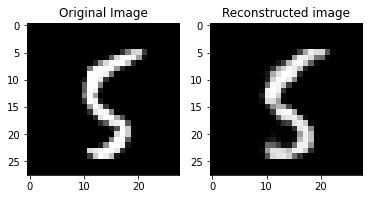

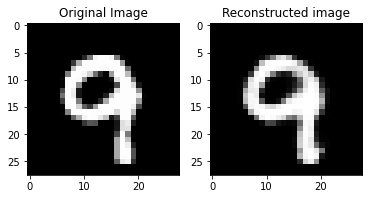

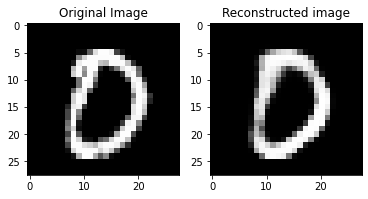

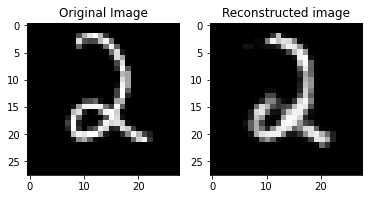

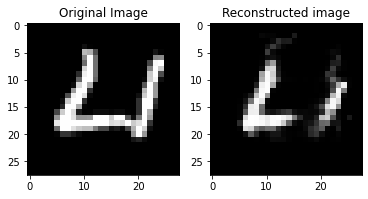

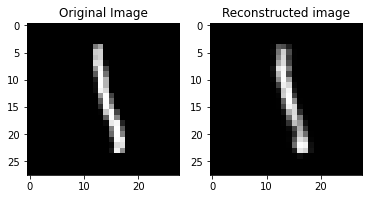

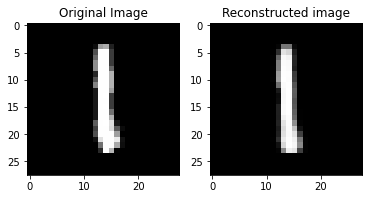

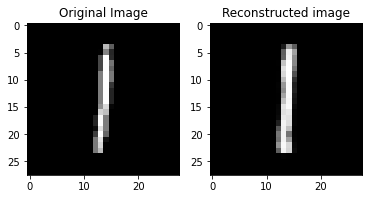

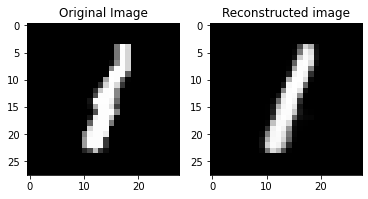

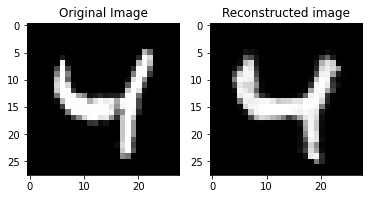

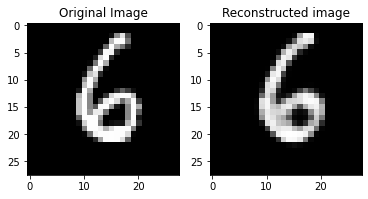

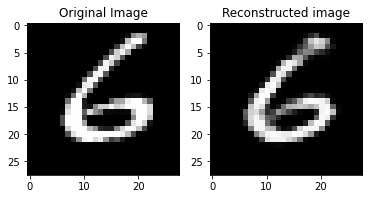

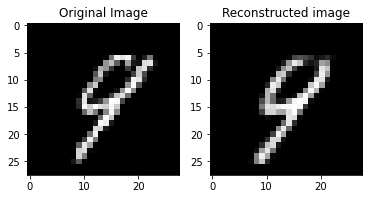

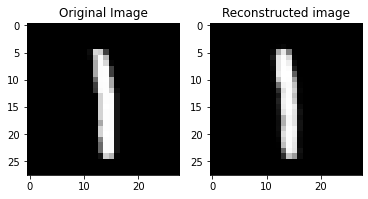

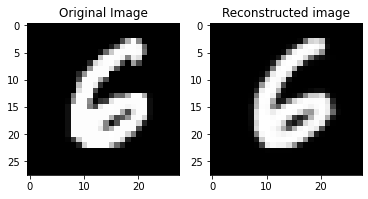

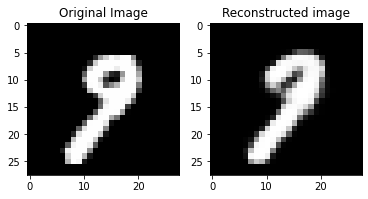

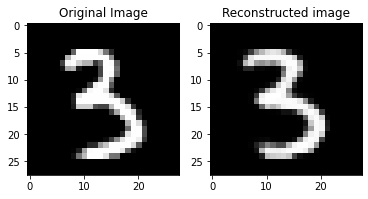

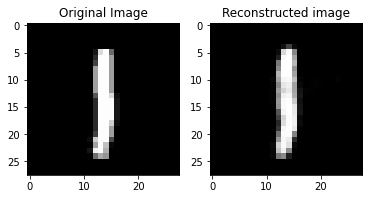

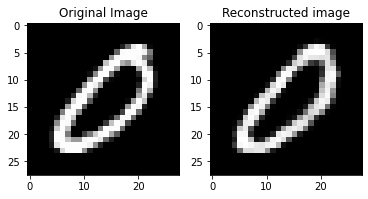

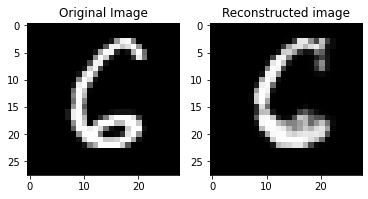

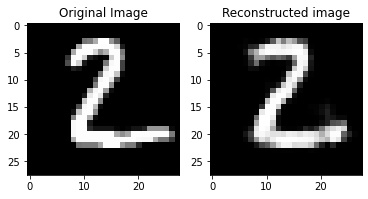

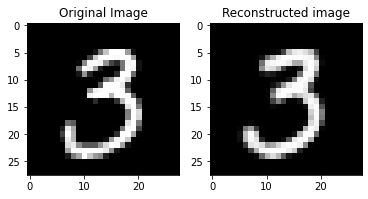

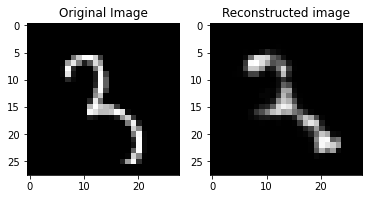

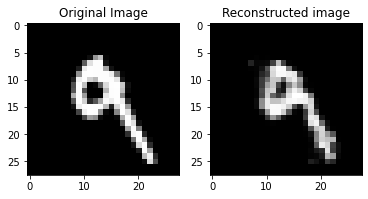

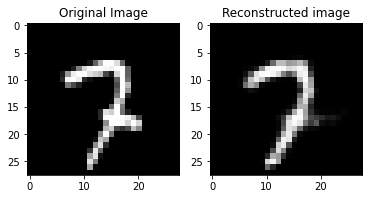

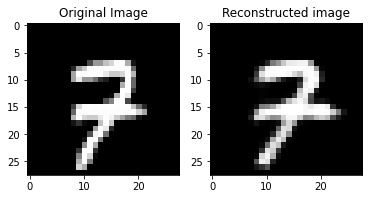

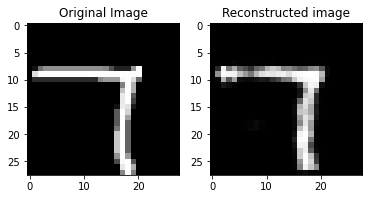

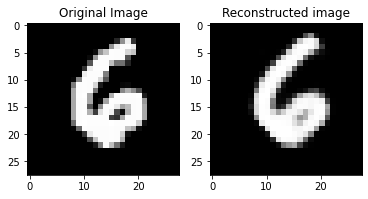

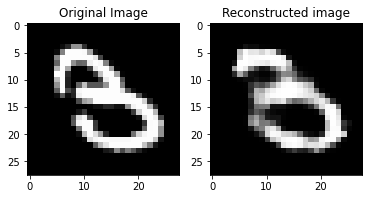

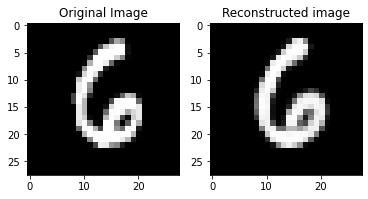

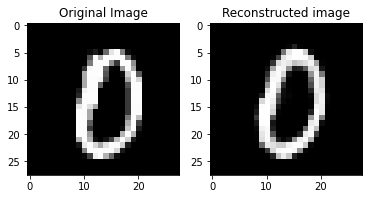

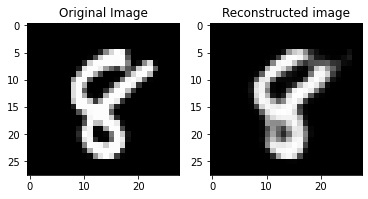

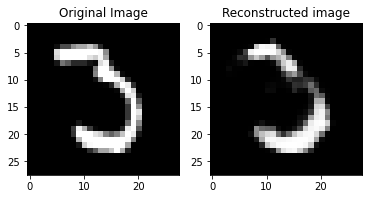

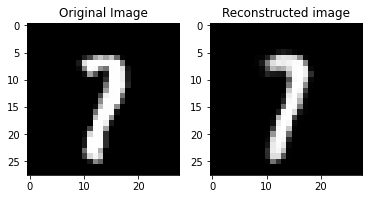

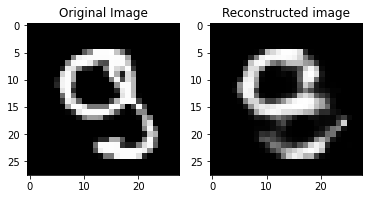

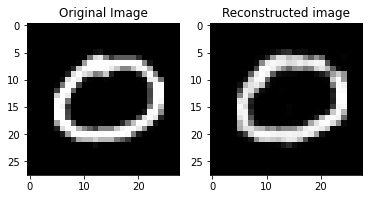

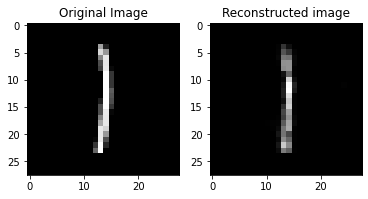

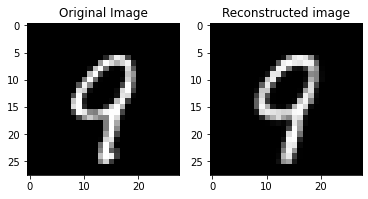

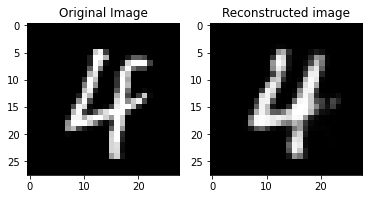

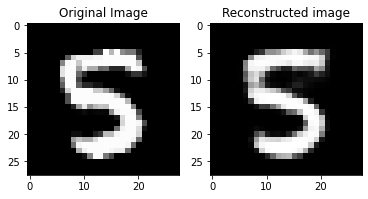

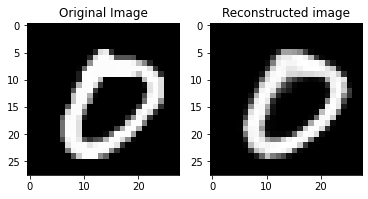

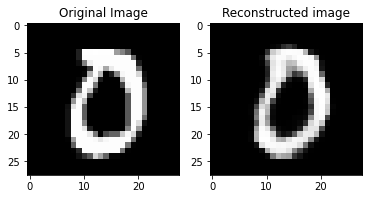

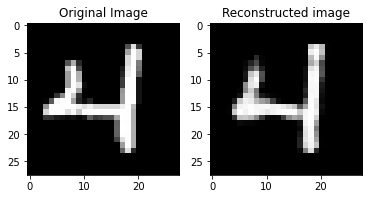

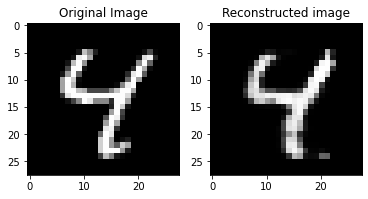

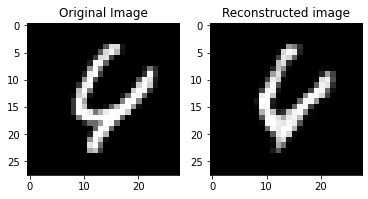

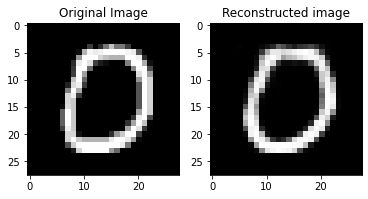

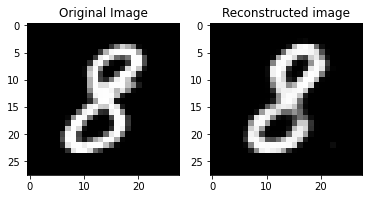

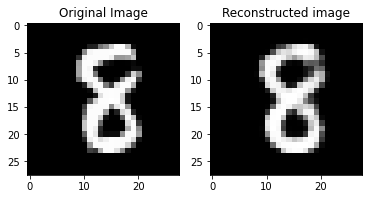

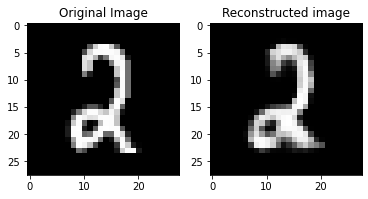

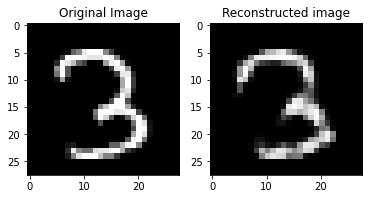

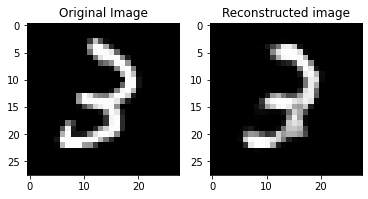

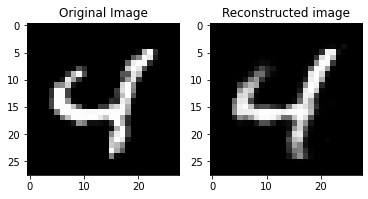

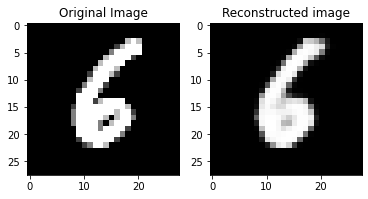

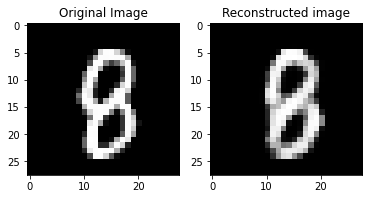

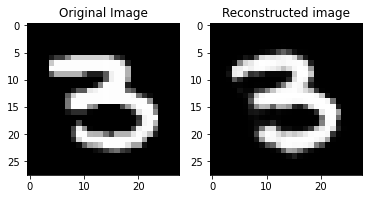

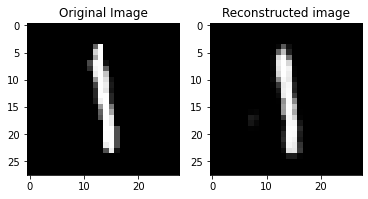

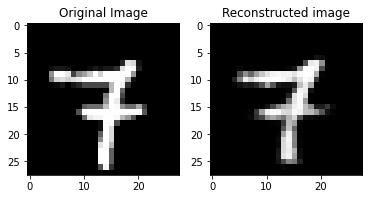

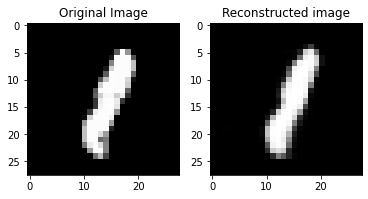

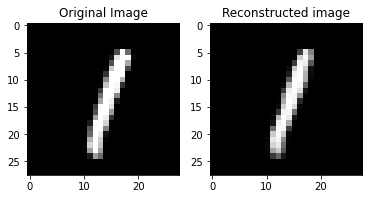

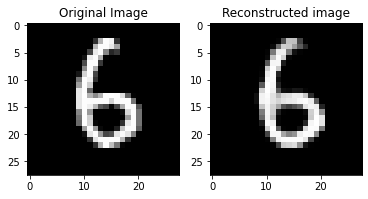

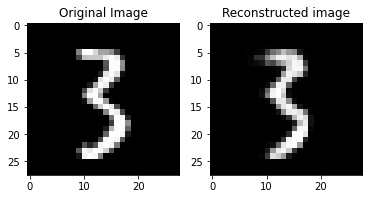

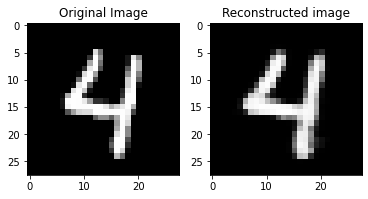

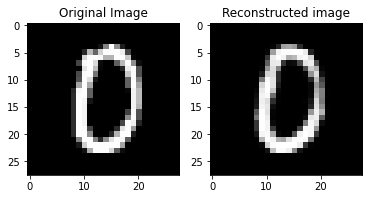

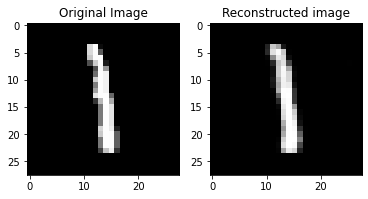

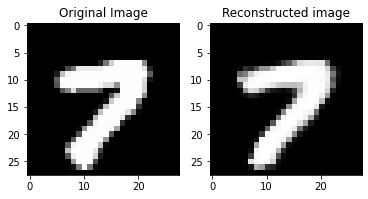

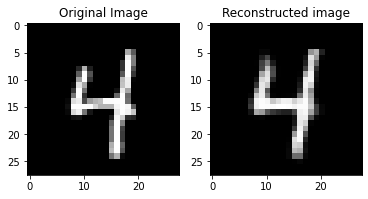

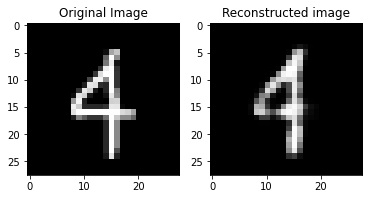

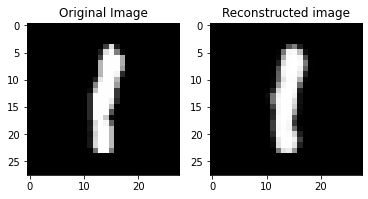

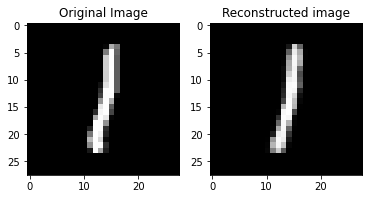

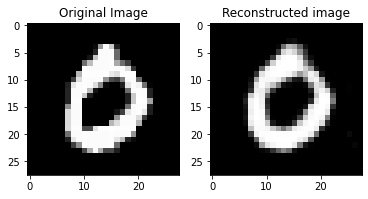

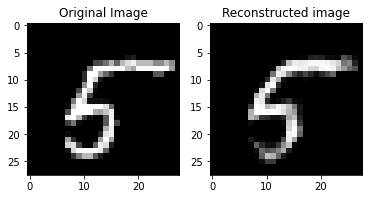

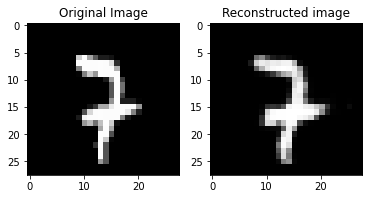

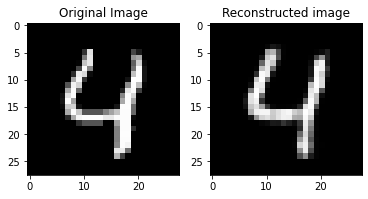

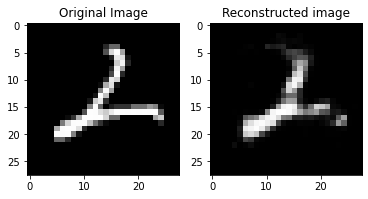

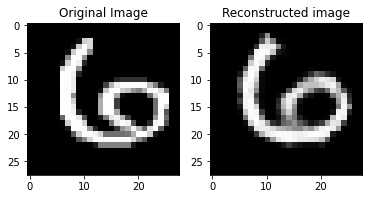

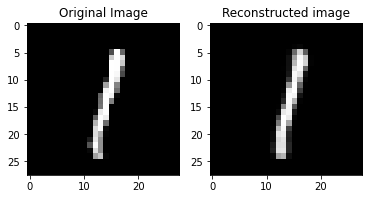

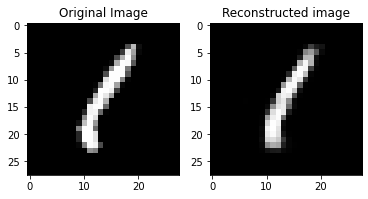

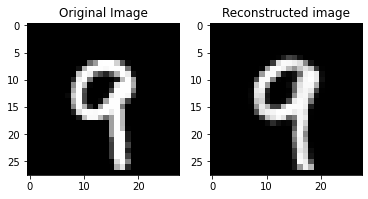

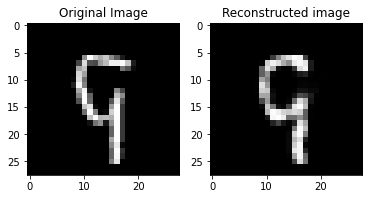

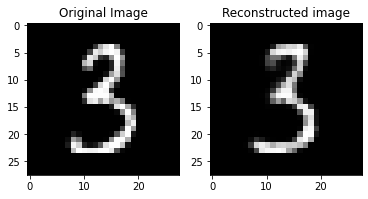

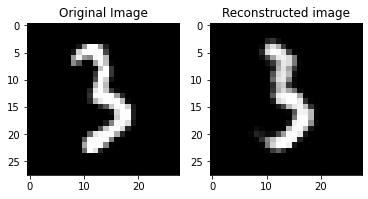

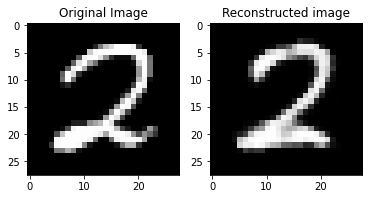

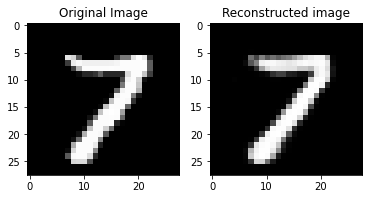

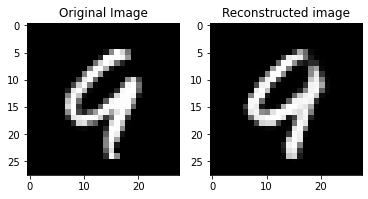

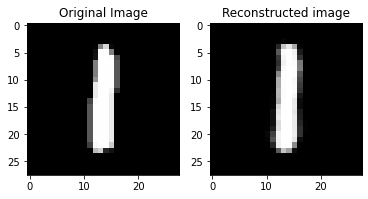

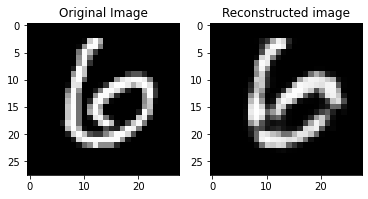

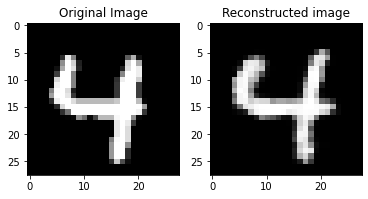

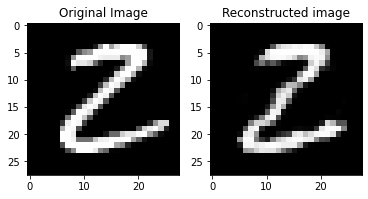

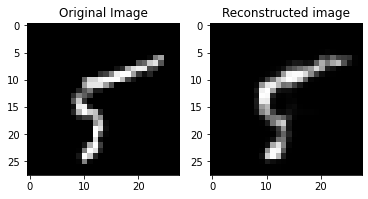

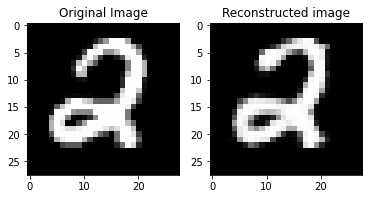

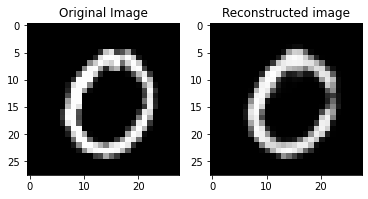

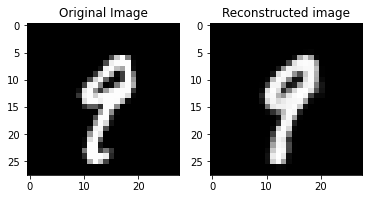

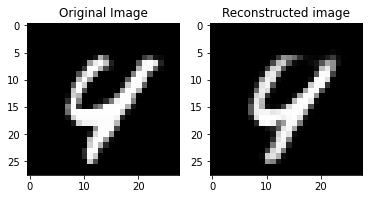

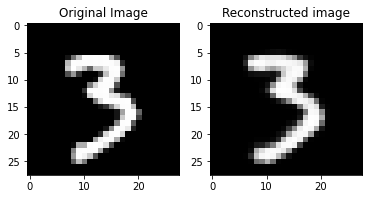

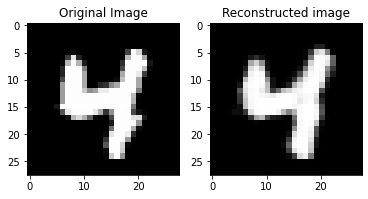

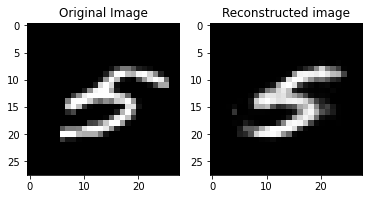

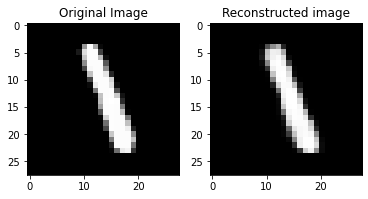

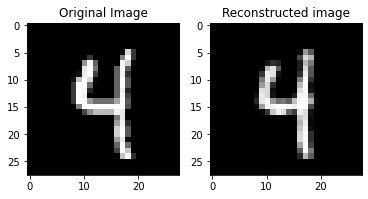

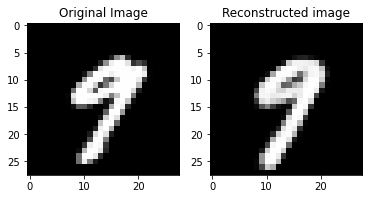

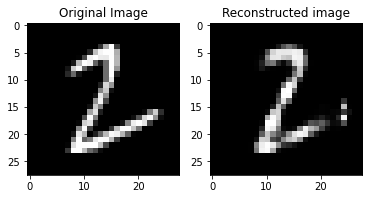

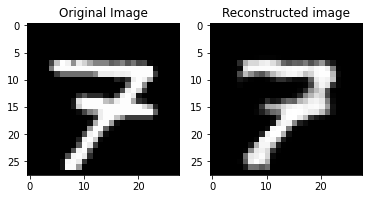

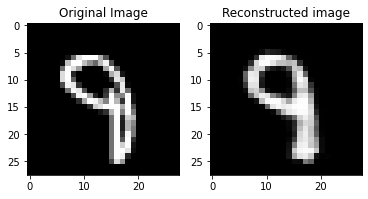

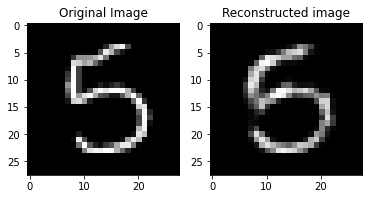

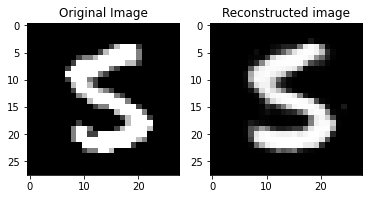

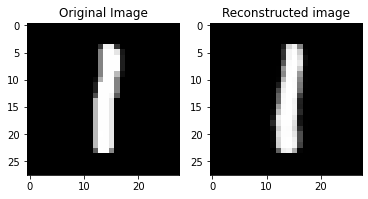

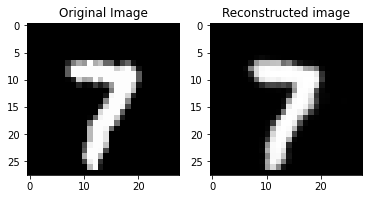

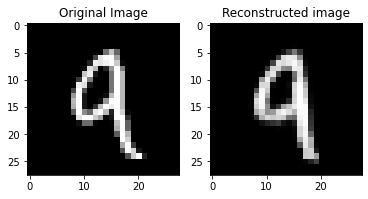

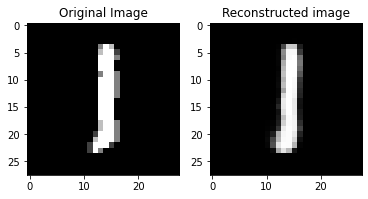

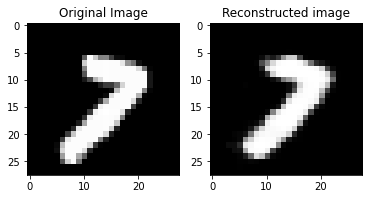

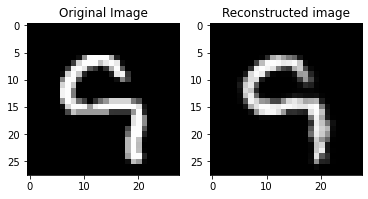

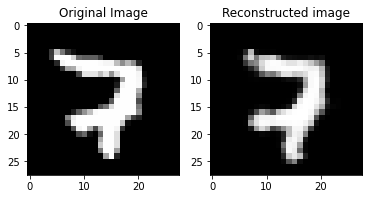

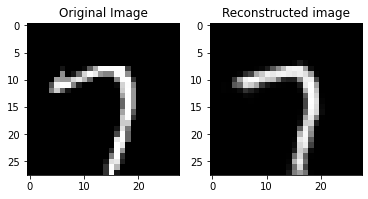

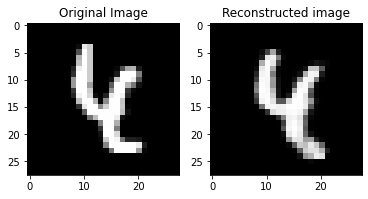

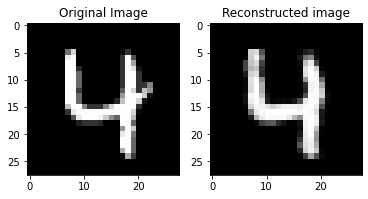

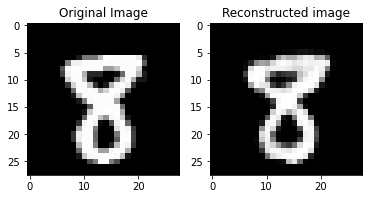

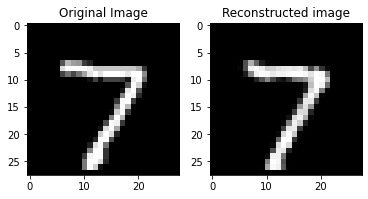

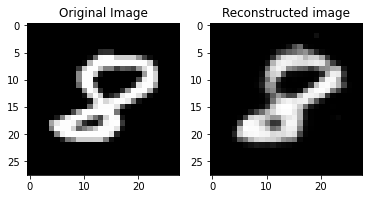

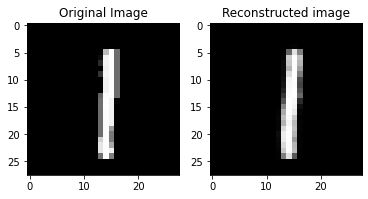

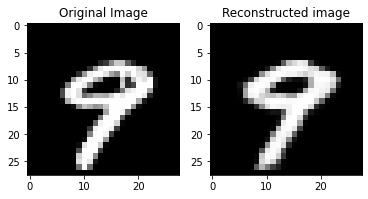

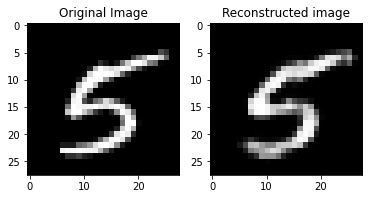

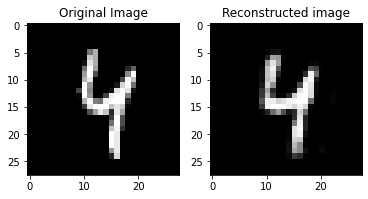

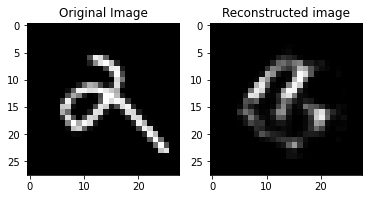

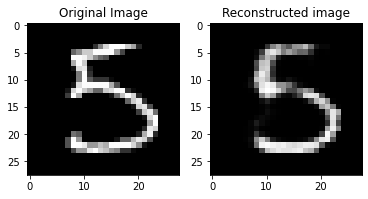

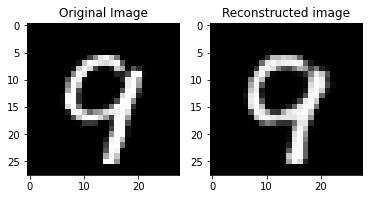

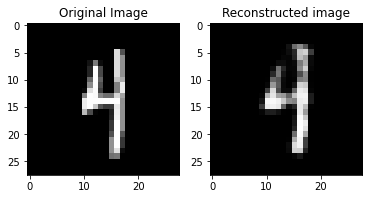

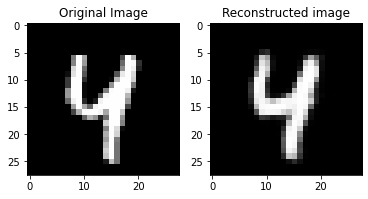

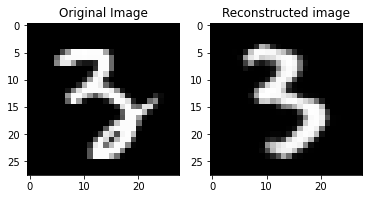

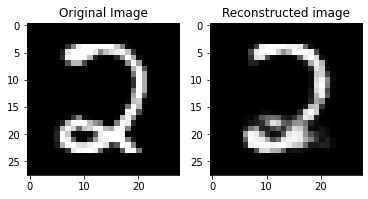

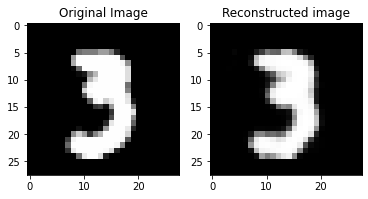

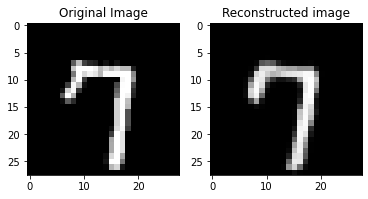

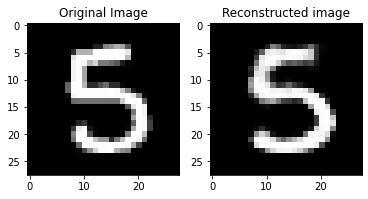

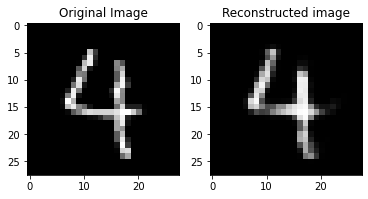

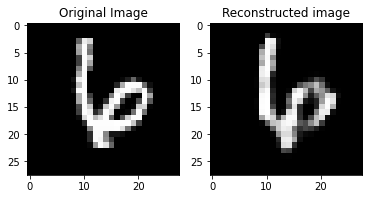

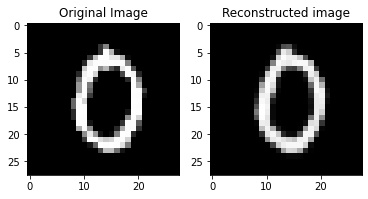

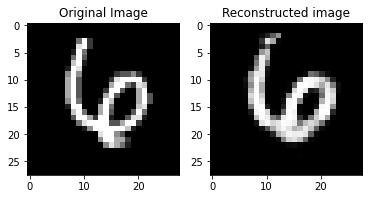

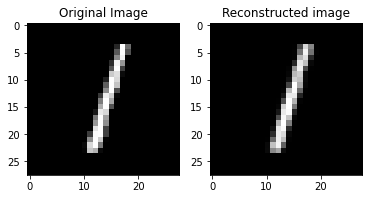

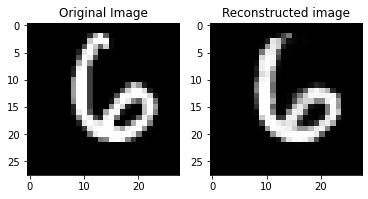

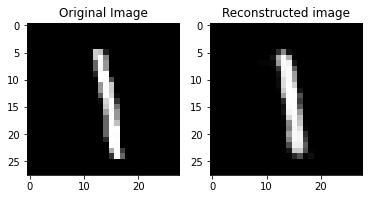

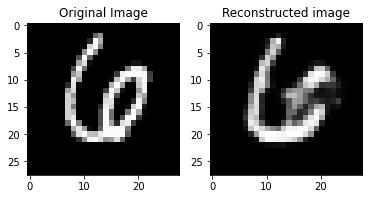

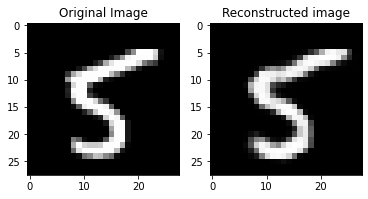

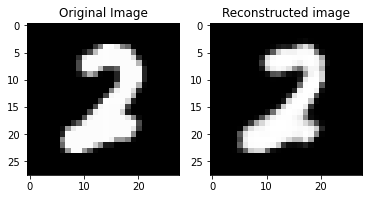

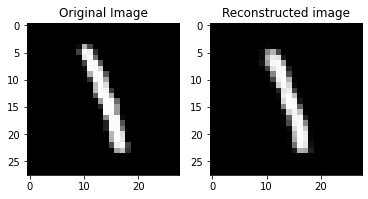

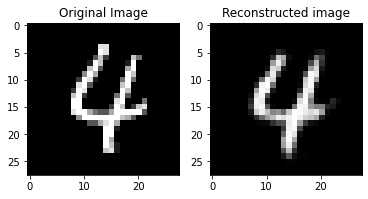

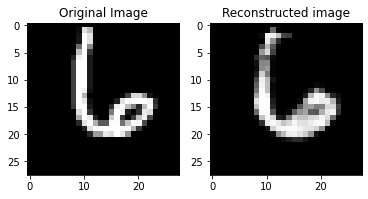

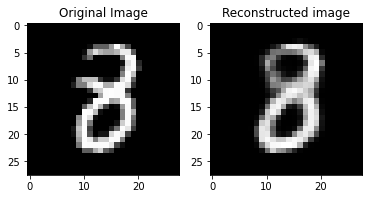

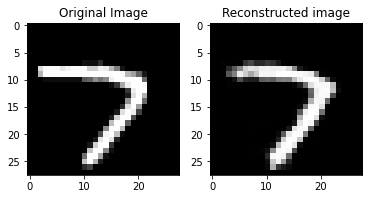

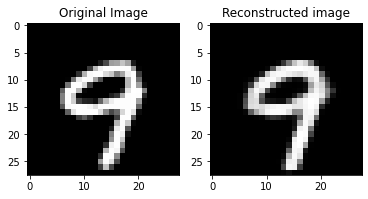

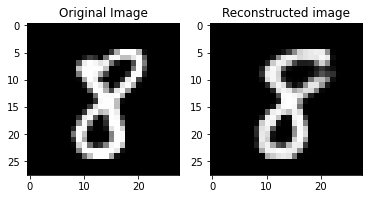

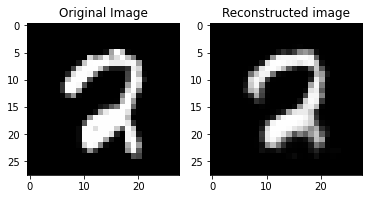

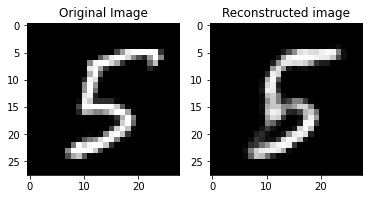

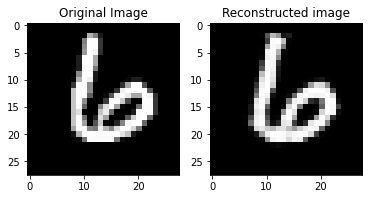

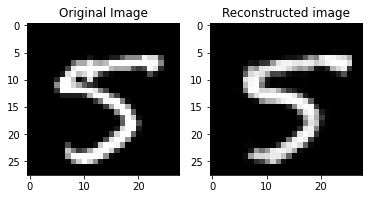

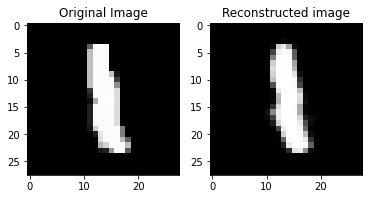

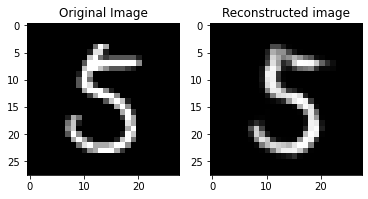

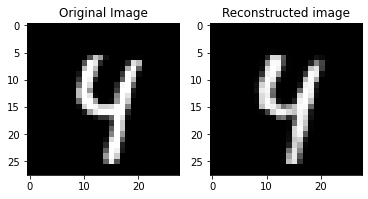

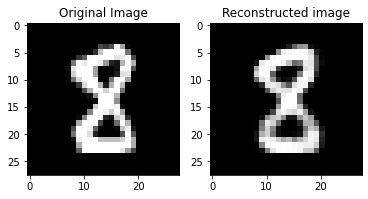

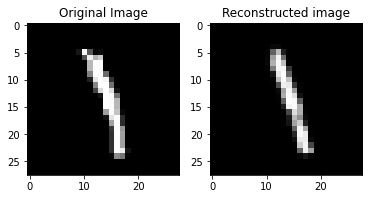

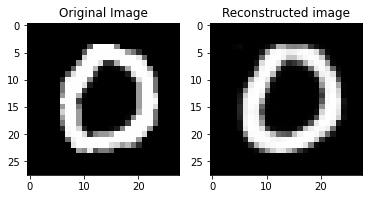

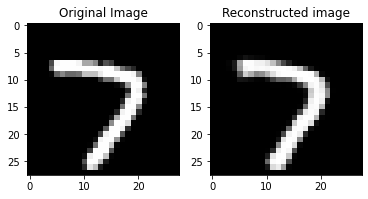

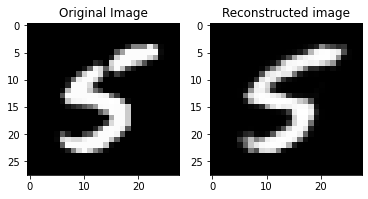

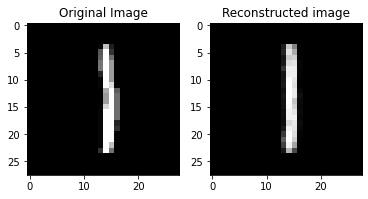

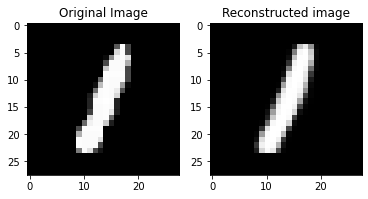

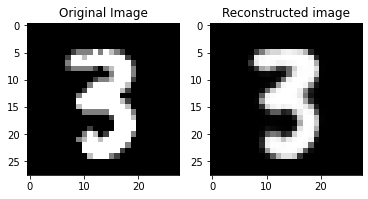

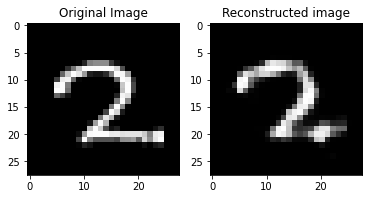

91.15755920410156


In [11]:
# Run the model for test images and calculate loss
total_test_loss = 0.0
for idx, (images, _) in enumerate(test_dataloader):
  images = convert2DTensorto1DTensor(images)
  recon_images, mu, logvar = model(images)
  loss = loss_fn(recon_images, images, mu, logvar)
  total_test_loss += loss.item()
  for i in range(0, len(images)):
    plt.subplot(1, 2, 1)
    plt.imshow(np.reshape(images[i].cpu().detach().numpy(), (28, 28)), cmap='gray')
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(np.reshape(recon_images[i].cpu().detach().numpy(), (28, 28)), cmap='gray')
    plt.title("Reconstructed image")
    plt.show()
avg_test_loss = total_test_loss/ len(test_dataloader)
print(avg_test_loss)